# **Analysis of the Survvey and Kaggle Data**


# HWR-Analysis
#README
Project Name: Effectiveness of Clickbait Headlines in Meta Platforms Advertising within the Skill Game Industry

Description: This project aims to analyse the data of the collected results of the survey for the master thesis of the marketing management program of HWR by Michael Zats and the dataset taken from Kaggle and accessed [Here](https://www.kaggle.com/datasets/thelazyaz/youtube-clickbait-classification/data?select=clickbait.csv).

Prerequriments
Python 3
Google Colab (for running the provided notebook)
Installation steps:

Clone the repository from Google Colab. ([https://colab.research.google.com/drive/1j-RytXdZDXCAWKHlaQdFWmRo64SJt_3Y?usp=sharing](https://colab.research.google.com/drive/1gMatwGtGykAlwQLDOYgm_QhaLy-WYP4e?usp=sharing)) In Colab click File --> Save a copy in Colab.

<img width="266" alt="Screenshot 2023-11-18 at 13 52 49" src="https://github.com/Michaelzats/HWR-Analysis/assets/92814061/fdd813d8-249c-441c-9ceb-874db7e565bd">

Install necessary Python libraries using !pip install (listed bellow)

Usage: Basic examples:

Load the datasets provided “Survey DATA Thesis - Clickbaits questions groups (8), Survey DATA Thesis - Clickbaits questions groups (7),Clickbait Data Thesis - Cleaned Data”. You can do it by clicking on the file folder icon from the right in Colab and then draging “DATASET” File into the opened part. Example how to drag “DATA.ZIP” into the file folder

<img width="176" alt="Screenshot 2023-11-18 at 13 57 53" src="https://github.com/Michaelzats/HWR-Analysis/assets/92814061/75100908-45bb-46b1-9659-fd4ddd2a54cc">



For any queries or feedback, please reach out to yfim13@gmail.com .


**Rules to execute:**

1. Having installed all bellow listed libraries.
2. Running inside of the copied colab of that colab.
3. Using as the dataset provided in the zip file
4. Running each cell after the cell, without jumping back and forth.

Libraries to install

In [ ]:
#Pandas:
!pip install pandas

#SciPy (also covers stats and other statistical functions):
!pip install scipy


#Matplotlib (for plotting, also covers matplotlib.pyplot):
!pip install matplotlib


#Seaborn (a visualization library based on matplotlib):
!pip install seaborn


#Scikit-learn (covers PCA, StandardScaler, SimpleImputer, KMeans):
!pip install scikit-learn


#Numpy (for numerical operations):
!pip install numpy


#Tabulate (for pretty-printing tabular data):
!pip install tabulate


#Matplotlib Ticker (part of Matplotlib, no separate installation needed).



**Libraries**

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from tabulate import tabulate
import matplotlib.ticker as ticker
from scipy.stats import chisquare
from scipy.stats import ttest_1samp



# **DATA WITH NO CHANGES**


          duration         v_3         v_4         v_5         v_7  \
count   387.000000  387.000000  387.000000  387.000000  387.000000   
mean    232.080103    3.826873    2.002584    2.049096    2.222222   
std     146.632781    1.774459    0.428872    0.854836    0.802988   
min      -1.000000    1.000000    1.000000    1.000000    1.000000   
25%     162.000000    1.000000    2.000000    1.000000    2.000000   
50%     205.000000    5.000000    2.000000    2.000000    2.000000   
75%     265.000000    5.000000    2.000000    3.000000    3.000000   
max    1451.000000    5.000000    3.000000    3.000000    3.000000   

              v_8         v_9  Headlines SUM Score        v_12        v_13  \
count  387.000000  387.000000           387.000000  387.000000  387.000000   
mean     2.103359    2.046512             8.421189    2.299742    2.540052   
std      0.820504    0.763756             2.638076    1.359318    1.251040   
min      1.000000    1.000000             4.000000    1.0

ValueError: ignored

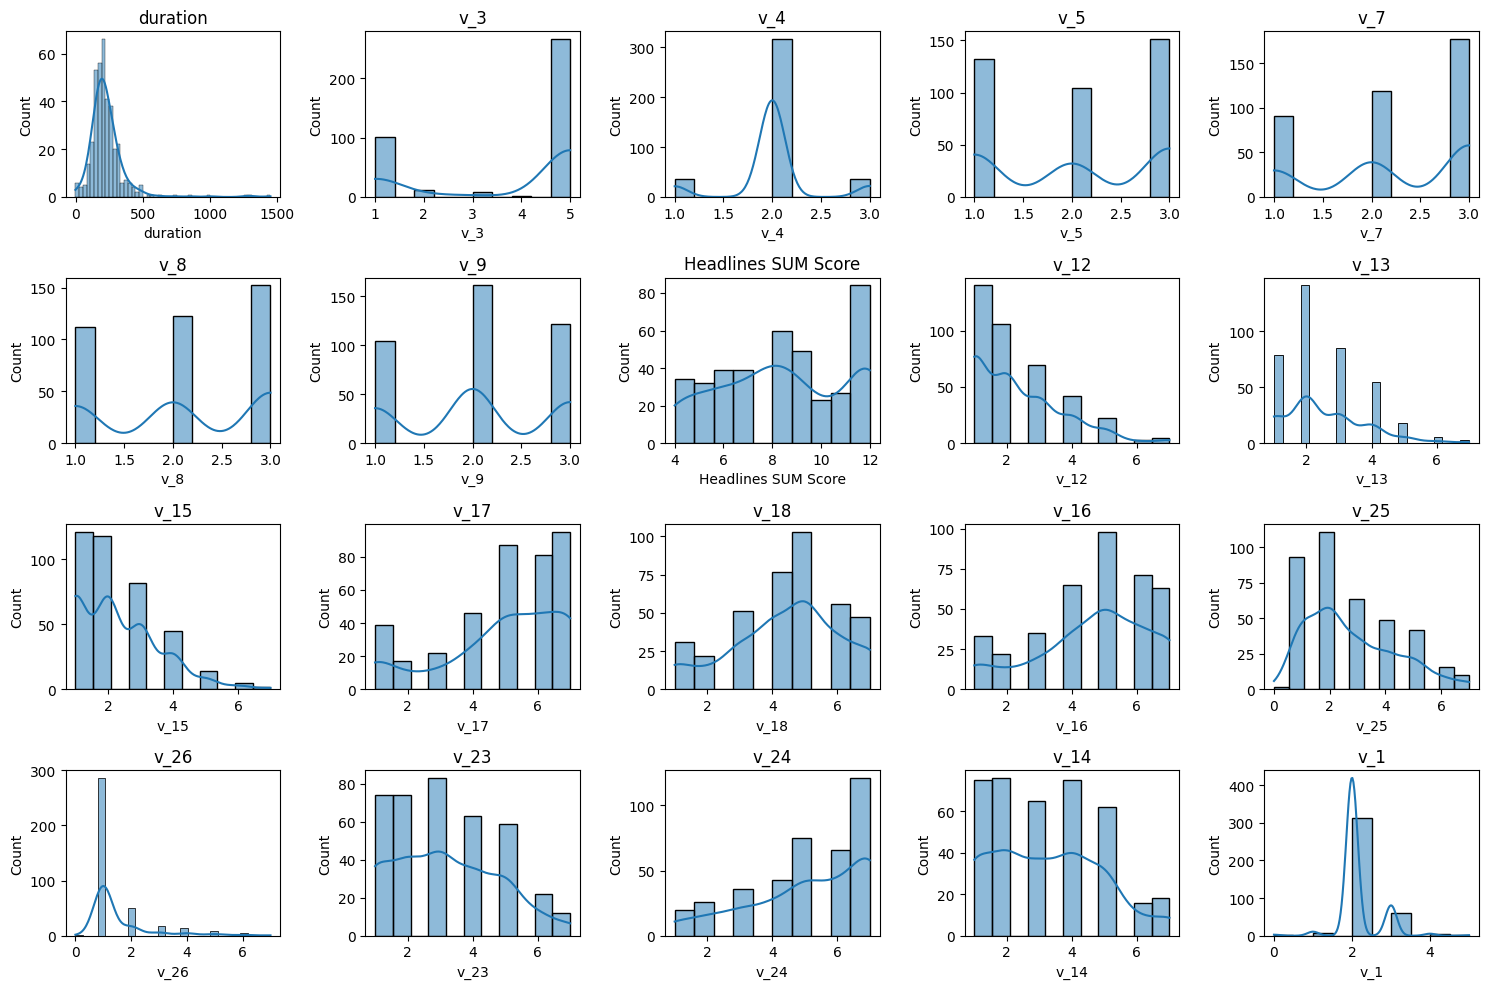

In [ ]:
data = pd.read_csv('Survey DATA Thesis - Clickbaits questions groups (8).csv')


print(data.describe())  # get descriptive statistics

# Visualizing the distribution of each numerical column
num_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()


In [ ]:
# Get descriptive statistics
desc_stats = data.describe()

# Determine the split point (halfway through the columns)
split_point = len(desc_stats.columns) // 2

# Split the descriptive statistics into two DataFrames
first_half_stats = desc_stats.iloc[:, :split_point]
second_half_stats = desc_stats.iloc[:, split_point:]

# Print the title for the table
print("Descriptive Statistics - Part 1")
# Print the first part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(first_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))

# Add spacing between tables for readability
print("\n" + "-"*50 + "\n")

# Print the title for the second part of the table
print("Descriptive Statistics - Part 2")
# Print the second part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(second_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))


Descriptive Statistics - Part 1
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
|       |   duration |     v_3 |     v_4 |     v_5 |     v_7 |     v_8 |     v_9 |   Headlines SUM Score |    v_12 |    v_13 |
+=======+============+=========+=========+=========+=========+=========+=========+=======================+=========+=========+
| count |    387.000 | 387.000 | 387.000 | 387.000 | 387.000 | 387.000 | 387.000 |               387.000 | 387.000 | 387.000 |
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
| mean  |    232.080 |   3.827 |   2.003 |   2.049 |   2.222 |   2.103 |   2.047 |                 8.421 |   2.300 |   2.540 |
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
| std   |    146.633 |   1.774 |   0.429 |   0.855 |   0.803 |   0.821 |   0.76

# **H1 Investigating**
H1: Clickbait headlines in skill game advertisements on Facebook lead to higher click-through rates compared to non-clickbait headlines.


**Occurrences of 1, 2, and 3 in each of the specified columns (v_3, v_7, v_8, v_9)**

In [ ]:
# Assuming 'data' is your DataFrame and it's already loaded

# Select the columns to count values in
selected_columns = ['v_5', 'v_7', 'v_8', 'v_9']

# Count the occurrences of 1, 2, and 3 in these columns
value_counts = data[selected_columns].apply(pd.Series.value_counts)

# Get the counts for 1, 2, and 3 in each column
counts = value_counts.loc[[1, 2, 3]]

print(counts)


# Select the specified columns
selected_columns = data[['v_5', 'v_7', 'v_8', 'v_9']]

# Flatten the selected DataFrame into a single series
flattened_data = selected_columns.values.flatten()

# Convert to a Series to use value_counts
flattened_series = pd.Series(flattened_data)

# Count the occurrences of 1, 2, and 3
counts = flattened_series.value_counts().loc[[1, 2, 3]]

print(counts)


In [ ]:
data['Headlines AVG Score'].describe()


count    387.000000
mean       8.421189
std        2.638076
min        4.000000
25%        6.000000
50%        8.000000
75%       11.000000
max       12.000000
Name: Headlines AVG Score, dtype: float64

In [ ]:
data['Headlines AVG Score'].mode()[0]

12

In [ ]:
data['Headlines AVG Score'].median()

8.0

**Chi-square statistic**
1 - clicbait
2 - Not-clickbait
3 - Neither clickbait or Not-clickbait **

In [ ]:
# Observed counts
observed_counts = [439, 507, 602]

# Expected counts if all categories are equally likely
expected_counts = [sum(observed_counts) / 3] * 3

# Perform the chi-square goodness of fit test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")


Chi-square statistic: 25.98062015503876, P-value: 2.282338283660541e-06


In [ ]:
# Observed counts for Clickbait and Not-clickbait
observed_counts = [439, 507]

# Expected counts if both categories are equally likely
expected_counts = [sum(observed_counts) / 2] * 2

# Perform the chi-square goodness of fit test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")


Chi-square statistic: 4.887949260042284, P-value: 0.02704479206337255


**One-Sample t-Test Of V_14**
Klicken Sie eher auf eine Anzeige mit einer sensationellen als mit einer Standard-Schlagzeile?
H1

In [ ]:
data['v_14'].describe()


count    387.000000
mean       3.240310
std        1.694743
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: v_14, dtype: float64

In [ ]:
data['v_14'].mode()[0]

2

In [ ]:
responses = data['v_14']

# Perform a one-sample t-test against the hypothetical average value (4.5)
t_stat, p_value = ttest_1samp(responses, popmean=4.5)

print(f"t-statistic: {t_stat}, P-value: {p_value}")


t-statistic: -14.622287930744132, P-value: 7.671535126892935e-39


# **H2 Investigating**
H2: Skill game advertisements using clickbait headlines experience a higher rate of user drop-off after the initial click compared to those using straightforward headlines.


**One-Sample t-Test Of V_12**
Wenn Sie auf eine sensationell klingende Spielwerbung klicken, wie oft spielen Sie dann weiter oder beschäftigen sich mit dem Spiel?

In [ ]:
data['v_12'].describe()


count    387.000000
mean       2.299742
std        1.359318
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: v_12, dtype: float64

In [ ]:
data['v_12'].mode()[0]

1

In [ ]:
responses = data['v_12']

# Perform a one-sample t-test against the hypothetical average value (2)
t_stat, p_value = ttest_1samp(responses, popmean=2)

print(f"t-statistic: {t_stat}, P-value: {p_value}")


t-statistic: 4.337918275075577, P-value: 1.8386245899090108e-05



**One-Sample t-Test Of V_13**
Wie oft kommt es vor, dass der Inhalt eines Spiels hält, was die vielversprechende Überschrift verspricht?

In [ ]:
data['v_13'].describe()


count    387.000000
mean       2.540052
std        1.251040
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: v_13, dtype: float64

In [ ]:
data['v_13'].mode()[0]

2

In [ ]:
responses = data['v_13']

# Perform a one-sample t-test against the hypothetical average value (4.5)
t_stat, p_value = ttest_1samp(responses, popmean=4.5)

print(f"t-statistic: {t_stat}, P-value: {p_value}")


t-statistic: 0.6298033329992476, P-value: 0.5291958757915406


# **H3 Investigating**
H3: Users can differentiate advertisements on Facebook with clickbait headlines and without.



**One-Sample t-Test Of v_15**
Inwieweit glauben Sie, dass Spielewerbung mit sensationellen Schlagzeilen hält, was sie verspricht?

In [ ]:
data['v_15'].describe()


count    387.000000
mean       2.317829
std        1.246661
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: v_15, dtype: float64

In [ ]:
data['v_15'].mode()[0]

1

In [ ]:
responses = data['v_15']

# Perform a one-sample t-test against the hypothetical average value (3)
t_stat, p_value = ttest_1samp(responses, popmean=3)

print(f"t-statistic: {t_stat}, P-value: {p_value}")


t-statistic: -10.764655615172174, P-value: 8.297526734292361e-24



**One-Sample t-Test Of v_16**
Wie gut können Sie Ihrer Meinung nach Clickbait-Schlagzeilen von allgemeinen Schlagzeilen in Anzeigen unterscheiden?

In [ ]:
data['v_16'].describe()


count    387.000000
mean       4.648579
std        1.767735
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: v_16, dtype: float64

In [ ]:
data['v_16'].mode()[0]

5

In [ ]:
responses = data['v_16']

# Perform a one-sample t-test against the hypothetical average value (4.5)
t_stat, p_value = ttest_1samp(responses, popmean=4.5)

print(f"t-statistic: {t_stat}, P-value: {p_value}")


t-statistic: 1.65346552018568, P-value: 0.09904915514240875


# **H4 Investigating**
H4: Users express a desire for transparency and authenticity in skill game advertisements, with misleading clickbait headlines leading to potential skepticism about the game's quality or the integrity of the developer.



**One-Sample t-Test Of v_15**
Inwieweit glauben Sie, dass Spielewerbung mit sensationellen Schlagzeilen hält, was sie verspricht?

In [ ]:
data['v_15'].describe()


count    387.000000
mean       2.317829
std        1.246661
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: v_15, dtype: float64

In [ ]:
data['v_15'].mode()[0]

1

In [ ]:
responses = data['v_15']
# Perform a one-sample t-test against the hypothetical average value (3)
t_stat, p_value = ttest_1samp(responses, popmean=3)

print(f"t-statistic: {t_stat}, P-value: {p_value}")


t-statistic: -10.764655615172174, P-value: 8.297526734292361e-24



**One-Sample t-Test Of v_17**
Wie wichtig sind für Sie Transparenz und Authentizität in der Spielwerbung?

In [ ]:
data['v_17'].describe()


count    387.000000
mean       4.932817
std        1.884112
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: v_17, dtype: float64

In [ ]:
data['v_17'].mode()[0]

7

In [ ]:
responses = data['v_17']
# Perform a one-sample t-test against the hypothetical average value (5)
t_stat, p_value = ttest_1samp(responses, popmean=5)

print(f"t-statistic: {t_stat}, P-value: {p_value}")


t-statistic: -0.7014732278400483, P-value: 0.4834304316403689



**One-Sample t-Test Of v_18**
Wie sehr lässt eine Werbeschlagzeile an der Qualität eines Spiels oder dem Vertrauen seines Entwicklers zweifeln?

In [ ]:
data['v_18'].describe()


count    387.000000
mean       4.434109
std        1.684330
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: v_18, dtype: float64

In [ ]:
data['v_18'].mode()[0]

5

In [ ]:
responses = data['v_18']
# Perform a one-sample t-test against the hypothetical average value (4.5)
t_stat, p_value = ttest_1samp(responses, popmean=4.5)

print(f"t-statistic: {t_stat}, P-value: {p_value}")


t-statistic: -0.7695865264403746, P-value: 0.4420158812694325


# **ALL CORRELATIONS**

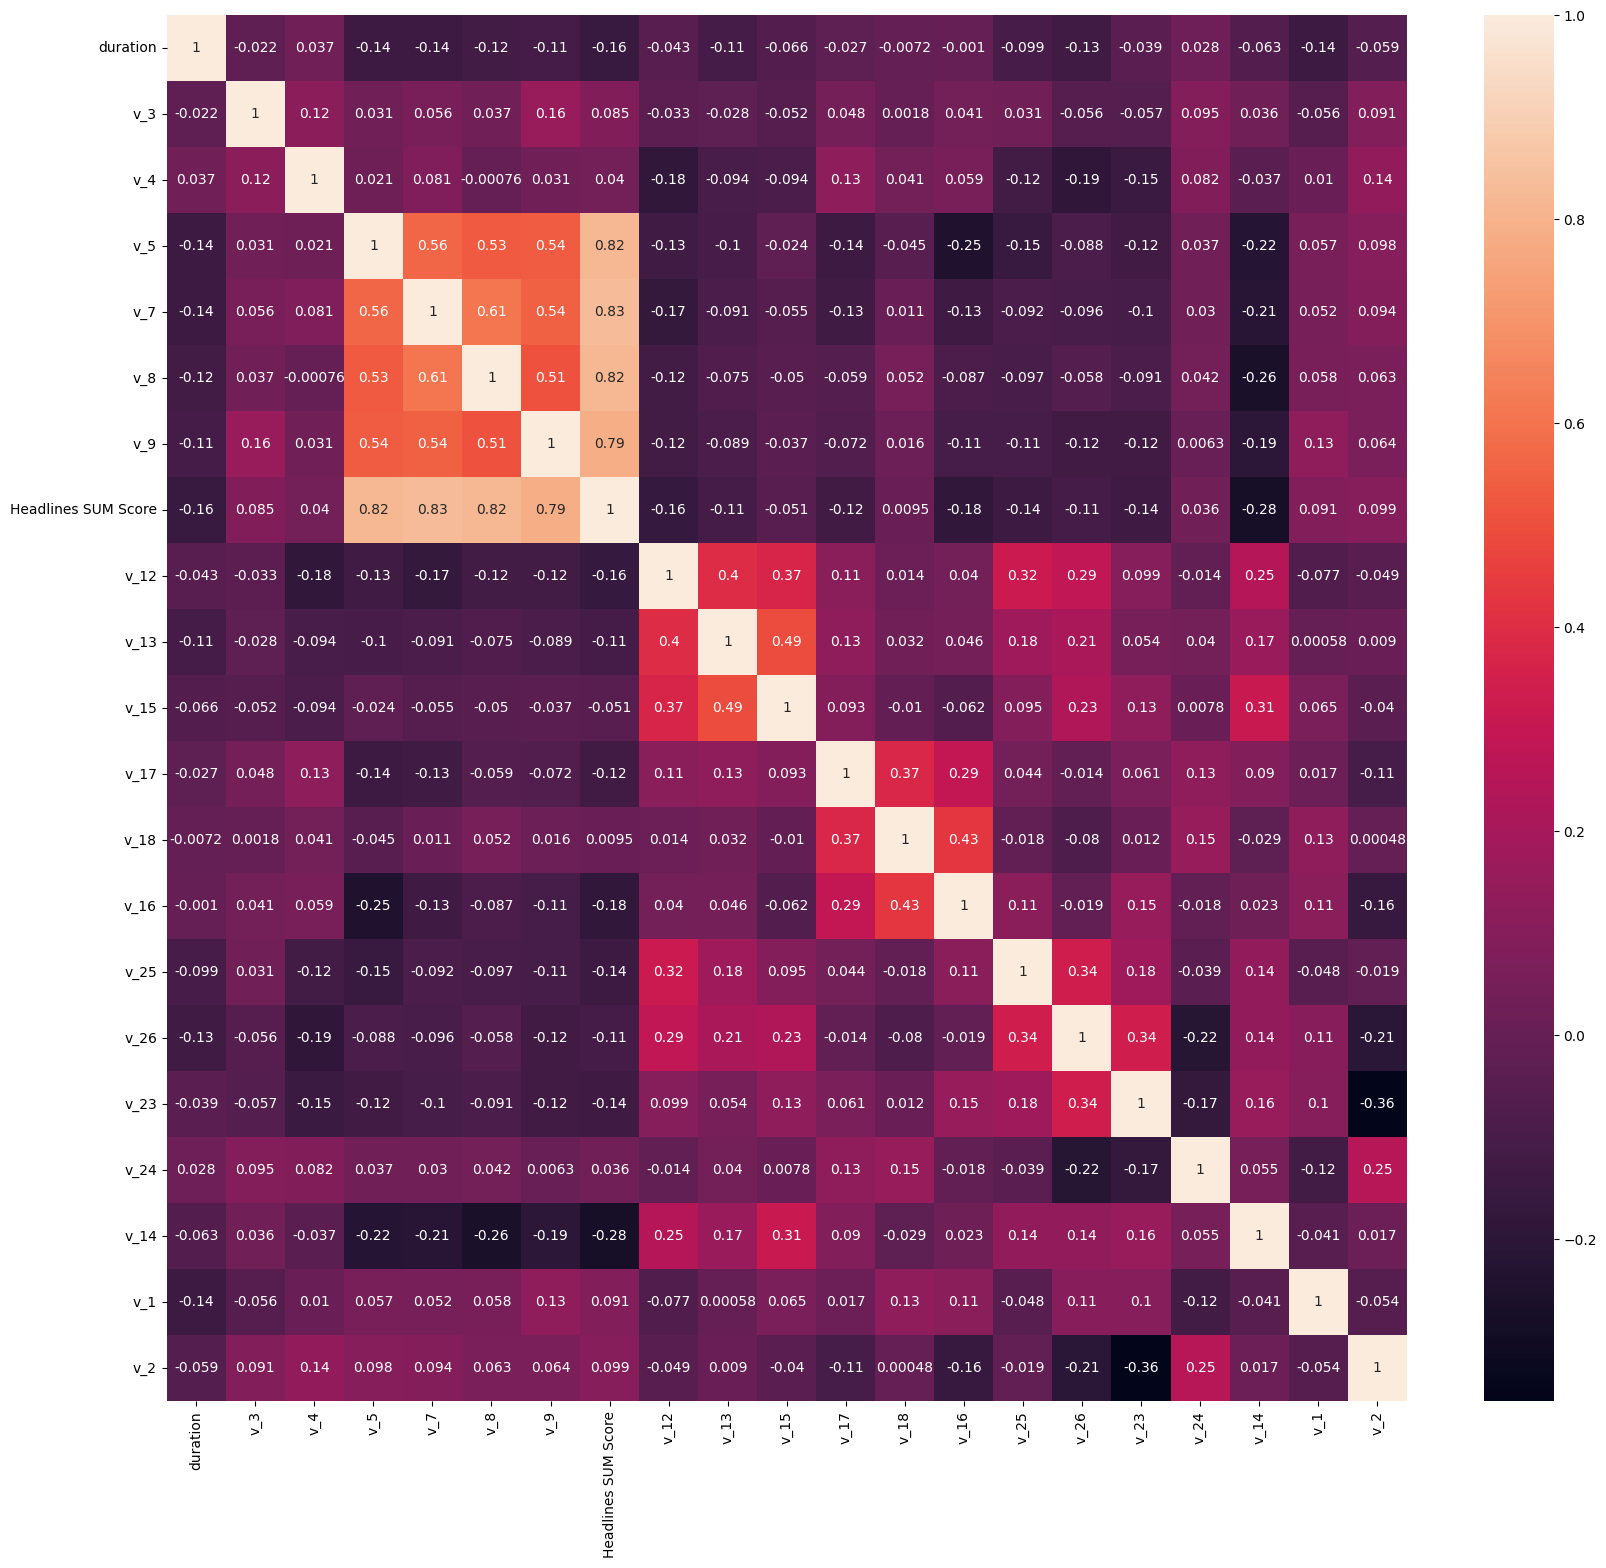

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = data.corr()

# Create a larger figure before generating the heatmap
plt.figure(figsize=(20, 18))

sns.heatmap(data = correlation_matrix, annot = True)
plt.show()


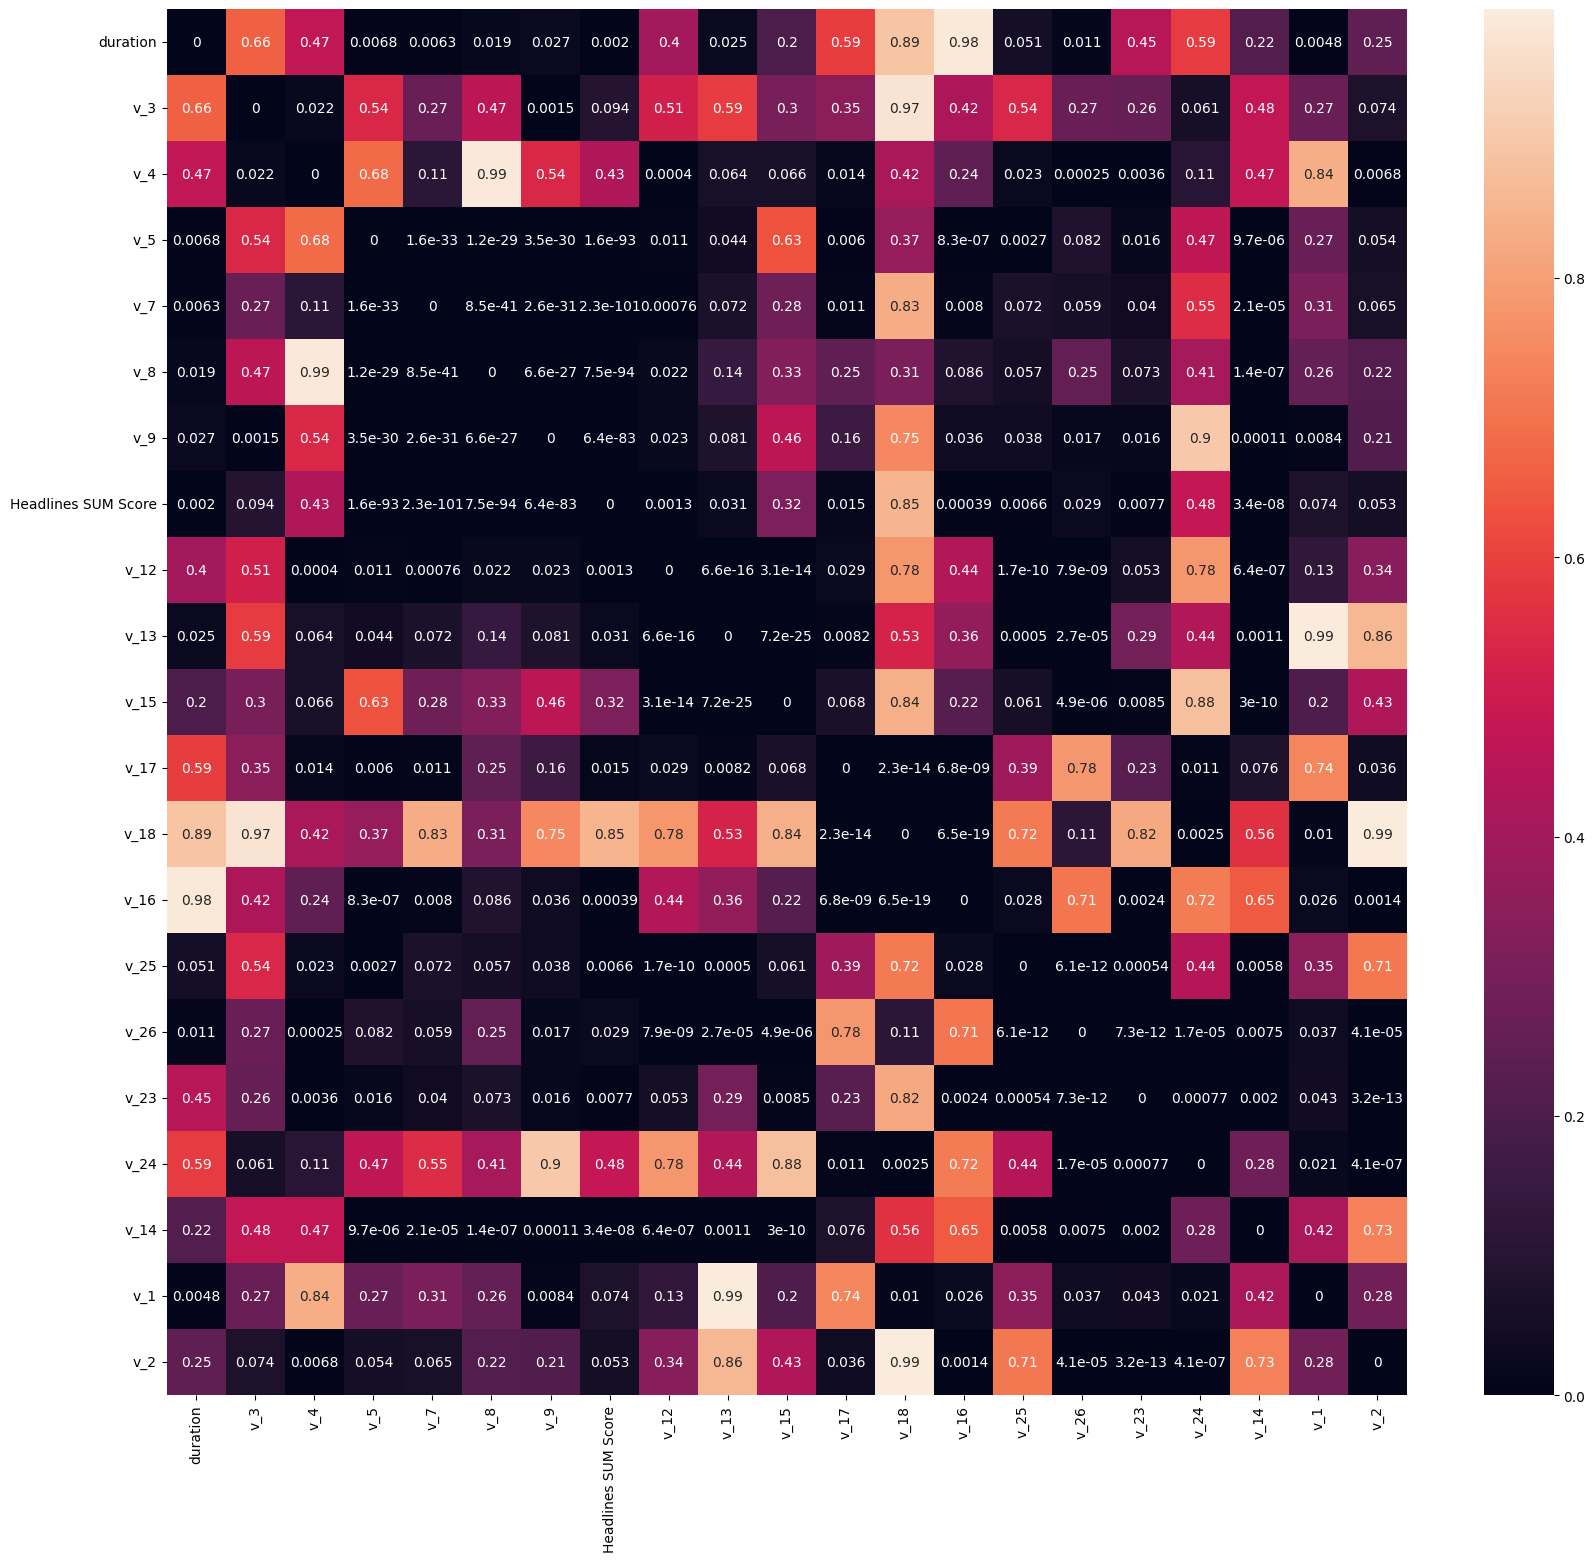

In [ ]:
# Calculate the p-values and put them in a matrix form
pval_matrix = pd.DataFrame(index=data.columns, columns=data.columns)

for i in data.columns:
    for j in data.columns:
        _, pval = pearsonr(data[i], data[j])
        pval_matrix.loc[i, j] = pval

# Convert the pval_matrix to float
pval_matrix = pval_matrix.astype(float)

# Create a larger figure before generating the heatmap
plt.figure(figsize=(20, 18))

# Generate a heatmap for p-values
sns.heatmap(data=pval_matrix, annot=True)
plt.show()


# **ALL CORRELATIONS OF 5% AND MORE OR LESS THAN -5%**

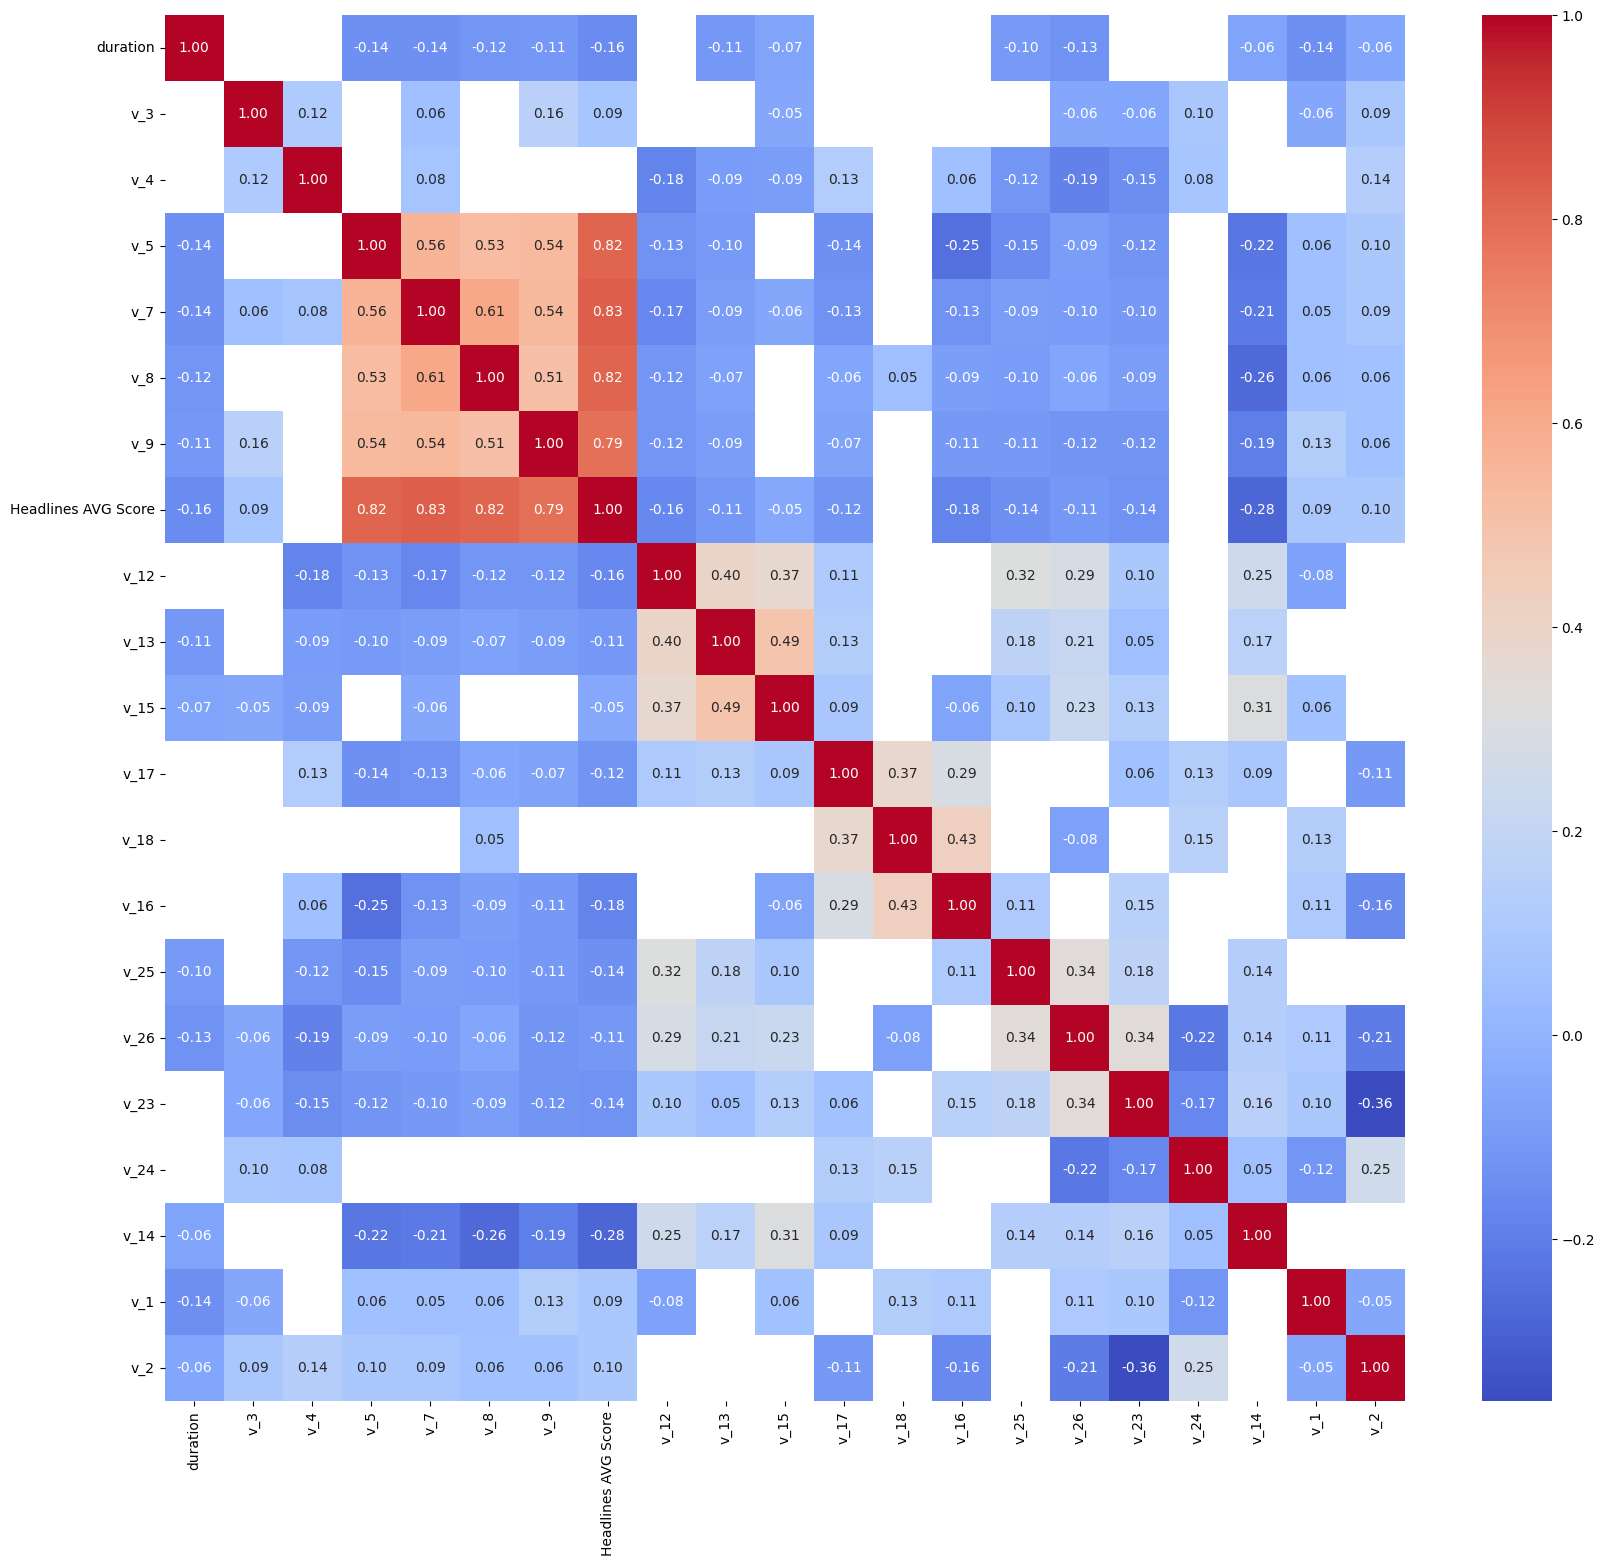

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set correlations where the absolute value is less than 0.05 to NaN
correlation_matrix[correlation_matrix.abs() < 0.05] = np.nan

# Create a larger figure before generating the heatmap
plt.figure(figsize=(20, 18))

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# **Pearson Correlation Coefficient Signficicance Testing 5% AND MORE OR LESS THAN -5%**

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison
target_column = 'Headlines AVG Score'

# Ensure the target column is numeric and drop NaN values
if not pd.api.types.is_numeric_dtype(data[target_column]):
    raise ValueError(f"The target column '{target_column}' must be numeric.")

# Dropping rows where the target column or any other column is NaN
data_cleaned = data.dropna(subset=[target_column] + data.columns.tolist())

# Iterate through all other columns and test correlations
for col in data_cleaned.columns:
    if col != target_column:
        # Ensure the comparison column is numeric
        if pd.api.types.is_numeric_dtype(data_cleaned[col]):
            corr, p_value = pearsonr(data_cleaned[target_column], data_cleaned[col])

            # Check if absolute value of correlation is greater than 0.05
            if abs(corr) > 0.05:
                print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between Headlines AVG Score and duration: Correlation coefficient = -0.15637366871656366, P-value = 0.0020335888702975053
Correlation between Headlines AVG Score and v_3: Correlation coefficient = 0.08534910608299298, P-value = 0.0936121491686597
Correlation between Headlines AVG Score and v_5: Correlation coefficient = 0.8156418335546948, P-value = 1.5855623336172713e-93
Correlation between Headlines AVG Score and v_7: Correlation coefficient = 0.8337946269449432, P-value = 2.2727983048011178e-101
Correlation between Headlines AVG Score and v_8: Correlation coefficient = 0.8164432958944617, P-value = 7.45453589337848e-94
Correlation between Headlines AVG Score and v_9: Correlation coefficient = 0.7874428961410046, P-value = 6.394038427132423e-83
Correlation between Headlines AVG Score and v_12: Correlation coefficient = -0.16316967983546066, P-value = 0.0012767468030053352
Correlation between Headlines AVG Score and v_13: Correlation coefficient = -0.1099183731490475, P-va

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'duration'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between duration and v_5: Correlation coefficient = -0.13745316007577102, P-value = 0.006766137553470084
Correlation between duration and v_7: Correlation coefficient = -0.13861346282052414, P-value = 0.006309968707225537
Correlation between duration and v_8: Correlation coefficient = -0.11921007160830184, P-value = 0.01898001510221457
Correlation between duration and v_9: Correlation coefficient = -0.11248157476201906, P-value = 0.026922381542363732
Correlation between duration and Headlines AVG Score: Correlation coefficient = -0.15637366871656366, P-value = 0.0020335888702975053
Correlation between duration and v_13: Correlation coefficient = -0.1141905652475802, P-value = 0.024673336276181592
Correlation between duration and v_15: Correlation coefficient = -0.06550122509725778, P-value = 0.19852204953128552
Correlation between duration and v_25: Correlation coefficient = -0.0992033236950356, P-value = 0.05116910172602718
Correlation between duration and v_26: Correlatio

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_1'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_1 and duration: Correlation coefficient = -0.1429703853650945, P-value = 0.004833125192276762
Correlation between v_1 and v_3: Correlation coefficient = -0.05617688141580063, P-value = 0.27027684236982435
Correlation between v_1 and v_5: Correlation coefficient = 0.056509216510560935, P-value = 0.26744853449931655
Correlation between v_1 and v_7: Correlation coefficient = 0.0521323105405521, P-value = 0.30633549617882194
Correlation between v_1 and v_8: Correlation coefficient = 0.05757019835561442, P-value = 0.2585550966142317
Correlation between v_1 and v_9: Correlation coefficient = 0.13378501097264509, P-value = 0.008408681148856038
Correlation between v_1 and Headlines AVG Score: Correlation coefficient = 0.09081747138716531, P-value = 0.07434246033309615
Correlation between v_1 and v_12: Correlation coefficient = -0.07684384703072593, P-value = 0.1312889607304774
Correlation between v_1 and v_15: Correlation coefficient = 0.06490327056302897, P-value = 0.202

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_2'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_2 and duration: Correlation coefficient = -0.0589555358781374, P-value = 0.24725321163662736
Correlation between v_2 and v_3: Correlation coefficient = 0.0909655930444779, P-value = 0.07386921622795195
Correlation between v_2 and v_4: Correlation coefficient = 0.13747407049517515, P-value = 0.006757662123423374
Correlation between v_2 and v_5: Correlation coefficient = 0.09820194913823788, P-value = 0.053572343429440235
Correlation between v_2 and v_7: Correlation coefficient = 0.09383178181195688, P-value = 0.06518495829178568
Correlation between v_2 and v_8: Correlation coefficient = 0.06314912951344172, P-value = 0.2151572417118436
Correlation between v_2 and v_9: Correlation coefficient = 0.06397978737542521, P-value = 0.20917175282976097
Correlation between v_2 and Headlines AVG Score: Correlation coefficient = 0.0985458256887214, P-value = 0.052736687367684054
Correlation between v_2 and v_17: Correlation coefficient = -0.10645902257360595, P-value = 0.03630

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_3'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_3 and v_4: Correlation coefficient = 0.11633321648106741, P-value = 0.022084146748132857
Correlation between v_3 and v_7: Correlation coefficient = 0.056161645478902796, P-value = 0.2704069943602235
Correlation between v_3 and v_9: Correlation coefficient = 0.16079481245682747, P-value = 0.001505356151175822
Correlation between v_3 and Headlines AVG Score: Correlation coefficient = 0.08534910608299298, P-value = 0.0936121491686597
Correlation between v_3 and v_15: Correlation coefficient = -0.05235504972807559, P-value = 0.30427069872601287
Correlation between v_3 and v_26: Correlation coefficient = -0.05628357438786677, P-value = 0.2693666236179439
Correlation between v_3 and v_23: Correlation coefficient = -0.05710343793759236, P-value = 0.2624421339923699
Correlation between v_3 and v_24: Correlation coefficient = 0.09516429782183451, P-value = 0.061443159887221814
Correlation between v_3 and v_1: Correlation coefficient = -0.05617688141580063, P-value = 0.2702

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_4'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_4 and v_3: Correlation coefficient = 0.11633321648106741, P-value = 0.022084146748132857
Correlation between v_4 and v_7: Correlation coefficient = 0.08107840546859482, P-value = 0.1112806664544055
Correlation between v_4 and v_12: Correlation coefficient = -0.17908788061099085, P-value = 0.0003996115775392365
Correlation between v_4 and v_13: Correlation coefficient = -0.0943494826916692, P-value = 0.06370956287816591
Correlation between v_4 and v_15: Correlation coefficient = -0.09360414916223908, P-value = 0.06584251484498348
Correlation between v_4 and v_17: Correlation coefficient = 0.12525365663271903, P-value = 0.01367165515837822
Correlation between v_4 and v_16: Correlation coefficient = 0.05929292962777328, P-value = 0.2445536688333347
Correlation between v_4 and v_25: Correlation coefficient = -0.11528153480436565, P-value = 0.02332400302773942
Correlation between v_4 and v_26: Correlation coefficient = -0.18531660171201378, P-value = 0.0002467465346235

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_5'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_5 and duration: Correlation coefficient = -0.13745316007577102, P-value = 0.006766137553470084
Correlation between v_5 and v_7: Correlation coefficient = 0.5615119873140253, P-value = 1.554180339412242e-33
Correlation between v_5 and v_8: Correlation coefficient = 0.5320113243787937, P-value = 1.157292089987924e-29
Correlation between v_5 and v_9: Correlation coefficient = 0.5361460175832491, P-value = 3.495909173191314e-30
Correlation between v_5 and Headlines AVG Score: Correlation coefficient = 0.8156418335546948, P-value = 1.5855623336172713e-93
Correlation between v_5 and v_12: Correlation coefficient = -0.1286316333252347, P-value = 0.011314680891357369
Correlation between v_5 and v_13: Correlation coefficient = -0.10237605472780786, P-value = 0.04414088623029498
Correlation between v_5 and v_17: Correlation coefficient = -0.1394954909845845, P-value = 0.005981859265868679
Correlation between v_5 and v_16: Correlation coefficient = -0.24742773955773684, P-va

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_7'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_7 and duration: Correlation coefficient = -0.13861346282052414, P-value = 0.006309968707225537
Correlation between v_7 and v_3: Correlation coefficient = 0.056161645478902796, P-value = 0.2704069943602235
Correlation between v_7 and v_4: Correlation coefficient = 0.08107840546859482, P-value = 0.1112806664544055
Correlation between v_7 and v_5: Correlation coefficient = 0.5615119873140253, P-value = 1.554180339412242e-33
Correlation between v_7 and v_8: Correlation coefficient = 0.6099099665347584, P-value = 8.517808768119533e-41
Correlation between v_7 and v_9: Correlation coefficient = 0.5449273985851736, P-value = 2.602006498019165e-31
Correlation between v_7 and Headlines AVG Score: Correlation coefficient = 0.8337946269449432, P-value = 2.2727983048011178e-101
Correlation between v_7 and v_12: Correlation coefficient = -0.17036189444967062, P-value = 0.0007648698131554614
Correlation between v_7 and v_13: Correlation coefficient = -0.09140722105865019, P-valu

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_8'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_8 and duration: Correlation coefficient = -0.11921007160830184, P-value = 0.01898001510221457
Correlation between v_8 and v_5: Correlation coefficient = 0.5320113243787937, P-value = 1.157292089987924e-29
Correlation between v_8 and v_7: Correlation coefficient = 0.6099099665347584, P-value = 8.517808768119533e-41
Correlation between v_8 and v_9: Correlation coefficient = 0.5090667987161195, P-value = 6.640392502102163e-27
Correlation between v_8 and Headlines AVG Score: Correlation coefficient = 0.8164432958944617, P-value = 7.45453589337848e-94
Correlation between v_8 and v_12: Correlation coefficient = -0.11611571505944593, P-value = 0.022335775039088537
Correlation between v_8 and v_13: Correlation coefficient = -0.07471068225974574, P-value = 0.14236823198333742
Correlation between v_8 and v_17: Correlation coefficient = -0.05917736317366447, P-value = 0.24547600472117645
Correlation between v_8 and v_18: Correlation coefficient = 0.051805337230555616, P-valu

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_9'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_9 and duration: Correlation coefficient = -0.11248157476201906, P-value = 0.026922381542363732
Correlation between v_9 and v_3: Correlation coefficient = 0.16079481245682747, P-value = 0.001505356151175822
Correlation between v_9 and v_5: Correlation coefficient = 0.5361460175832491, P-value = 3.495909173191314e-30
Correlation between v_9 and v_7: Correlation coefficient = 0.5449273985851736, P-value = 2.602006498019165e-31
Correlation between v_9 and v_8: Correlation coefficient = 0.5090667987161195, P-value = 6.640392502102163e-27
Correlation between v_9 and Headlines AVG Score: Correlation coefficient = 0.7874428961410046, P-value = 6.394038427132423e-83
Correlation between v_9 and v_12: Correlation coefficient = -0.1157740803375954, P-value = 0.022736026846761324
Correlation between v_9 and v_13: Correlation coefficient = -0.08871813775488634, P-value = 0.08131892114846166
Correlation between v_9 and v_17: Correlation coefficient = -0.07163624702312413, P-valu

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_12'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_12 and v_4: Correlation coefficient = -0.17908788061099085, P-value = 0.0003996115775392365
Correlation between v_12 and v_5: Correlation coefficient = -0.1286316333252347, P-value = 0.011314680891357369
Correlation between v_12 and v_7: Correlation coefficient = -0.17036189444967062, P-value = 0.0007648698131554614
Correlation between v_12 and v_8: Correlation coefficient = -0.11611571505944593, P-value = 0.022335775039088537
Correlation between v_12 and v_9: Correlation coefficient = -0.1157740803375954, P-value = 0.022736026846761324
Correlation between v_12 and Headlines AVG Score: Correlation coefficient = -0.16316967983546066, P-value = 0.0012767468030053352
Correlation between v_12 and v_13: Correlation coefficient = 0.3951056612782539, P-value = 6.554204541438656e-16
Correlation between v_12 and v_15: Correlation coefficient = 0.3732222900055048, P-value = 3.088526579429371e-14
Correlation between v_12 and v_17: Correlation coefficient = 0.1110607381374535

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_13'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_13 and duration: Correlation coefficient = -0.1141905652475802, P-value = 0.024673336276181592
Correlation between v_13 and v_4: Correlation coefficient = -0.0943494826916692, P-value = 0.06370956287816591
Correlation between v_13 and v_5: Correlation coefficient = -0.10237605472780786, P-value = 0.04414088623029498
Correlation between v_13 and v_7: Correlation coefficient = -0.09140722105865019, P-value = 0.07247277285072733
Correlation between v_13 and v_8: Correlation coefficient = -0.07471068225974574, P-value = 0.14236823198333742
Correlation between v_13 and v_9: Correlation coefficient = -0.08871813775488634, P-value = 0.08131892114846166
Correlation between v_13 and Headlines AVG Score: Correlation coefficient = -0.1099183731490475, P-value = 0.030625203413175754
Correlation between v_13 and v_12: Correlation coefficient = 0.3951056612782539, P-value = 6.554204541438656e-16
Correlation between v_13 and v_15: Correlation coefficient = 0.490974385556421, P-v

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_14'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_14 and duration: Correlation coefficient = -0.06315959253352775, P-value = 0.215081091472376
Correlation between v_14 and v_5: Correlation coefficient = -0.22275394338894197, P-value = 9.706384973981055e-06
Correlation between v_14 and v_7: Correlation coefficient = -0.21448416411520527, P-value = 2.0869810097530777e-05
Correlation between v_14 and v_8: Correlation coefficient = -0.2638331787595835, P-value = 1.3864785274615268e-07
Correlation between v_14 and v_9: Correlation coefficient = -0.19479653925953447, P-value = 0.00011492302727410264
Correlation between v_14 and Headlines AVG Score: Correlation coefficient = -0.2759205657277318, P-value = 3.430430156054796e-08
Correlation between v_14 and v_12: Correlation coefficient = 0.24979474316658037, P-value = 6.448844719272205e-07
Correlation between v_14 and v_13: Correlation coefficient = 0.16590445934776754, P-value = 0.0010532669861050374
Correlation between v_14 and v_15: Correlation coefficient = 0.3132222

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_15'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_15 and duration: Correlation coefficient = -0.06550122509725778, P-value = 0.19852204953128552
Correlation between v_15 and v_3: Correlation coefficient = -0.05235504972807559, P-value = 0.30427069872601287
Correlation between v_15 and v_4: Correlation coefficient = -0.09360414916223908, P-value = 0.06584251484498348
Correlation between v_15 and v_7: Correlation coefficient = -0.05520952472140317, P-value = 0.2786254169695492
Correlation between v_15 and Headlines AVG Score: Correlation coefficient = -0.051049749564738824, P-value = 0.3165023039657933
Correlation between v_15 and v_12: Correlation coefficient = 0.3732222900055048, P-value = 3.088526579429371e-14
Correlation between v_15 and v_13: Correlation coefficient = 0.490974385556421, P-value = 7.158048292113691e-25
Correlation between v_15 and v_17: Correlation coefficient = 0.09293888549726648, P-value = 0.06779551772188226
Correlation between v_15 and v_16: Correlation coefficient = -0.06204074565853359, 

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_16'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_16 and v_4: Correlation coefficient = 0.05929292962777328, P-value = 0.2445536688333347
Correlation between v_16 and v_5: Correlation coefficient = -0.24742773955773684, P-value = 8.28322583354469e-07
Correlation between v_16 and v_7: Correlation coefficient = -0.13465173197173458, P-value = 0.007991412911866946
Correlation between v_16 and v_8: Correlation coefficient = -0.08741916286734536, P-value = 0.08589448243751535
Correlation between v_16 and v_9: Correlation coefficient = -0.10683080663607866, P-value = 0.0356561947037389
Correlation between v_16 and Headlines AVG Score: Correlation coefficient = -0.17927997746272886, P-value = 0.0003938058140379981
Correlation between v_16 and v_15: Correlation coefficient = -0.06204074565853359, P-value = 0.2233340247369532
Correlation between v_16 and v_17: Correlation coefficient = 0.2892489141037047, P-value = 6.785517834832933e-09
Correlation between v_16 and v_18: Correlation coefficient = 0.43073229768821414, P-va

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_17'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_17 and v_4: Correlation coefficient = 0.12525365663271903, P-value = 0.01367165515837822
Correlation between v_17 and v_5: Correlation coefficient = -0.1394954909845845, P-value = 0.005981859265868679
Correlation between v_17 and v_7: Correlation coefficient = -0.12880804465642573, P-value = 0.011202119622533976
Correlation between v_17 and v_8: Correlation coefficient = -0.05917736317366447, P-value = 0.24547600472117645
Correlation between v_17 and v_9: Correlation coefficient = -0.07163624702312413, P-value = 0.15957576848616586
Correlation between v_17 and Headlines AVG Score: Correlation coefficient = -0.123554022921775, P-value = 0.015013358340035591
Correlation between v_17 and v_12: Correlation coefficient = 0.11106073813745358, P-value = 0.028924313251263583
Correlation between v_17 and v_13: Correlation coefficient = 0.1341348568067709, P-value = 0.008237972408343465
Correlation between v_17 and v_15: Correlation coefficient = 0.09293888549726648, P-valu

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_18'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_18 and v_8: Correlation coefficient = 0.051805337230555616, P-value = 0.3093832636143123
Correlation between v_18 and v_17: Correlation coefficient = 0.37494077486891403, P-value = 2.3059428066042785e-14
Correlation between v_18 and v_16: Correlation coefficient = 0.43073229768821414, P-value = 6.50651943313936e-19
Correlation between v_18 and v_26: Correlation coefficient = -0.08041218111982046, P-value = 0.11425920511166691
Correlation between v_18 and v_24: Correlation coefficient = 0.15309385179010007, P-value = 0.002529508967384884
Correlation between v_18 and v_1: Correlation coefficient = 0.13038967556764502, P-value = 0.010236383269844312


In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_23'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_23 and v_3: Correlation coefficient = -0.05710343793759236, P-value = 0.2624421339923699
Correlation between v_23 and v_4: Correlation coefficient = -0.14752852756038165, P-value = 0.0036285151281896092
Correlation between v_23 and v_5: Correlation coefficient = -0.12262740501925277, P-value = 0.015792432449077593
Correlation between v_23 and v_7: Correlation coefficient = -0.10434804618980455, P-value = 0.04019575760852358
Correlation between v_23 and v_8: Correlation coefficient = -0.09122765385300735, P-value = 0.0730379514622532
Correlation between v_23 and v_9: Correlation coefficient = -0.12243291739663079, P-value = 0.015960377837797045
Correlation between v_23 and Headlines AVG Score: Correlation coefficient = -0.13531756888566965, P-value = 0.007683506733702741
Correlation between v_23 and v_12: Correlation coefficient = 0.09858369526071967, P-value = 0.05264532732765049
Correlation between v_23 and v_13: Correlation coefficient = 0.05357921366567116, P-v

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_24'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_24 and v_3: Correlation coefficient = 0.09516429782183451, P-value = 0.061443159887221814
Correlation between v_24 and v_4: Correlation coefficient = 0.08237866483127027, P-value = 0.10564361287507117
Correlation between v_24 and v_17: Correlation coefficient = 0.1297431395559977, P-value = 0.010621857436449035
Correlation between v_24 and v_18: Correlation coefficient = 0.15309385179010007, P-value = 0.002529508967384884
Correlation between v_24 and v_26: Correlation coefficient = -0.21693283812842035, P-value = 1.6687956066363967e-05
Correlation between v_24 and v_23: Correlation coefficient = -0.17031602283049552, P-value = 0.0007674230992816615
Correlation between v_24 and v_14: Correlation coefficient = 0.05489142148554281, P-value = 0.28140852843887415
Correlation between v_24 and v_1: Correlation coefficient = -0.11718061635804748, P-value = 0.02112706959282407
Correlation between v_24 and v_2: Correlation coefficient = 0.2539103614407104, P-value = 4.14788

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_25'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_25 and duration: Correlation coefficient = -0.0992033236950356, P-value = 0.05116910172602718
Correlation between v_25 and v_4: Correlation coefficient = -0.11528153480436565, P-value = 0.02332400302773942
Correlation between v_25 and v_5: Correlation coefficient = -0.15211362326152186, P-value = 0.0026978029489286622
Correlation between v_25 and v_7: Correlation coefficient = -0.09154821727307509, P-value = 0.07203149845105349
Correlation between v_25 and v_8: Correlation coefficient = -0.09692683553408274, P-value = 0.05676771243339172
Correlation between v_25 and v_9: Correlation coefficient = -0.10551947285219589, P-value = 0.03799642142208334
Correlation between v_25 and Headlines AVG Score: Correlation coefficient = -0.13785207381061237, P-value = 0.006606079614271226
Correlation between v_25 and v_12: Correlation coefficient = 0.31728891071676196, P-value = 1.6872540555842508e-10
Correlation between v_25 and v_13: Correlation coefficient = 0.176219393748758

In [ ]:
from scipy.stats import pearsonr

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_26'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_26 and duration: Correlation coefficient = -0.12986346835275725, P-value = 0.0105491564421157
Correlation between v_26 and v_3: Correlation coefficient = -0.05628357438786677, P-value = 0.2693666236179439
Correlation between v_26 and v_4: Correlation coefficient = -0.18531660171201378, P-value = 0.0002467465346235214
Correlation between v_26 and v_5: Correlation coefficient = -0.08840071850094476, P-value = 0.08241840522260208
Correlation between v_26 and v_7: Correlation coefficient = -0.09590171122013672, P-value = 0.059449769738811734
Correlation between v_26 and v_8: Correlation coefficient = -0.058010915941205415, P-value = 0.25492158847039015
Correlation between v_26 and v_9: Correlation coefficient = -0.12150297748017685, P-value = 0.016785207551527827
Correlation between v_26 and Headlines AVG Score: Correlation coefficient = -0.11105548908363388, P-value = 0.02893193952376248
Correlation between v_26 and v_12: Correlation coefficient = 0.2880522403771802,

# **DATA WITH DELETING ALL THE ROWS WHERE: NO HEADLIENS ANSWER IS GIVEN IN V_3,7,8,9**

          duration         v_3         v_4         v_5         v_7  \
count   387.000000  387.000000  387.000000  236.000000  210.000000   
mean    232.080103    3.826873    2.002584    1.440678    1.566667   
std     146.632781    1.774459    0.428872    0.497524    0.496720   
min      -1.000000    1.000000    1.000000    1.000000    1.000000   
25%     162.000000    1.000000    2.000000    1.000000    1.000000   
50%     205.000000    5.000000    2.000000    1.000000    2.000000   
75%     265.000000    5.000000    2.000000    2.000000    2.000000   
max    1451.000000    5.000000    3.000000    2.000000    2.000000   

              v_8         v_9  Headlines AVG Score        v_12        v_13  \
count  235.000000  265.000000           309.000000  387.000000  387.000000   
mean     1.523404    1.607547             4.702265    2.299742    2.540052   
std      0.500518    0.489221             2.003737    1.359318    1.251040   
min      1.000000    1.000000             0.000000    1.0

ValueError: ignored

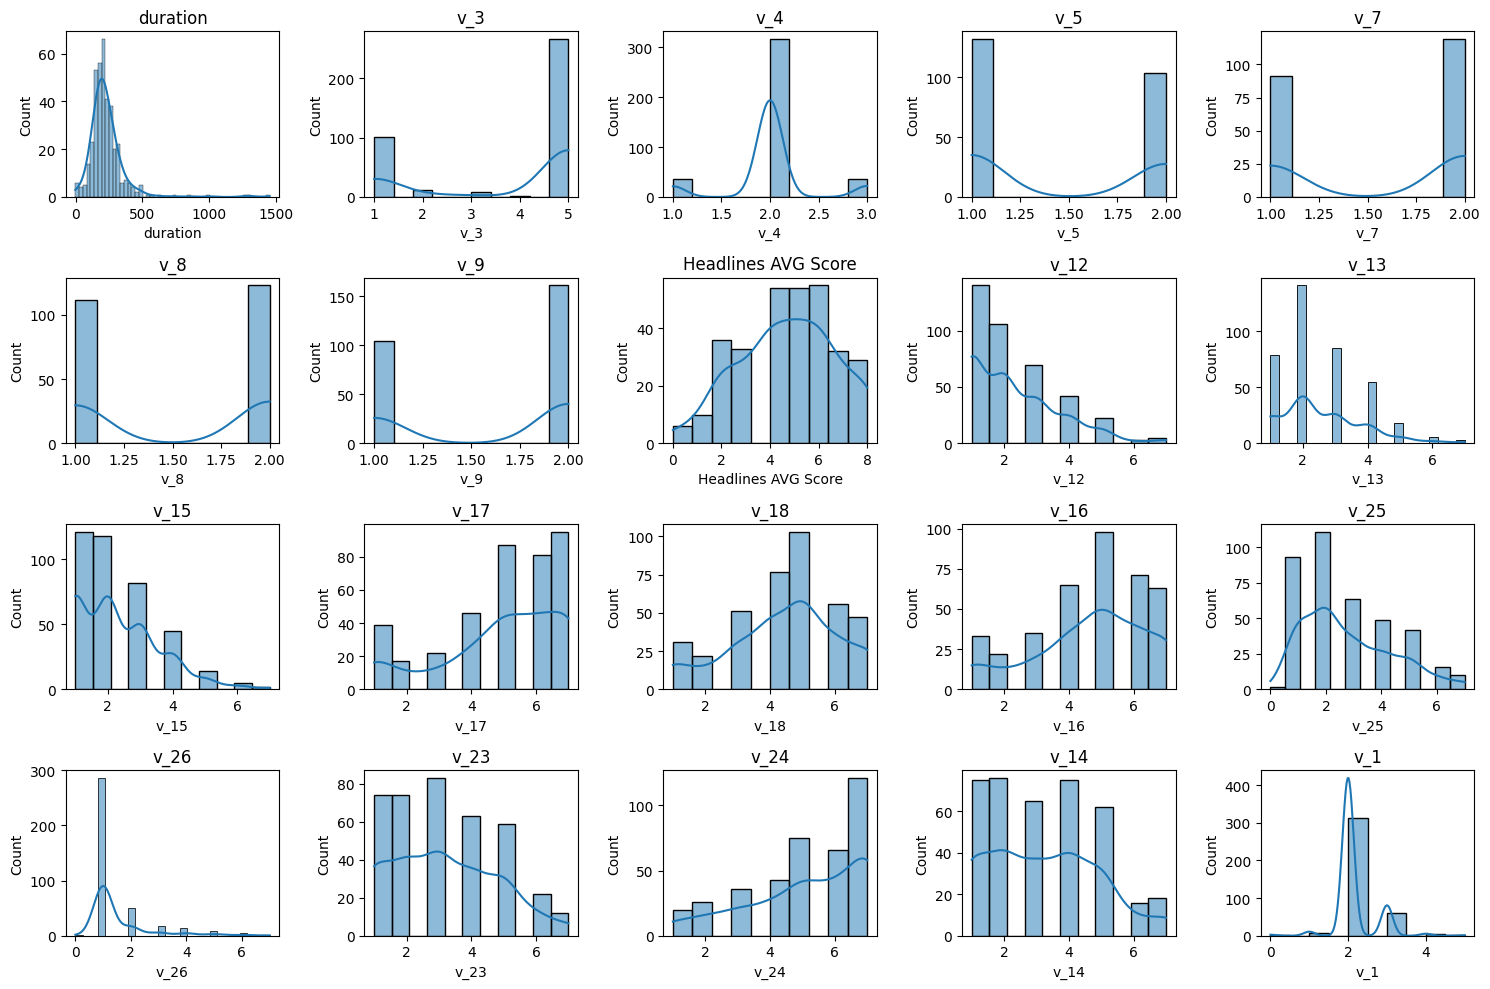

In [ ]:
# Load the data
data_without_no_answers_in_v3789 = pd.read_csv('Survey DATA Thesis - Clickbaits questions groups (7).csv')

# Use the correct DataFrame name
print(data_without_no_answers_in_v3789.describe())  # Descriptive statistics

# Visualizing the distribution of each numerical column
num_columns = data_without_no_answers_in_v3789.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data_without_no_answers_in_v3789[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()



# **ALL CORRELATIONS**

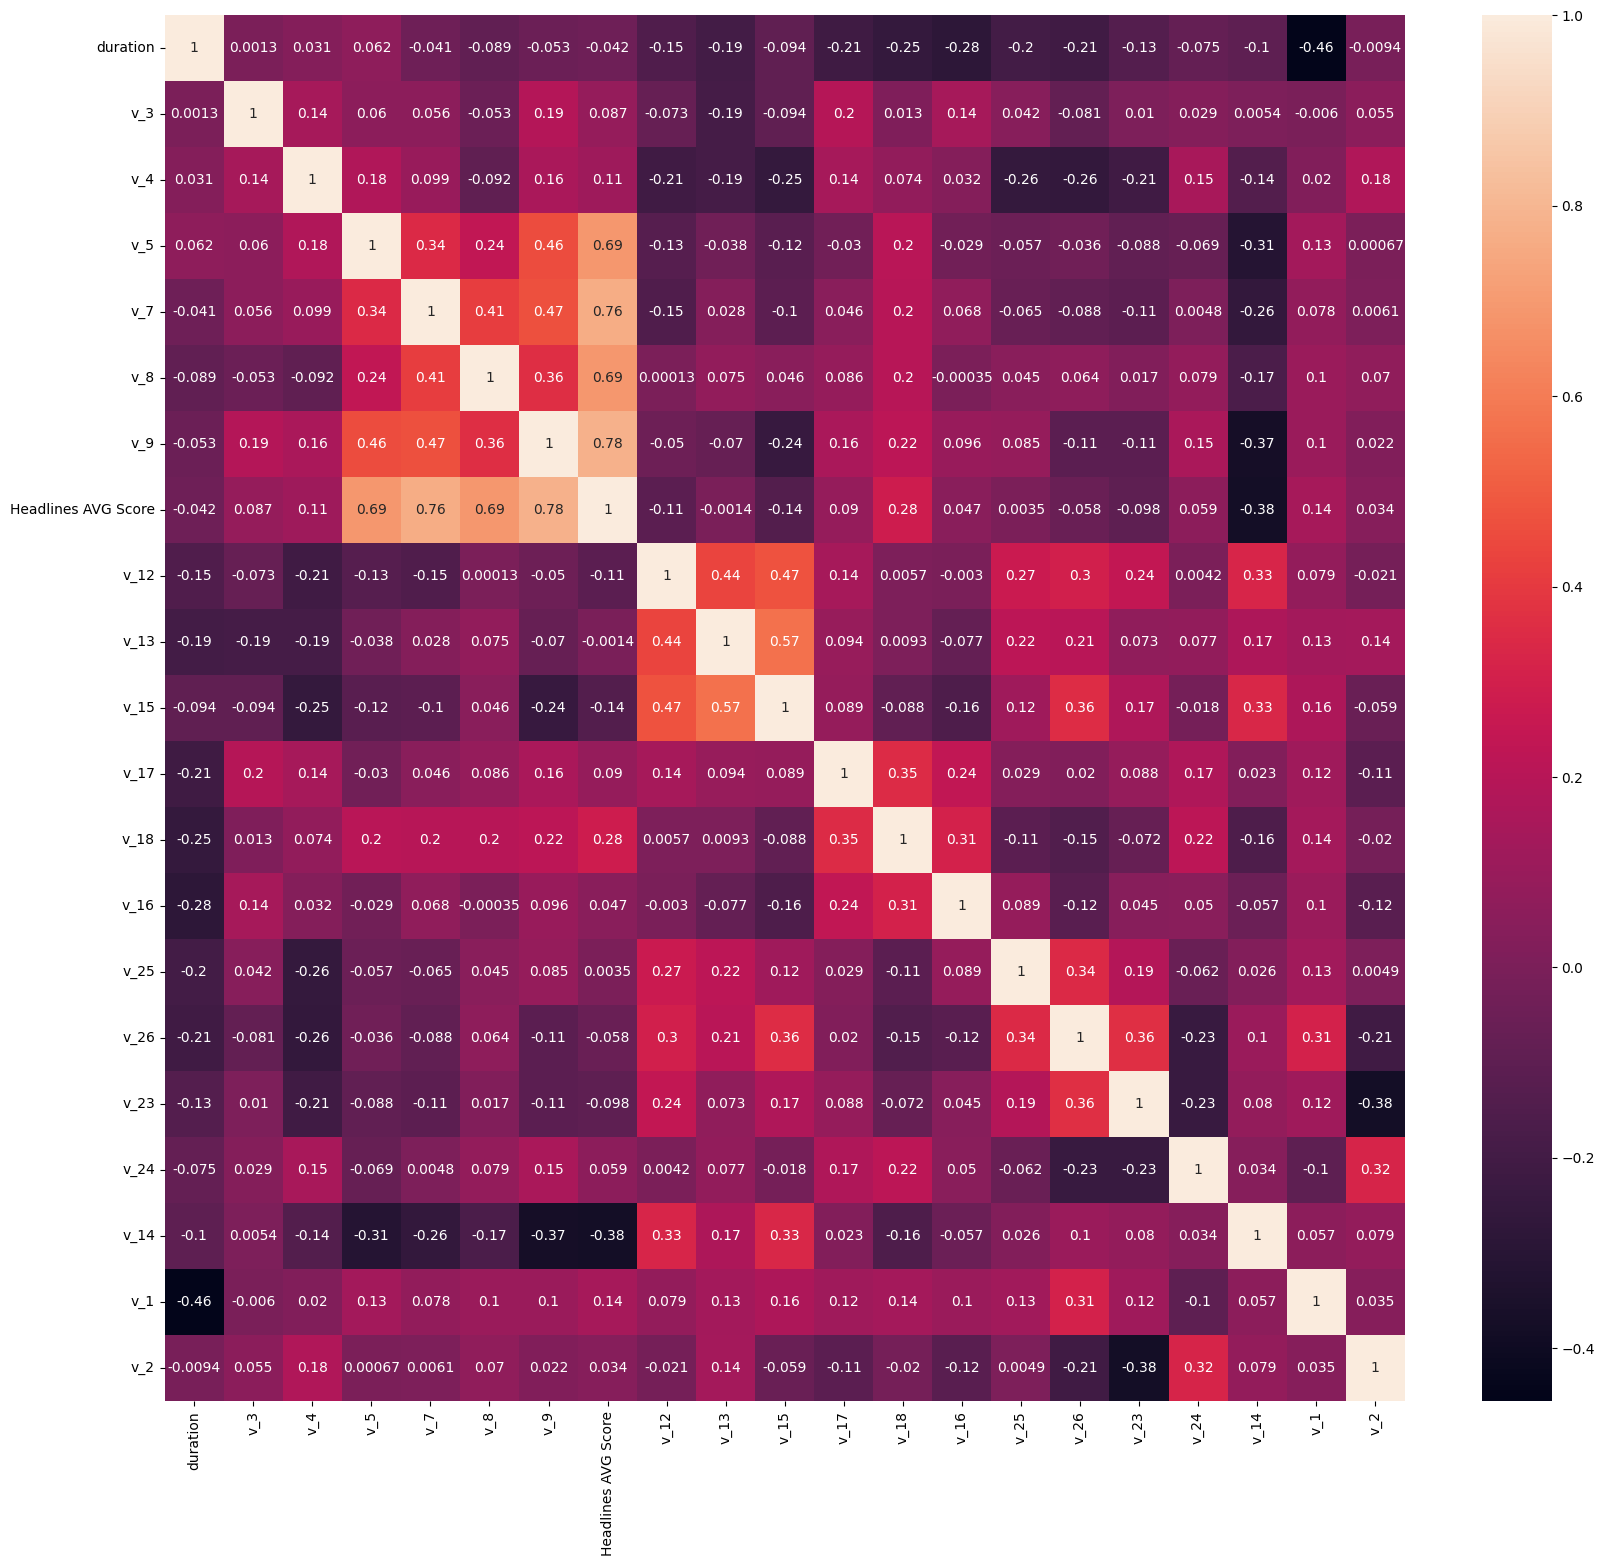

In [ ]:
# Drop rows where any cell is NaN
data_cleaned = data_without_no_answers_in_v3789.dropna()

# Calculate the correlation matrix on the cleaned data
correlation_matrix_data_without_no_answers_in_v3789 = data_cleaned.corr()

# Create a larger figure before generating the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(data=correlation_matrix_data_without_no_answers_in_v3789, annot=True)
plt.show()


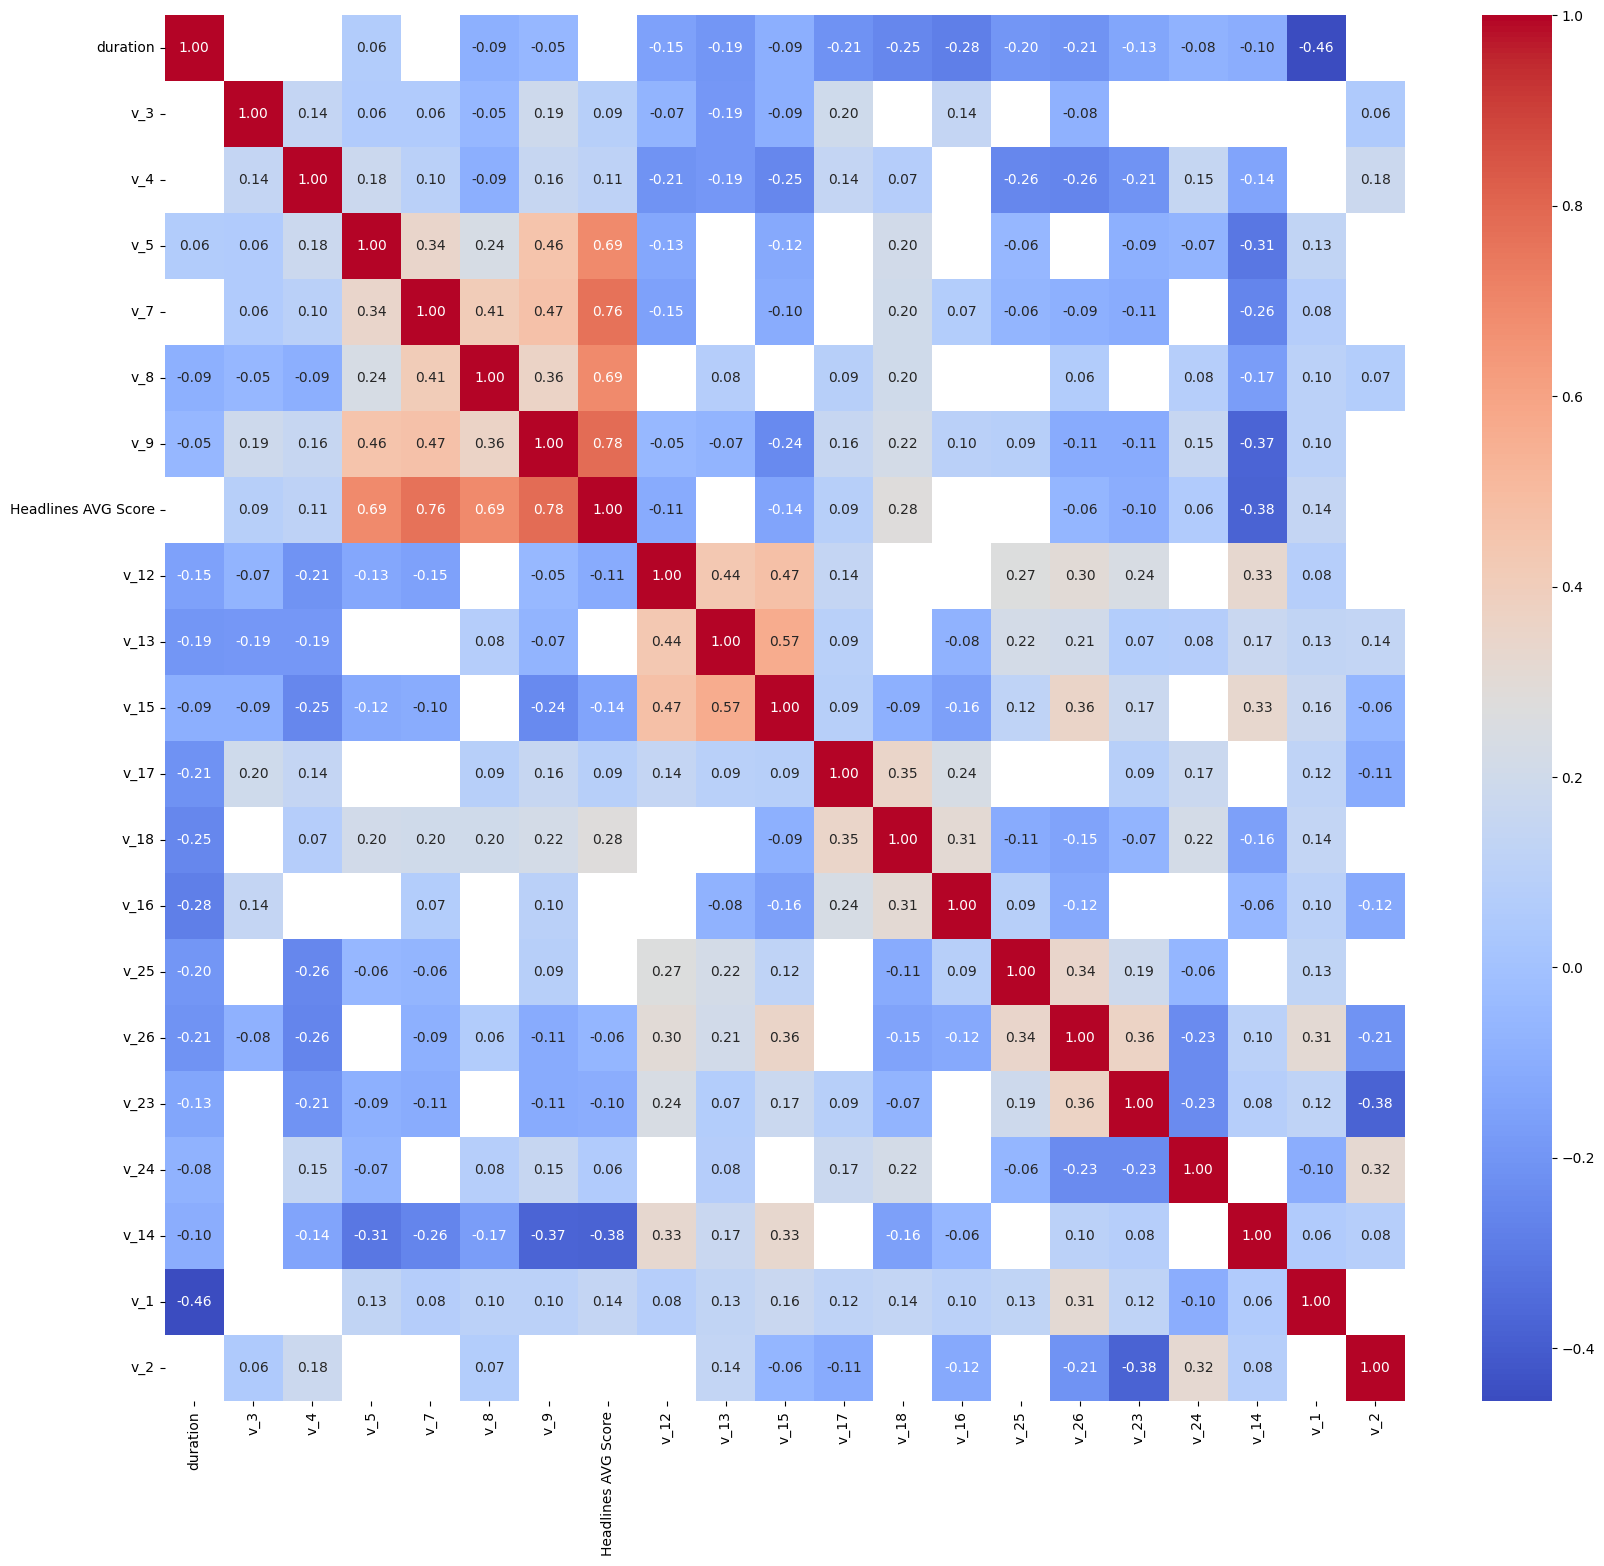

In [ ]:
correlation_matrix_data_without_no_answers_in_v3789[np.abs(correlation_matrix_data_without_no_answers_in_v3789) < 0.05] = np.nan

# Create a larger figure before generating the heatmap
plt.figure(figsize=(20, 18))

sns.heatmap(data=correlation_matrix_data_without_no_answers_in_v3789, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
# Drop rows where any cell (in any column, including the target column) is NaN
data_cleaned_correlation_matrix_data_without_no_answers_in_v3789 = data_without_no_answers_in_v3789.dropna()

# Select the column for comparison
target_column = 'Headlines AVG Score'

# Ensure the target column is in the DataFrame
if target_column not in data_cleaned_correlation_matrix_data_without_no_answers_in_v3789.columns:
    raise ValueError(f"The column '{target_column}' is not in the DataFrame.")

# Iterate through all other columns and test correlations
for col in data_cleaned_correlation_matrix_data_without_no_answers_in_v3789.columns:
    if col != target_column:
        # Ensure both columns have at least two non-NaN values
        if len(data_cleaned_correlation_matrix_data_without_no_answers_in_v3789[target_column].dropna()) > 1 and len(data_cleaned_correlation_matrix_data_without_no_answers_in_v3789[col].dropna()) > 1:
            # Calculating correlation and p-value
            corr, p_value = pearsonr(data_cleaned_correlation_matrix_data_without_no_answers_in_v3789[target_column], data_cleaned_correlation_matrix_data_without_no_answers_in_v3789[col])

            # Print every correlation and p-value
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between Headlines AVG Score and duration: Correlation coefficient = -0.04231168332658559, P-value = 0.6071782791404899
Correlation between Headlines AVG Score and v_3: Correlation coefficient = 0.08654014691253967, P-value = 0.2923380429972794
Correlation between Headlines AVG Score and v_4: Correlation coefficient = 0.11444569681236516, P-value = 0.16315803089461747
Correlation between Headlines AVG Score and v_5: Correlation coefficient = 0.6914109287551906, P-value = 1.196268777521075e-22
Correlation between Headlines AVG Score and v_7: Correlation coefficient = 0.7616891104564412, P-value = 1.095571441725053e-29
Correlation between Headlines AVG Score and v_8: Correlation coefficient = 0.6903751715369483, P-value = 1.4671139450713856e-22
Correlation between Headlines AVG Score and v_9: Correlation coefficient = 0.7823434448322788, P-value = 3.085563226703719e-32
Correlation between Headlines AVG Score and v_12: Correlation coefficient = -0.11148142345042233, P-value = 0

In [ ]:
data_cleaned_correlation_matrix_data_without_no_answers_in_v3789['Headlines AVG Score'].describe()

count    150.000000
mean       5.933333
std        1.454762
min        4.000000
25%        5.000000
50%        6.000000
75%        7.000000
max        8.000000
Name: Headlines AVG Score, dtype: float64

In [ ]:
data_cleaned_correlation_matrix_data_without_no_answers_in_v3789['Headlines AVG Score'].median()

6.0

In [ ]:
data_cleaned_correlation_matrix_data_without_no_answers_in_v3789['Headlines AVG Score'].mode()[0]

4.0

# **DEMOGRAPHICAL DATA CHECKING (NOT Hypotheses CHECKING)**

Gender

In [ ]:
data['v_2'].describe()


count    387.000000
mean       1.653747
std        0.542500
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: v_2, dtype: float64

         duration         v_3         v_4         v_5         v_7         v_8  \
count   374.00000  374.000000  374.000000  374.000000  374.000000  374.000000   
mean    227.13369    3.826203    2.005348    2.042781    2.213904    2.098930   
std     119.77346    1.775393    0.426939    0.852870    0.803624    0.817601   
min      -1.00000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     163.00000    1.000000    2.000000    1.000000    2.000000    1.000000   
50%     206.00000    5.000000    2.000000    2.000000    2.000000    2.000000   
75%     265.50000    5.000000    2.000000    3.000000    3.000000    3.000000   
max    1272.00000    5.000000    3.000000    3.000000    3.000000    3.000000   

              v_9  Headlines SUM Score        v_12        v_13  ...  \
count  374.000000           374.000000  374.000000  374.000000  ...   
mean     2.048128             8.403743    2.312834    2.550802  ...   
std      0.759451             2.620825    1.366389    1.2

ValueError: ignored

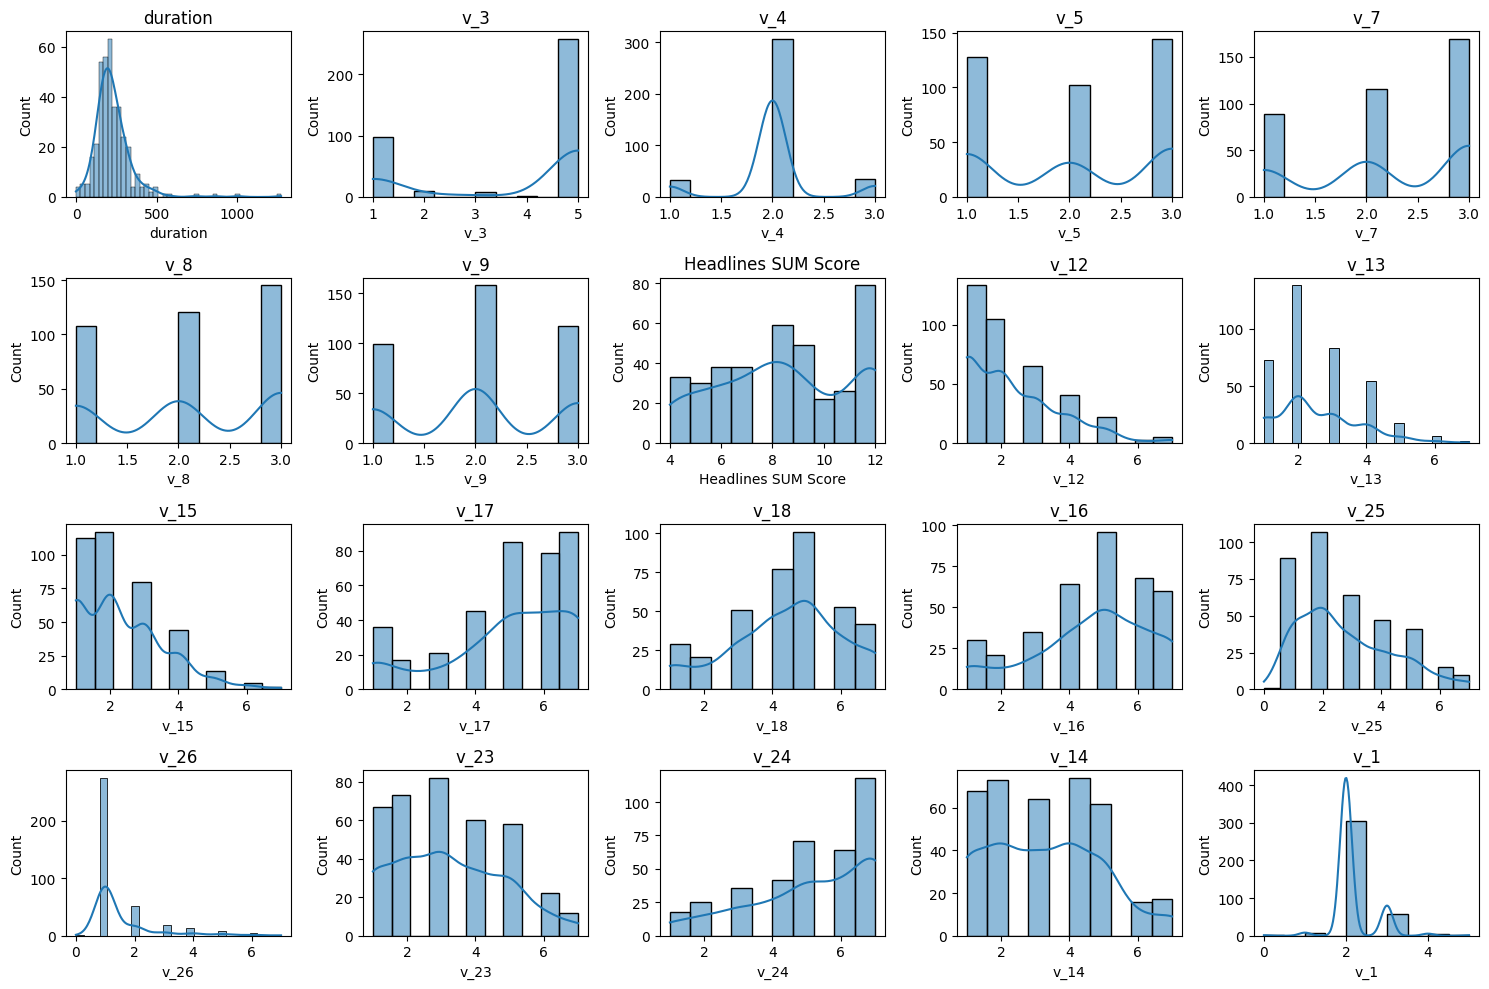

In [ ]:
# Load data
data = pd.read_csv('Survey DATA Thesis - Clickbaits questions groups (8).csv')

# Filter the DataFrame where v_2 equals 1
filtered_data = data[data['v_2'].isin([1, 2])]

print(filtered_data.describe())  # get descriptive statistics

# Visualizing the distribution of each numerical column in the filtered data
num_columns = filtered_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
# Assuming 'data' is your DataFrame and 'v_1' is the column of interest
value_counts = data['v_2'].value_counts()

# Filter to get only the counts of 1, 2, 3, 4, and 5
selected_counts = value_counts.loc[value_counts.index.isin([1, 2, 3])]

# Calculate percentages
total = data['v_2'].count()
percentages = (selected_counts / total) * 100

# Combine counts and percentages
combined = pd.DataFrame({
    'Counts': selected_counts,
    'Percentages': percentages
})

print(combined)

   Counts  Percentages
2     230    59.431525
1     144    37.209302
3      12     3.100775


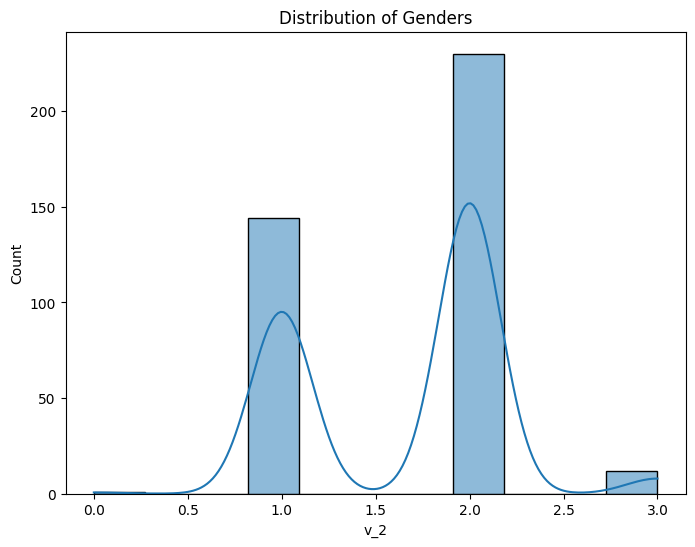

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['v_2'], kde=True)
plt.title('Distribution of Genders')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
from tabulate import tabulate

# Assuming 'data' is a pandas DataFrame with your data.

# Filter the DataFrame for rows where 'v_2' is either 1 or 2
filtered_data = data[data['v_2'].isin([1, 2])]

# Select the column for comparison, e.g., 'v_2'
target_column = 'v_2'

# Create a list to store our table rows
table = []

# Define ANSI escape sequence for bold text
BOLD = "\033[1m"
RESET = "\033[0m"

# Add the header row with bold
header = [f"{BOLD}Variable 1{RESET}", f"{BOLD}Variable 2{RESET}",
          f"{BOLD}Correlation coefficient{RESET}", f"{BOLD}Correlation coefficient P-Value{RESET}",
          f"{BOLD}Chi-square P-Value{RESET}"]
table.append(header)

# Iterate through all other columns and test correlations
for col in filtered_data.columns:
    if col == target_column:
        continue  # skip the comparison with itself

    # Pearson's correlation
    corr, p_corr_value = pearsonr(filtered_data[target_column], filtered_data[col])

    # Chi-square test - this assumes that the data is categorical!
    contingency_table = pd.crosstab(filtered_data[target_column], filtered_data[col])
    chi2_stat, p_chi_value, dof, ex = chi2_contingency(contingency_table)

    # Append the results to the table list
    table.append([target_column, col, f"{corr:.3f}", f"{p_corr_value:.3f}", f"{p_chi_value:.3f}"])

# Print the table with centered text and bold headers
print(tabulate(table, headers="firstrow", tablefmt="grid", colalign=("center",)*5))


+--------------+---------------------+---------------------------+-----------------------------------+----------------------+
|  Variable 1  |     Variable 2      |  Correlation coefficient  |  Correlation coefficient P-Value  |  Chi-square P-Value  |
+==============+=====================+===========================+===================================+======================+
|     v_2      |      duration       |          -0.053           |               0.31                |        0.402         |
+--------------+---------------------+---------------------------+-----------------------------------+----------------------+
|     v_2      |         v_3         |           0.077           |               0.135               |        0.386         |
+--------------+---------------------+---------------------------+-----------------------------------+----------------------+
|     v_2      |         v_4         |           0.139           |               0.007               |        0.007   

**Gender Men**

          duration         v_3         v_4         v_5         v_7  \
count   144.000000  144.000000  144.000000  144.000000  144.000000   
mean    235.083333    3.652778    1.930556    1.965278    2.159722   
std     131.845295    1.840946    0.467889    0.822865    0.781456   
min      39.000000    1.000000    1.000000    1.000000    1.000000   
25%     171.750000    1.000000    2.000000    1.000000    2.000000   
50%     210.500000    5.000000    2.000000    2.000000    2.000000   
75%     270.750000    5.000000    2.000000    3.000000    3.000000   
max    1272.000000    5.000000    3.000000    3.000000    3.000000   

              v_8         v_9  Headlines AVG Score        v_12        v_13  \
count  144.000000  144.000000           144.000000  144.000000  144.000000   
mean     2.062500    1.993056             8.180556    2.388889    2.527778   
std      0.812651    0.743235             2.507758    1.419697    1.273421   
min      1.000000    1.000000             4.000000    1.0

ValueError: ignored

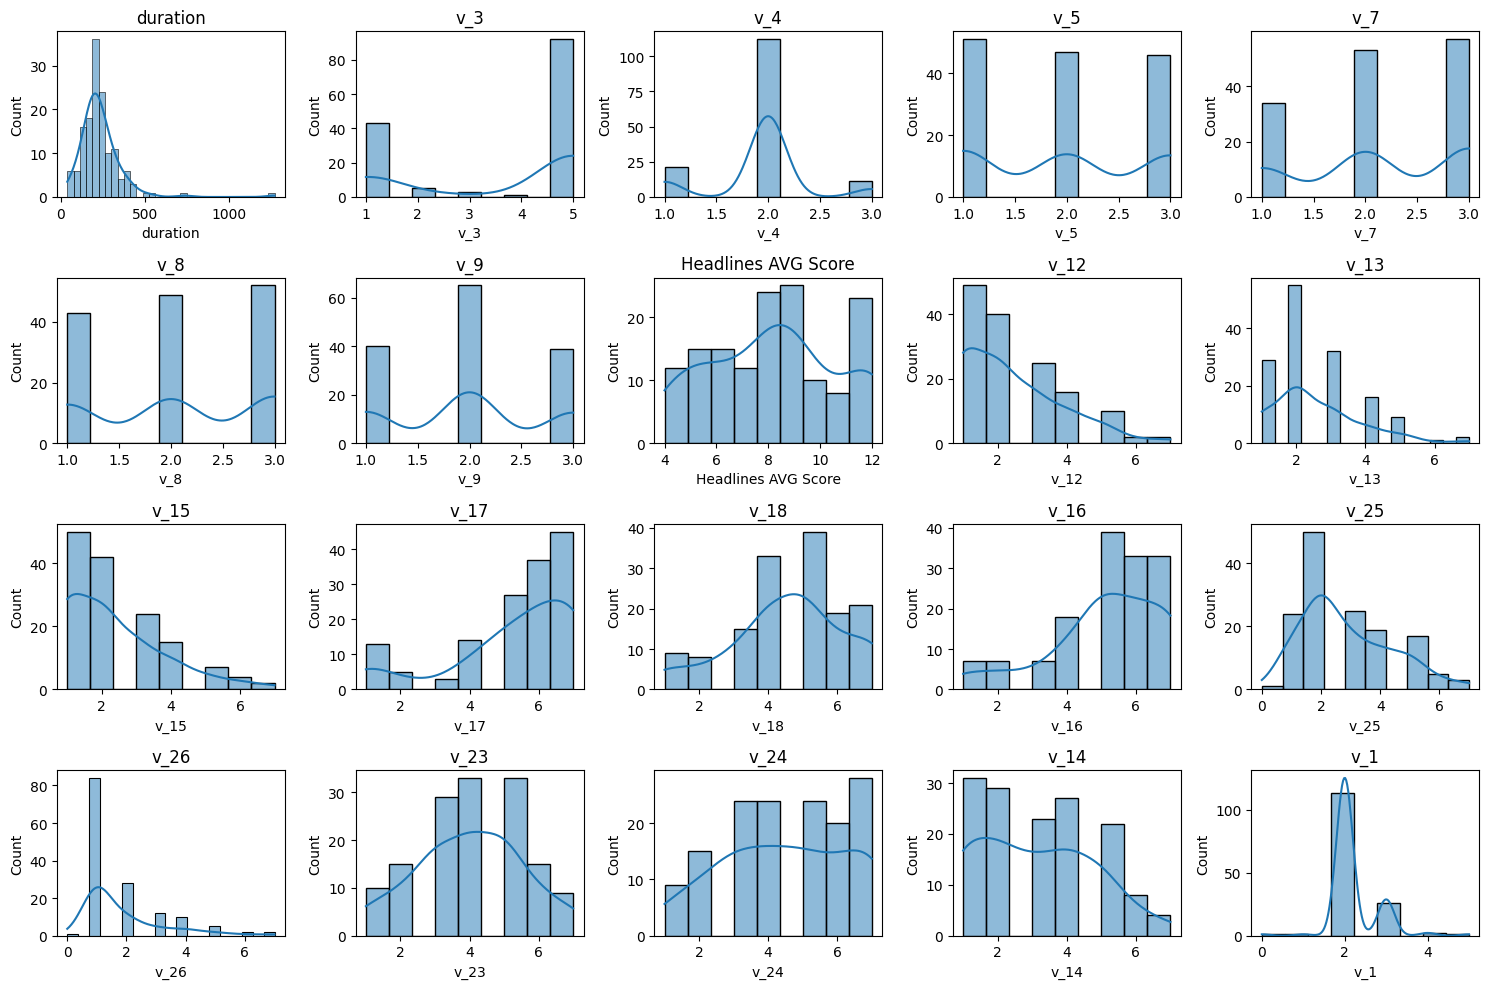

In [ ]:
# Load data
data = pd.read_csv('Survey DATA Thesis - Clickbaits questions groups (8).csv')

# Filter the DataFrame where v_2 equals 1
filtered_data = data[data['v_2'] == 1]

print(filtered_data.describe())  # get descriptive statistics

# Visualizing the distribution of each numerical column in the filtered data
num_columns = filtered_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
# Get descriptive statistics
filtered_data = data[data['v_2'] == 1]
desc_stats = filtered_data.describe()

# Determine the split point (halfway through the columns)
split_point = len(desc_stats.columns) // 2

# Split the descriptive statistics into two DataFrames
first_half_stats = desc_stats.iloc[:, :split_point]
second_half_stats = desc_stats.iloc[:, split_point:]

# Print the title for the table
print("Descriptive Statistics - Part 1")
# Print the first part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(first_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))

# Add spacing between tables for readability
print("\n" + "-"*50 + "\n")

# Print the title for the second part of the table
print("Descriptive Statistics - Part 2")
# Print the second part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(second_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))


Descriptive Statistics - Part 1
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
|       |   duration |     v_3 |     v_4 |     v_5 |     v_7 |     v_8 |     v_9 |   Headlines SUM Score |    v_12 |    v_13 |
+=======+============+=========+=========+=========+=========+=========+=========+=======================+=========+=========+
| count |    144.000 | 144.000 | 144.000 | 144.000 | 144.000 | 144.000 | 144.000 |               144.000 | 144.000 | 144.000 |
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
| mean  |    235.083 |   3.653 |   1.931 |   1.965 |   2.160 |   2.062 |   1.993 |                 8.181 |   2.389 |   2.528 |
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
| std   |    131.845 |   1.841 |   0.468 |   0.823 |   0.781 |   0.813 |   0.74

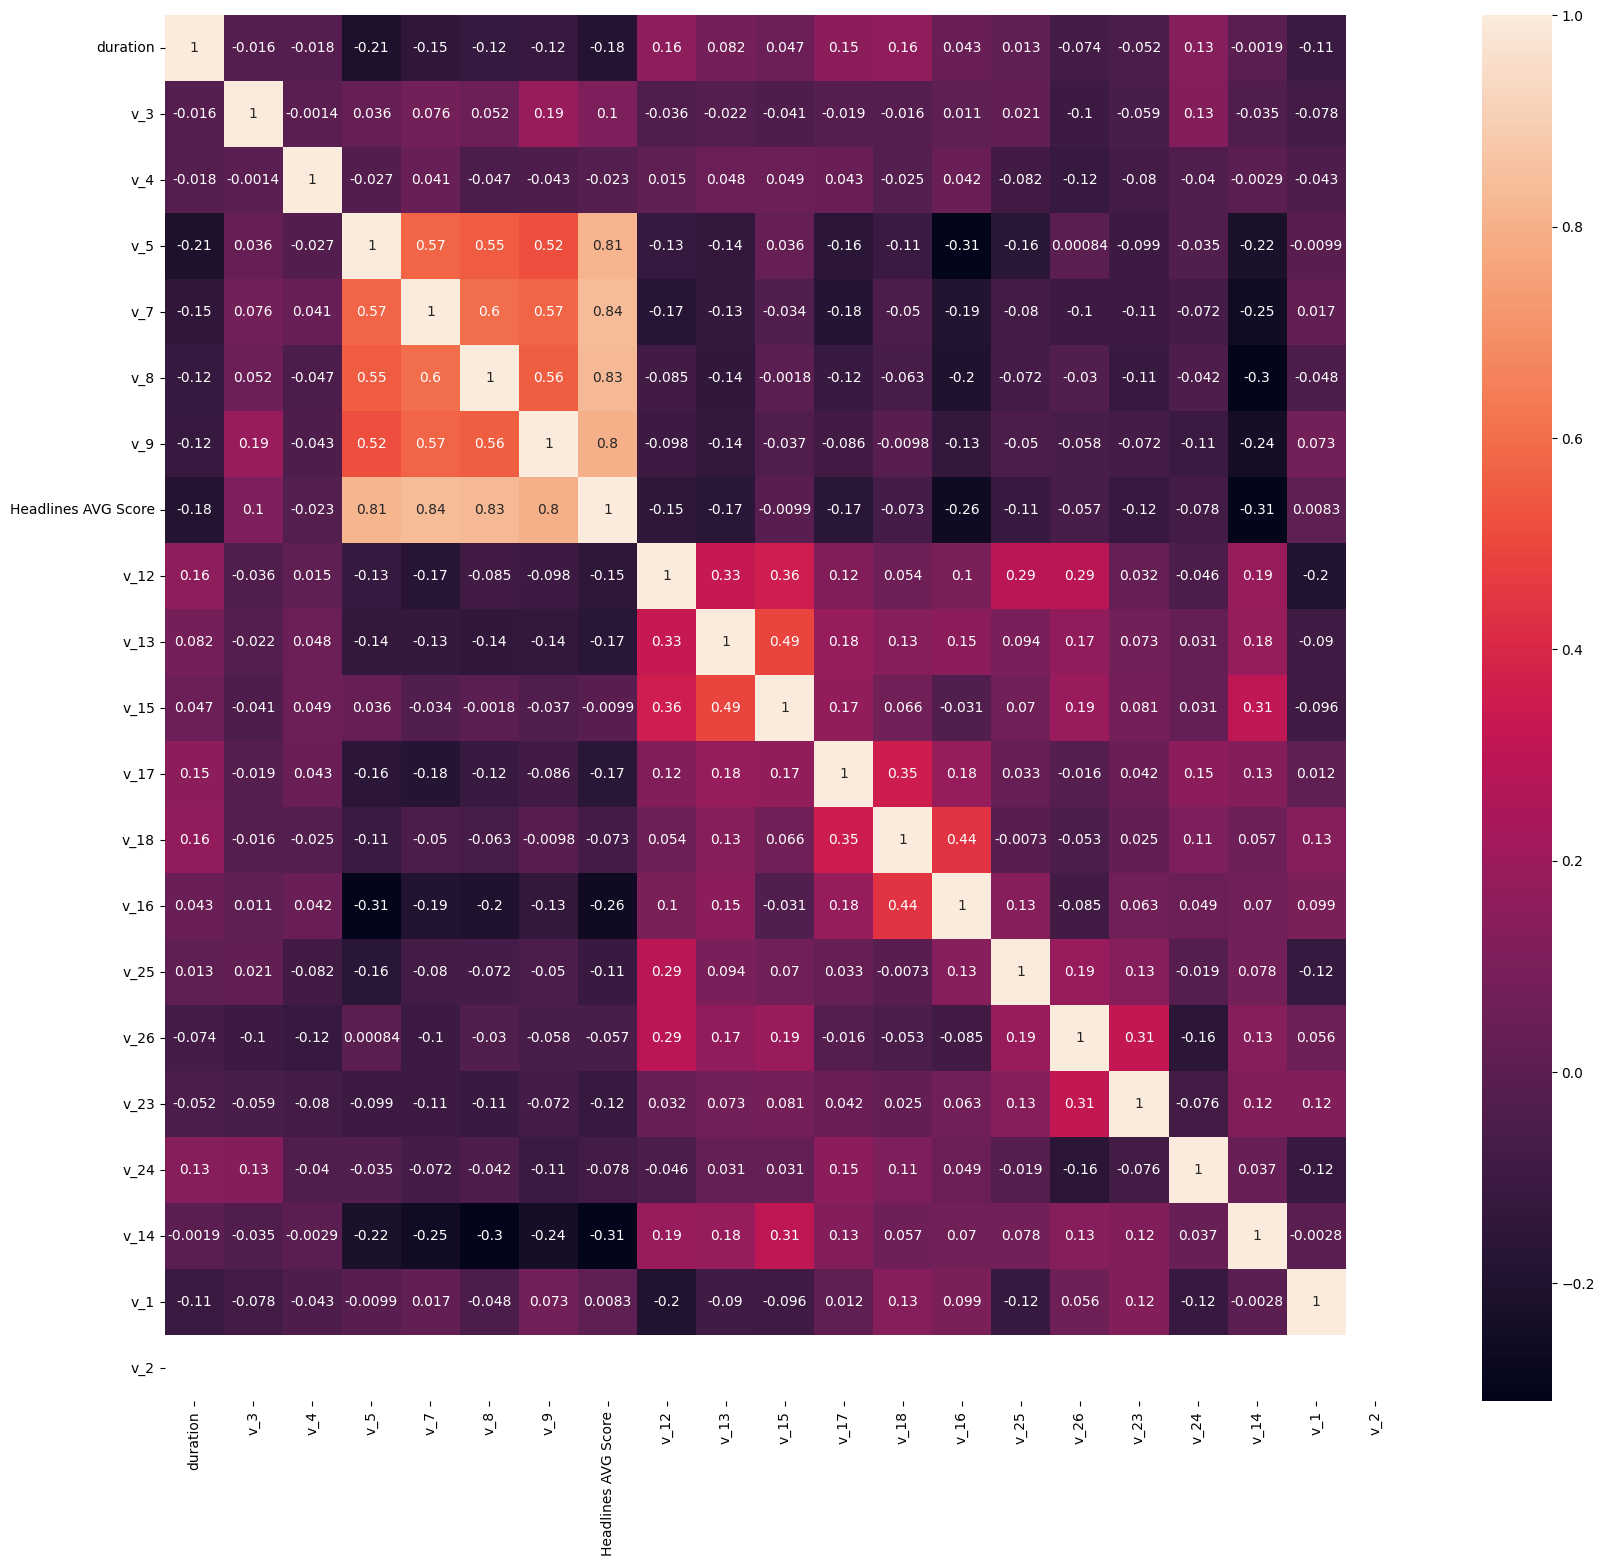

In [ ]:
correlation_matrix = filtered_data.corr()

# Create a larger figure before generating the heatmap
plt.figure(figsize=(20, 18))

sns.heatmap(data = correlation_matrix, annot = True)
plt.show()


**Gender Women**

          duration         v_3         v_4         v_5         v_7  \
count   230.000000  230.000000  230.000000  230.000000  230.000000   
mean    222.156522    3.934783    2.052174    2.091304    2.247826   
std     111.565798    1.728292    0.393028    0.869379    0.817051   
min      -1.000000    1.000000    1.000000    1.000000    1.000000   
25%     158.000000    2.000000    2.000000    1.000000    2.000000   
50%     204.500000    5.000000    2.000000    2.000000    2.000000   
75%     262.500000    5.000000    2.000000    3.000000    3.000000   
max    1004.000000    5.000000    3.000000    3.000000    3.000000   

              v_8         v_9  Headlines AVG Score        v_12        v_13  \
count  230.000000  230.000000           230.000000  230.000000  230.000000   
mean     2.121739    2.082609             8.543478    2.265217    2.565217   
std      0.821627    0.769025             2.685124    1.332859    1.208633   
min      1.000000    1.000000             4.000000    1.0

ValueError: ignored

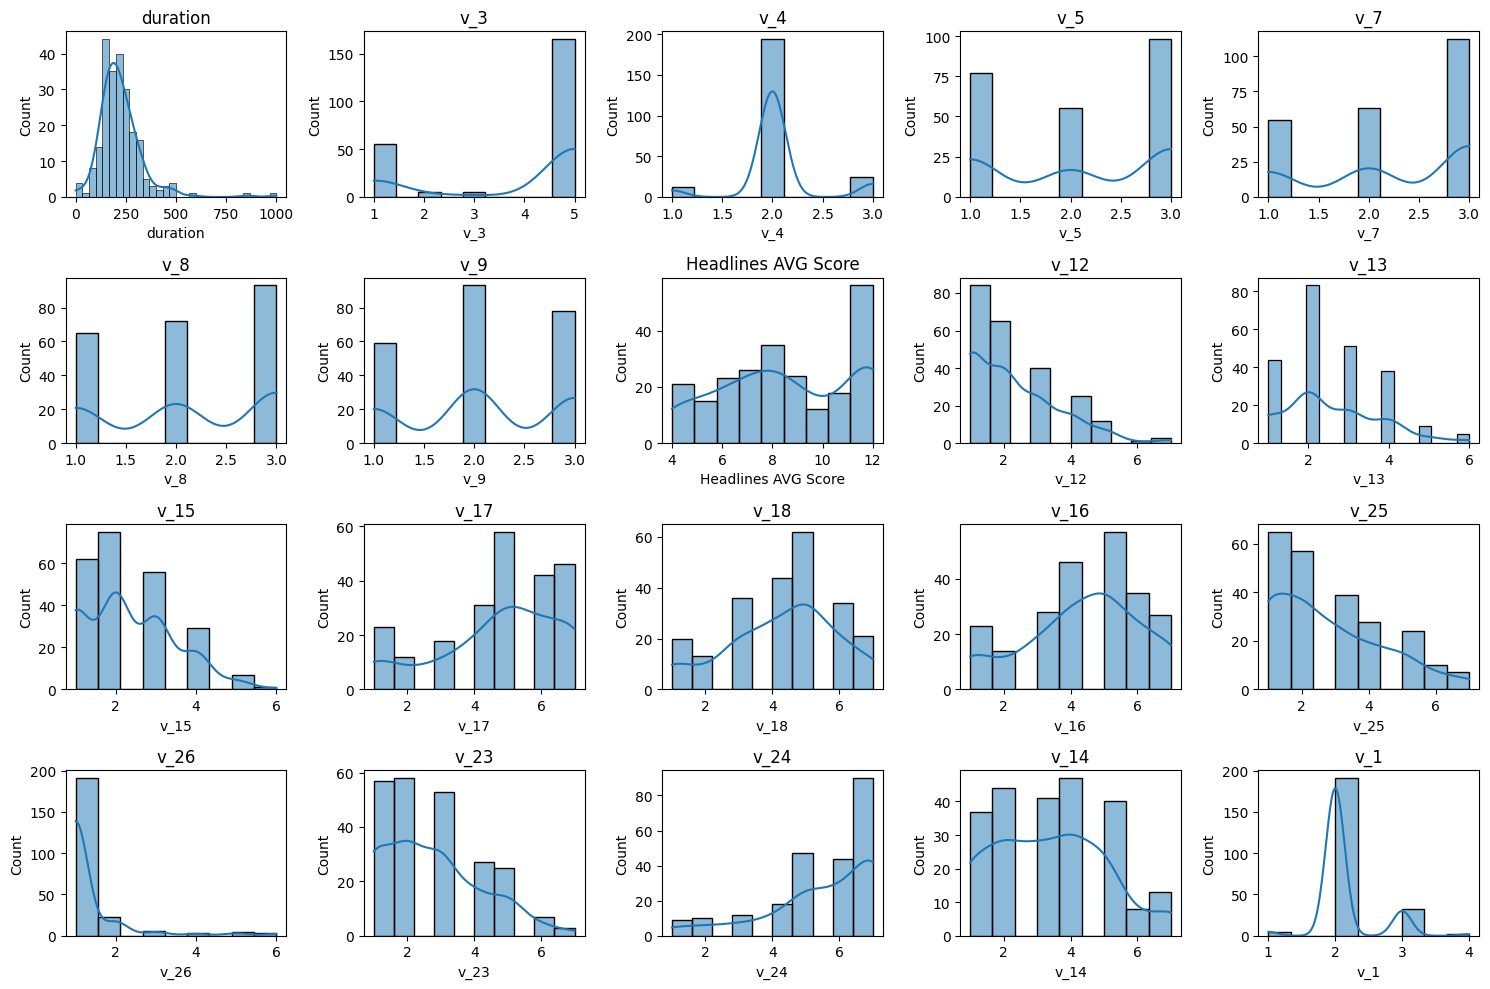

In [ ]:
# Load data
data = pd.read_csv('Survey DATA Thesis - Clickbaits questions groups (8).csv')

# Filter the DataFrame where v_2 equals 2
filtered_data = data[data['v_2'] == 2]

print(filtered_data.describe())  # get descriptive statistics

# Visualizing the distribution of each numerical column in the filtered data
num_columns = filtered_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
# Get descriptive statistics
filtered_data = data[data['v_2'] == 2]
desc_stats = filtered_data.describe()

# Determine the split point (halfway through the columns)
split_point = len(desc_stats.columns) // 2

# Split the descriptive statistics into two DataFrames
first_half_stats = desc_stats.iloc[:, :split_point]
second_half_stats = desc_stats.iloc[:, split_point:]

# Print the title for the table
print("Descriptive Statistics - Part 1")
# Print the first part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(first_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))

# Add spacing between tables for readability
print("\n" + "-"*50 + "\n")

# Print the title for the second part of the table
print("Descriptive Statistics - Part 2")
# Print the second part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(second_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))


Descriptive Statistics - Part 1
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
|       |   duration |     v_3 |     v_4 |     v_5 |     v_7 |     v_8 |     v_9 |   Headlines SUM Score |    v_12 |    v_13 |
+=======+============+=========+=========+=========+=========+=========+=========+=======================+=========+=========+
| count |    230.000 | 230.000 | 230.000 | 230.000 | 230.000 | 230.000 | 230.000 |               230.000 | 230.000 | 230.000 |
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
| mean  |    222.157 |   3.935 |   2.052 |   2.091 |   2.248 |   2.122 |   2.083 |                 8.543 |   2.265 |   2.565 |
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
| std   |    111.566 |   1.728 |   0.393 |   0.869 |   0.817 |   0.822 |   0.76

# **Chi-square statistic Testing between genders**

Gender and Hast du schon einmal eine App aus der Facebook-Werbung heruntergeladen?

In [ ]:
# Filter the DataFrame to include only rows where v_2 has values 1 or 2
df_filtered = data[data['v_2'].isin([1, 2])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_2'], df_filtered['v_4'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between gender (1 and 2) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 10.010902538148915, P-value: 0.006701316568859884
Expected frequencies, if there is no relationship between gender (1 and 2) and response:
 [[ 12.70588235 117.81818182  13.47593583]
 [ 20.29411765 188.18181818  21.52406417]]

Observed frequencies:
v_4   1    2   3
v_2             
1    21  112  11
2    12  194  24


Gender and Wie wichtig sind für Sie Transparenz und Authentizität in der Spielwerbung?

In [ ]:
# Filter the DataFrame to include only rows where v_2 has values 1 or 2
df_filtered = data[data['v_2'].isin([1, 2])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_2'], df_filtered['v_17'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between gender (1 and 2) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 15.472689345067579, P-value: 0.016882273532092134
Expected frequencies, if there is no relationship between gender (1 and 2) and response:
 [[13.86096257  6.54545455  8.0855615  17.32620321 32.72727273 30.4171123
  35.03743316]
 [22.13903743 10.45454545 12.9144385  27.67379679 52.27272727 48.5828877
  55.96256684]]

Observed frequencies:
v_17   1   2   3   4   5   6   7
v_2                             
1     13   5   3  14  27  37  45
2     23  12  18  31  58  42  46


Gender and Wie gut können Sie Ihrer Meinung nach Clickbait-Schlagzeilen von allgemeinen Schlagzeilen in Anzeigen unterscheiden?

In [ ]:
# Filter the DataFrame to include only rows where v_2 has values 1 or 2
df_filtered = data[data['v_2'].isin([1, 2])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_2'], df_filtered['v_16'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between gender (1 and 2) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 21.090244313607087, P-value: 0.0017673591602309425
Expected frequencies, if there is no relationship between gender (1 and 2) and response:
 [[11.55080214  8.0855615  13.47593583 24.64171123 36.96256684 26.18181818
  23.10160428]
 [18.44919786 12.9144385  21.52406417 39.35828877 59.03743316 41.81818182
  36.89839572]]

Observed frequencies:
v_16   1   2   3   4   5   6   7
v_2                             
1      7   7   7  18  39  33  33
2     23  14  28  46  57  35  27


Gender and Wie oft spielen Sie bei Spielen um Geld oder schließen Wetten ab?

In [ ]:
# Filter the DataFrame to include only rows where v_2 has values 1 or 2
df_filtered = data[data['v_2'].isin([1, 2])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_2'], df_filtered['v_26'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between gender (1 and 2) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 33.18239679590404, P-value: 2.4483192372423312e-05
Expected frequencies, if there is no relationship between gender (1 and 2) and response:
 [[  0.38502674 105.88235294  19.63636364   6.93048128   5.00534759
    3.46524064   1.92513369   0.77005348]
 [  0.61497326 169.11764706  31.36363636  11.06951872   7.99465241
    5.53475936   3.07486631   1.22994652]]

Observed frequencies:
v_26  0    1   2   3   4  5  6  7
v_2                              
1     1   84  28  12  10  5  2  2
2     0  191  23   6   3  4  3  0


Gender and Wie risikofreudig würden Sie sich selbst einschätzen?

In [ ]:
# Filter the DataFrame to include only rows where v_2 has values 1 or 2
df_filtered = data[data['v_2'].isin([1, 2])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_2'], df_filtered['v_23'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between gender (1 and 2) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 56.12824855029054, P-value: 2.7422307603961006e-10
Expected frequencies, if there is no relationship between gender (1 and 2) and response:
 [[25.79679144 28.10695187 31.57219251 23.10160428 22.3315508   8.47058824
   4.62032086]
 [41.20320856 44.89304813 50.42780749 36.89839572 35.6684492  13.52941176
   7.37967914]]

Observed frequencies:
v_23   1   2   3   4   5   6  7
v_2                            
1     10  15  29  33  33  15  9
2     57  58  53  27  25   7  3


Gender and Wie sehr würden Sie sich aufregen, wenn Sie einen Teil Ihres Geldes verlieren würden?

In [ ]:
# Filter the DataFrame to include only rows where v_2 has values 1 or 2
df_filtered = data[data['v_2'].isin([1, 2])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_2'], df_filtered['v_24'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between gender (1 and 2) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 37.06874190055587, P-value: 1.707381064729878e-06
Expected frequencies, if there is no relationship between gender (1 and 2) and response:
 [[ 6.93048128  9.62566845 13.86096257 16.17112299 27.3368984  24.64171123
  45.43315508]
 [11.06951872 15.37433155 22.13903743 25.82887701 43.6631016  39.35828877
  72.56684492]]

Observed frequencies:
v_24  1   2   3   4   5   6   7
v_2                            
1     9  15  24  24  24  20  28
2     9  10  12  18  47  44  90


Age

In [ ]:
data['v_1'].describe()


count    387.000000
mean       2.152455
std        0.488217
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: v_1, dtype: float64

In [ ]:
# Assuming 'data' is your DataFrame and 'v_1' is the column of interest
value_counts = data['v_1'].value_counts()

# Filter to get only the counts of 1, 2, 3, 4, and 5
selected_counts = value_counts.loc[value_counts.index.isin([1, 2, 3, 4, 5])]

# Calculate percentages
total = data['v_1'].count()
percentages = (selected_counts / total) * 100

# Combine counts and percentages
combined = pd.DataFrame({
    'Counts': selected_counts,
    'Percentages': percentages
})

print(combined)


   Counts  Percentages
2     312    80.620155
3      60    15.503876
1       8     2.067183
4       4     1.033592
5       1     0.258398


          duration         v_3         v_4         v_5         v_7  \
count   372.000000  372.000000  372.000000  372.000000  372.000000   
mean    226.647849    3.793011    2.000000    2.037634    2.215054   
std     122.721156    1.790257    0.421779    0.858559    0.798914   
min      -1.000000    1.000000    1.000000    1.000000    1.000000   
25%     160.750000    1.000000    2.000000    1.000000    2.000000   
50%     205.000000    5.000000    2.000000    2.000000    2.000000   
75%     266.000000    5.000000    2.000000    3.000000    3.000000   
max    1272.000000    5.000000    3.000000    3.000000    3.000000   

              v_8         v_9  Headlines AVG Score        v_12        v_13  \
count  372.000000  372.000000           372.000000  372.000000  372.000000   
mean     2.091398    2.048387             8.392473    2.295699    2.556452   
std      0.819066    0.761487             2.632320    1.341312    1.241483   
min      1.000000    1.000000             4.000000    1.0

ValueError: ignored

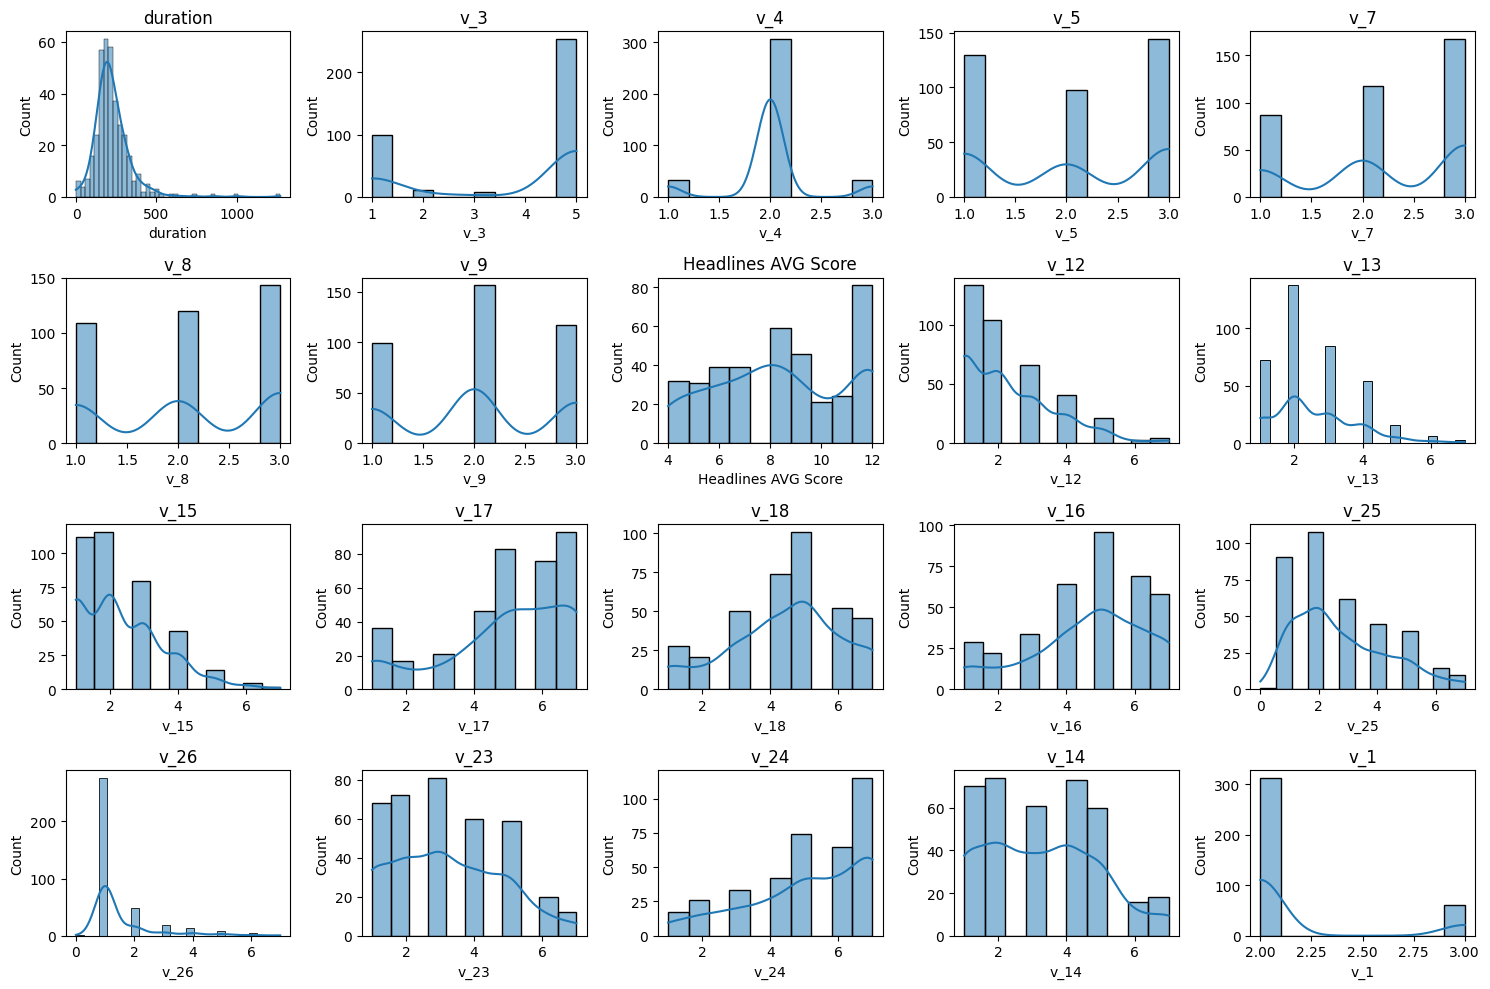

In [ ]:
# Load data
data = pd.read_csv('Survey DATA Thesis - Clickbaits questions groups (8).csv')

# Filter the DataFrame where v_1 equals 2,3
filtered_data = data[data['v_1'].isin([2, 3])]

print(filtered_data.describe())  # get descriptive statistics

# Visualizing the distribution of each numerical column in the filtered data
num_columns = filtered_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

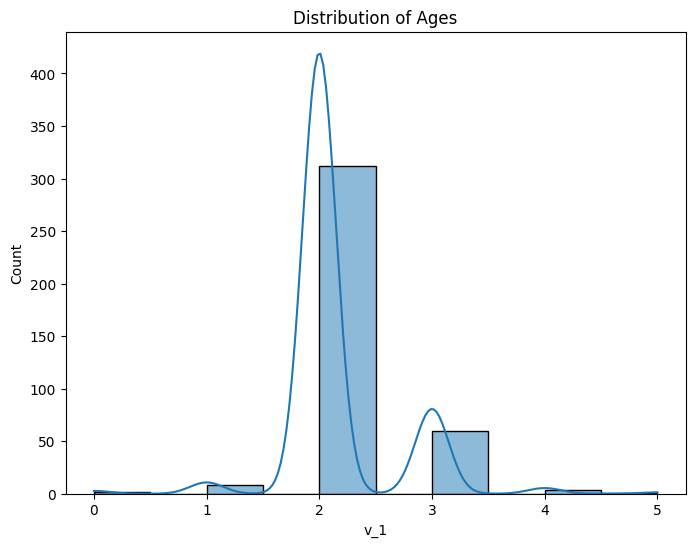

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['v_1'], kde=True)
plt.title('Distribution of Ages')
plt.show()


In [ ]:
# Select the column for comparison, e.g., 'v_1'
target_column = 'v_1'

# Iterate through all other columns and test correlations
for col in data.columns:
    if col != target_column:
        corr, p_value = pearsonr(data[target_column], data[col])

        # Check if absolute value of correlation is greater than 0.05
        if abs(corr) > 0.05:
            print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")


Correlation between v_1 and duration: Correlation coefficient = -0.1429703853650945, P-value = 0.004833125192276762
Correlation between v_1 and v_3: Correlation coefficient = -0.05617688141580063, P-value = 0.27027684236982435
Correlation between v_1 and v_5: Correlation coefficient = 0.056509216510560935, P-value = 0.26744853449931655
Correlation between v_1 and v_7: Correlation coefficient = 0.0521323105405521, P-value = 0.30633549617882194
Correlation between v_1 and v_8: Correlation coefficient = 0.05757019835561442, P-value = 0.2585550966142317
Correlation between v_1 and v_9: Correlation coefficient = 0.13378501097264509, P-value = 0.008408681148856038
Correlation between v_1 and Headlines AVG Score: Correlation coefficient = 0.09081747138716531, P-value = 0.07434246033309615
Correlation between v_1 and v_12: Correlation coefficient = -0.07684384703072593, P-value = 0.1312889607304774
Correlation between v_1 and v_15: Correlation coefficient = 0.06490327056302897, P-value = 0.202

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
from tabulate import tabulate

# Assuming 'data' is a pandas DataFrame with your data.

# Select the column for comparison, e.g., 'v_1'
target_column = 'v_1'

# Create a list to store our table rows
table = []

# Define ANSI escape sequence for bold text
BOLD = "\033[1m"
RESET = "\033[0m"

# Add the header row with bold
header = [f"{BOLD}Variable 1{RESET}", f"{BOLD}Variable 2{RESET}",
          f"{BOLD}Correlation coefficient{RESET}", f"{BOLD}Correlation coefficient P-Value{RESET}",
          f"{BOLD}Chi-square P-Value{RESET}"]
table.append(header)

# Iterate through all other columns and test correlations
for col in data.columns:
    if col == target_column:
        continue  # skip the comparison with itself

    # Pearson's correlation
    corr, p_corr_value = pearsonr(data[target_column], data[col])

    # Chi-square test - this assumes that the data is categorical!
    # Note that if the variables are not categorical, this test may not be appropriate
    contingency_table = pd.crosstab(data[target_column], data[col])
    chi2_stat, p_chi_value, dof, ex = chi2_contingency(contingency_table)

    # Append the results to the table list
    table.append([target_column, col, f"{corr:.3f}", f"{p_corr_value:.3f}", f"{p_chi_value:.3f}"])

# Print the table with centered text and bold headers
print(tabulate(table, headers="firstrow", tablefmt="grid", colalign=("center",)*5))


+--------------+---------------------+---------------------------+-----------------------------------+----------------------+
|  Variable 1  |     Variable 2      |  Correlation coefficient  |  Correlation coefficient P-Value  |  Chi-square P-Value  |
+==============+=====================+===========================+===================================+======================+
|     v_1      |      duration       |          -0.143           |               0.005               |        0.001         |
+--------------+---------------------+---------------------------+-----------------------------------+----------------------+
|     v_1      |         v_3         |          -0.056           |               0.27                |          0           |
+--------------+---------------------+---------------------------+-----------------------------------+----------------------+
|     v_1      |         v_4         |           0.01            |               0.837               |        0.427   

**AGE 18-24**

          duration         v_3         v_4         v_5         v_7  \
count   312.000000  312.000000  312.000000  312.000000  312.000000   
mean    226.464744    3.862179    1.996795    2.006410    2.201923   
std     110.039596    1.768857    0.420522    0.867393    0.806483   
min      -1.000000    1.000000    1.000000    1.000000    1.000000   
25%     163.000000    1.000000    2.000000    1.000000    2.000000   
50%     206.000000    5.000000    2.000000    2.000000    2.000000   
75%     266.250000    5.000000    2.000000    3.000000    3.000000   
max    1004.000000    5.000000    3.000000    3.000000    3.000000   

              v_8         v_9  Headlines AVG Score        v_12        v_13  \
count  312.000000  312.000000           312.000000  312.000000  312.000000   
mean     2.067308    2.016026             8.291667    2.342949    2.583333   
std      0.824829    0.758489             2.639338    1.325370    1.255001   
min      1.000000    1.000000             4.000000    1.0

ValueError: ignored

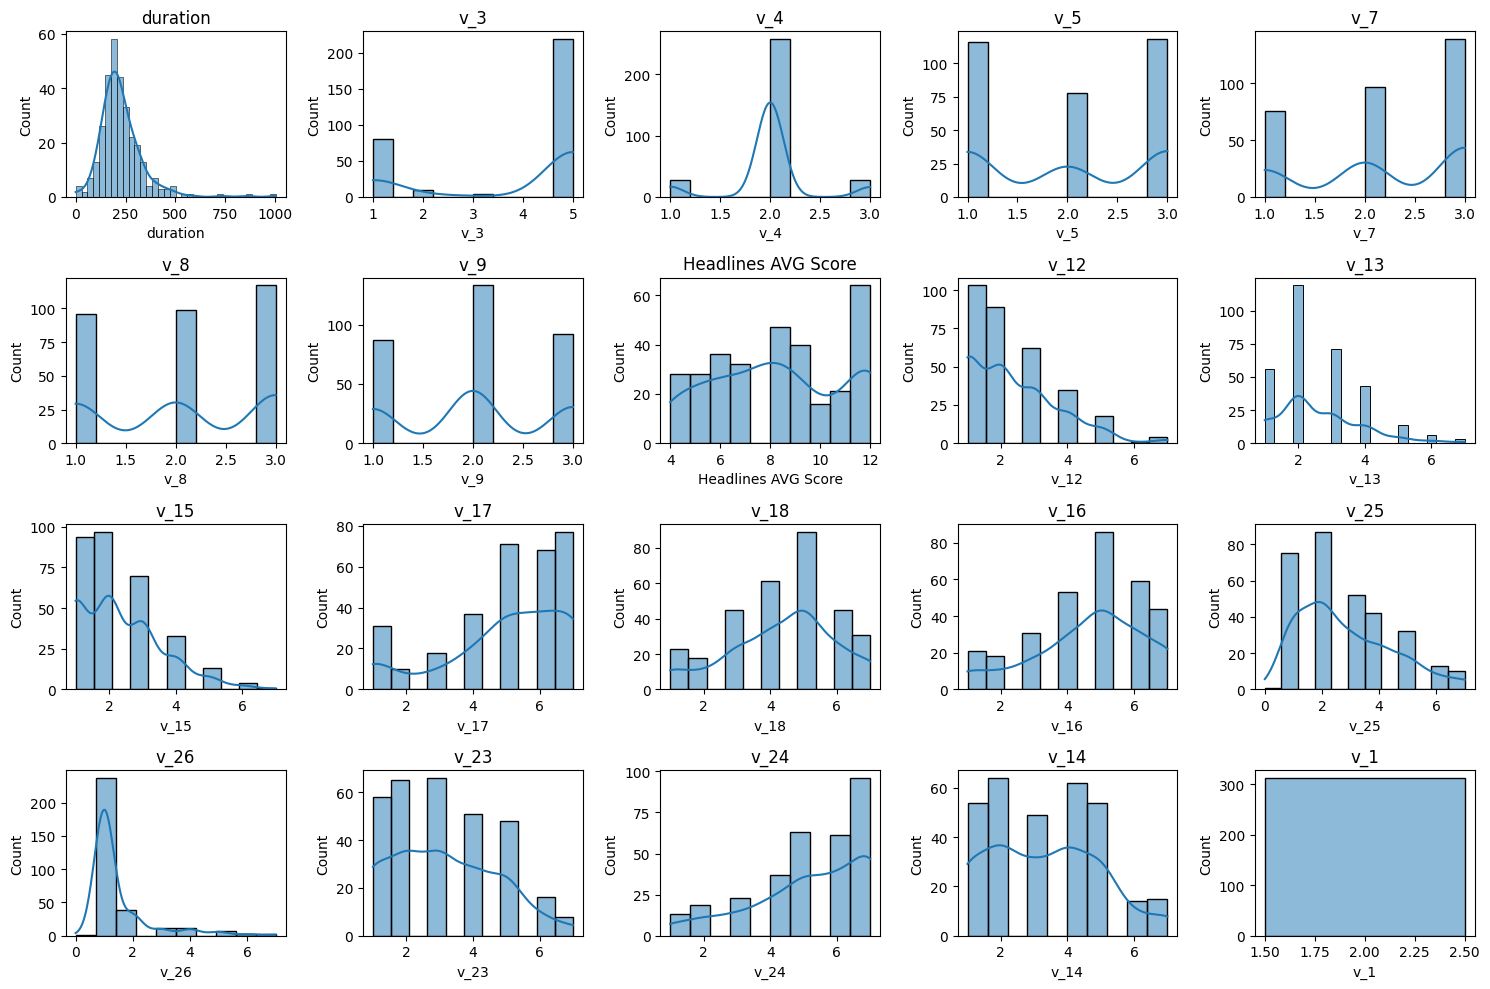

In [ ]:
# Load data
data = pd.read_csv('Survey DATA Thesis - Clickbaits questions groups (8).csv')

filtered_data = data[data['v_1'] == 2]

print(filtered_data.describe())  # get descriptive statistics

# Visualizing the distribution of each numerical column in the filtered data
num_columns = filtered_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
# Get descriptive statistics
filtered_data = data[data['v_1'] == 2]
desc_stats = filtered_data.describe()

# Determine the split point (halfway through the columns)
split_point = len(desc_stats.columns) // 2

# Split the descriptive statistics into two DataFrames
first_half_stats = desc_stats.iloc[:, :split_point]
second_half_stats = desc_stats.iloc[:, split_point:]

# Print the title for the table
print("Descriptive Statistics - Part 1")
# Print the first part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(first_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))

# Add spacing between tables for readability
print("\n" + "-"*50 + "\n")

# Print the title for the second part of the table
print("Descriptive Statistics - Part 2")
# Print the second part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(second_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))


Descriptive Statistics - Part 1
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
|       |   duration |     v_3 |     v_4 |     v_5 |     v_7 |     v_8 |     v_9 |   Headlines SUM Score |    v_12 |    v_13 |
+=======+============+=========+=========+=========+=========+=========+=========+=======================+=========+=========+
| count |    312.000 | 312.000 | 312.000 | 312.000 | 312.000 | 312.000 | 312.000 |               312.000 | 312.000 | 312.000 |
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
| mean  |    226.465 |   3.862 |   1.997 |   2.006 |   2.202 |   2.067 |   2.016 |                 8.292 |   2.343 |   2.583 |
+-------+------------+---------+---------+---------+---------+---------+---------+-----------------------+---------+---------+
| std   |    110.040 |   1.769 |   0.421 |   0.867 |   0.806 |   0.825 |   0.75

In [ ]:
# Assuming 'data' is your DataFrame and 'v_1' is the column of interest
value_counts = filtered_data['v_2'].value_counts()

# Filter to get only the counts of 1, 2, 3, 4, and 5
selected_counts = value_counts.loc[value_counts.index.isin([1, 2, 3])]

# Calculate percentages
total = filtered_data['v_2'].count()
percentages = (selected_counts / total) * 100

# Combine counts and percentages
combined = pd.DataFrame({
    'Counts': selected_counts,
    'Percentages': percentages
})

print(combined)

   Counts  Percentages
2     191    61.217949
1     113    36.217949
3       8     2.564103


**AGE 25-34**

          duration        v_3        v_4        v_5        v_7        v_8  \
count    60.000000  60.000000  60.000000  60.000000  60.000000  60.000000   
mean    227.600000   3.433333   2.016667   2.200000   2.283333   2.216667   
std     175.709911   1.871885   0.431461   0.798303   0.761169   0.783120   
min      -1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
25%     156.750000   1.000000   2.000000   2.000000   2.000000   2.000000   
50%     198.000000   5.000000   2.000000   2.000000   2.000000   2.000000   
75%     262.250000   5.000000   2.000000   3.000000   3.000000   3.000000   
max    1272.000000   5.000000   3.000000   3.000000   3.000000   3.000000   

             v_9  Headlines AVG Score       v_12       v_13  ...       v_17  \
count  60.000000            60.000000  60.000000  60.000000  ...  60.000000   
mean    2.216667             8.916667   2.050000   2.416667  ...   4.733333   
std     0.761169             2.553108   1.407305   1.168683  ...   1.

ValueError: ignored

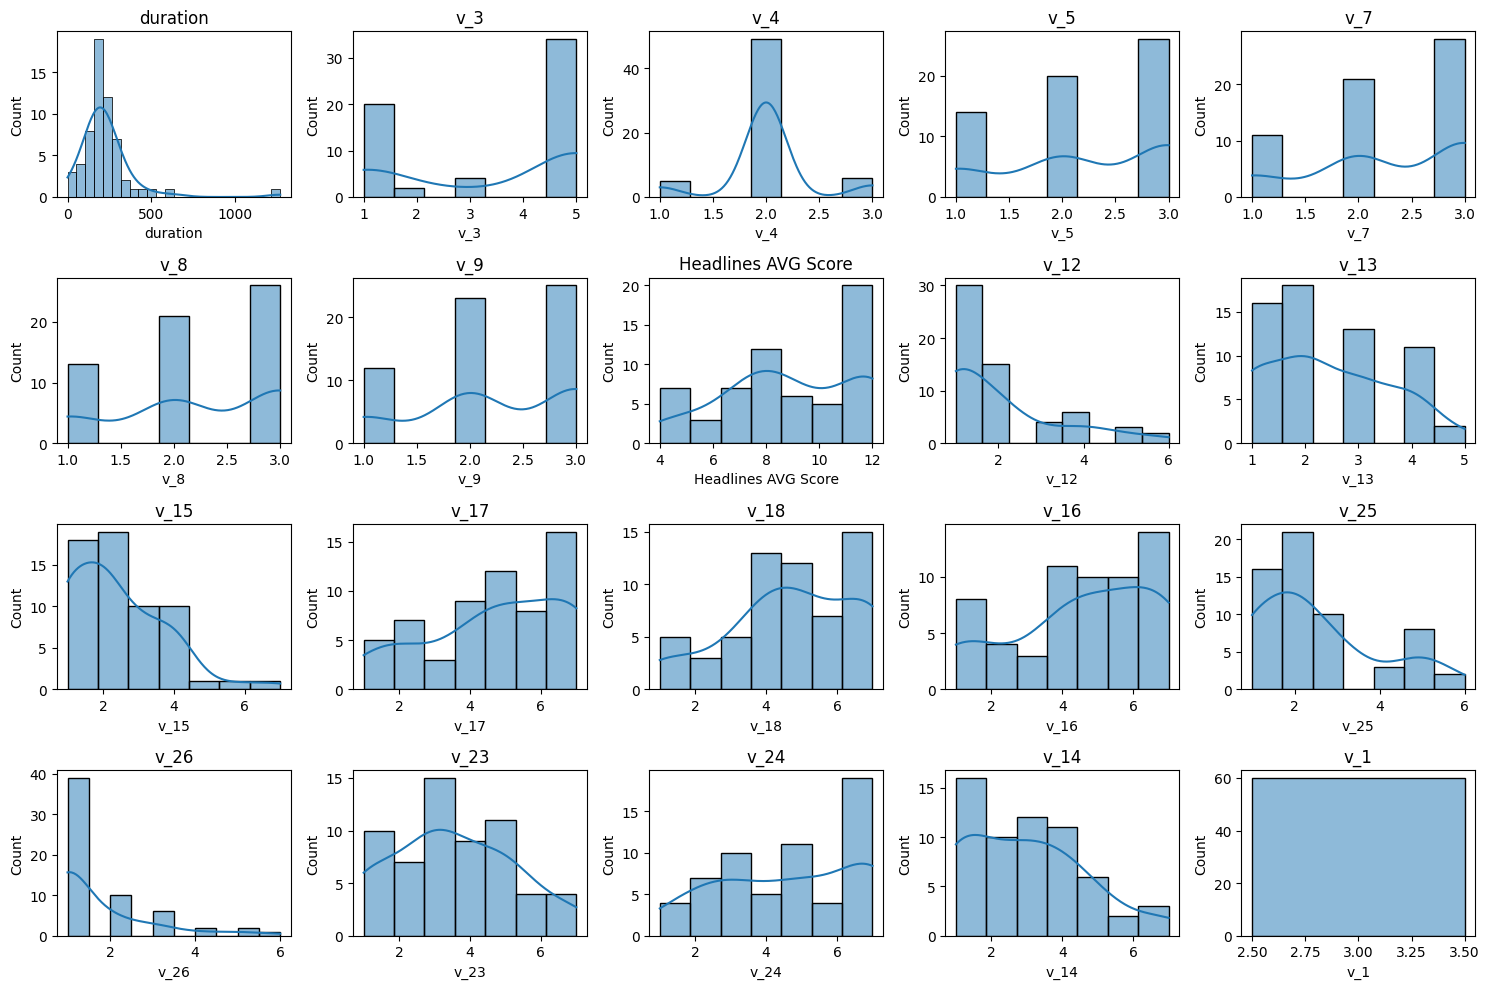

In [ ]:
# Load data
data = pd.read_csv('Survey DATA Thesis - Clickbaits questions groups (8).csv')

filtered_data = data[data['v_1'] == 3]

print(filtered_data.describe())  # get descriptive statistics

# Visualizing the distribution of each numerical column in the filtered data
num_columns = filtered_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
# Get descriptive statistics
filtered_data = data[data['v_1'] == 3]
desc_stats = filtered_data.describe()

# Determine the split point (halfway through the columns)
split_point = len(desc_stats.columns) // 2

# Split the descriptive statistics into two DataFrames
first_half_stats = desc_stats.iloc[:, :split_point]
second_half_stats = desc_stats.iloc[:, split_point:]

# Print the title for the table
print("Descriptive Statistics - Part 1")
# Print the first part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(first_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))

# Add spacing between tables for readability
print("\n" + "-"*50 + "\n")

# Print the title for the second part of the table
print("Descriptive Statistics - Part 2")
# Print the second part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(second_half_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))


Descriptive Statistics - Part 1
+-------+------------+--------+--------+--------+--------+--------+--------+-----------------------+--------+--------+
|       |   duration |    v_3 |    v_4 |    v_5 |    v_7 |    v_8 |    v_9 |   Headlines SUM Score |   v_12 |   v_13 |
+=======+============+========+========+========+========+========+========+=======================+========+========+
| count |     60.000 | 60.000 | 60.000 | 60.000 | 60.000 | 60.000 | 60.000 |                60.000 | 60.000 | 60.000 |
+-------+------------+--------+--------+--------+--------+--------+--------+-----------------------+--------+--------+
| mean  |    227.600 |  3.433 |  2.017 |  2.200 |  2.283 |  2.217 |  2.217 |                 8.917 |  2.050 |  2.417 |
+-------+------------+--------+--------+--------+--------+--------+--------+-----------------------+--------+--------+
| std   |    175.710 |  1.872 |  0.431 |  0.798 |  0.761 |  0.783 |  0.761 |                 2.553 |  1.407 |  1.169 |
+-------+-------

In [ ]:
# Assuming 'data' is your DataFrame and 'v_1' is the column of interest
value_counts = filtered_data['v_2'].value_counts()

# Filter to get only the counts of 1, 2, 3, 4, and 5
selected_counts = value_counts.loc[value_counts.index.isin([1, 2, 3])]

# Calculate percentages
total = filtered_data['v_2'].count()
percentages = (selected_counts / total) * 100

# Combine counts and percentages
combined = pd.DataFrame({
    'Counts': selected_counts,
    'Percentages': percentages
})

print(combined)

   Counts  Percentages
2      32    53.333333
1      26    43.333333
3       2     3.333333


# **Chi-square statistic Testing between ages 18-24 and 25-34**

Age and Wie sehr lässt eine Werbeschlagzeile an der Qualität eines Spiels oder dem Vertrauen seines Entwicklers zweifeln?

In [ ]:
# Filter the DataFrame to include only rows where v_1 has values 2 or 3
df_filtered = data[data['v_1'].isin([2, 3])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_1'], df_filtered['v_18'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between ages (2 and 3) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 12.47191429068478, P-value: 0.05223198436883973
Expected frequencies, if there is no relationship between ages (2 and 3) and response:
 [[23.48387097 17.61290323 41.93548387 62.06451613 84.70967742 43.61290323
  38.58064516]
 [ 4.51612903  3.38709677  8.06451613 11.93548387 16.29032258  8.38709677
   7.41935484]]

Observed frequencies:
v_18   1   2   3   4   5   6   7
v_1                             
2     23  18  45  61  89  45  31
3      5   3   5  13  12   7  15


Age and Wie gut können Sie Ihrer Meinung nach Clickbait-Schlagzeilen von allgemeinen Schlagzeilen in Anzeigen unterscheiden?

In [ ]:
# Filter the DataFrame to include only rows where v_1 has values 2 or 3
df_filtered = data[data['v_1'].isin([2, 3])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_1'], df_filtered['v_16'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between ages (2 and 3) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 9.479401433011898, P-value: 0.14835741528748034
Expected frequencies, if there is no relationship between ages (2 and 3) and response:
 [[24.32258065 18.4516129  28.51612903 53.67741935 80.51612903 57.87096774
  48.64516129]
 [ 4.67741935  3.5483871   5.48387097 10.32258065 15.48387097 11.12903226
   9.35483871]]

Observed frequencies:
v_16   1   2   3   4   5   6   7
v_1                             
2     21  18  31  53  86  59  44
3      8   4   3  11  10  10  14


Age and Wie oft spielen Sie bei Spielen um Geld oder schließen Wetten ab?

In [ ]:
# Filter the DataFrame to include only rows where v_1 has values 2 or 3
df_filtered = data[data['v_1'].isin([2, 3])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_1'], df_filtered['v_26'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between ages (2 and 3) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 6.630473270690662, P-value: 0.4683408450225023
Expected frequencies, if there is no relationship between ages (2 and 3) and response:
 [[8.38709677e-01 2.31483871e+02 4.02580645e+01 1.50967742e+01
  1.17419355e+01 7.54838710e+00 3.35483871e+00 1.67741935e+00]
 [1.61290323e-01 4.45161290e+01 7.74193548e+00 2.90322581e+00
  2.25806452e+00 1.45161290e+00 6.45161290e-01 3.22580645e-01]]

Observed frequencies:
v_26  0    1   2   3   4  5  6  7
v_1                              
2     1  237  38  12  12  7  3  2
3     0   39  10   6   2  2  1  0


Age and Wie risikofreudig würden Sie sich selbst einschätzen?

In [ ]:
# Filter the DataFrame to include only rows where v_1 has values 2 or 3
df_filtered = data[data['v_1'].isin([2, 3])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_1'], df_filtered['v_23'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between ages (2 and 3) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 5.808010519722883, P-value: 0.4450370673116687
Expected frequencies, if there is no relationship between ages (2 and 3) and response:
 [[57.03225806 60.38709677 67.93548387 50.32258065 49.48387097 16.77419355
  10.06451613]
 [10.96774194 11.61290323 13.06451613  9.67741935  9.51612903  3.22580645
   1.93548387]]

Observed frequencies:
v_23   1   2   3   4   5   6  7
v_1                            
2     58  65  66  51  48  16  8
3     10   7  15   9  11   4  4


Age and Wie sehr würden Sie sich aufregen, wenn Sie einen Teil Ihres Geldes verlieren würden?

In [ ]:
# Filter the DataFrame to include only rows where v_1 has values 2 or 3
df_filtered = data[data['v_1'].isin([2, 3])]

# Create a contingency table with the filtered data
contingency_table = pd.crosstab(df_filtered['v_1'], df_filtered['v_24'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")
print("Expected frequencies, if there is no relationship between ages (2 and 3) and response:\n", expected)

# Print the observed frequency table
print("\nObserved frequencies:")
print(contingency_table)


Chi-square statistic: 13.264261948773065, P-value: 0.03902619819332619
Expected frequencies, if there is no relationship between ages (2 and 3) and response:
 [[14.25806452 21.80645161 27.67741935 35.22580645 62.06451613 54.51612903
  96.4516129 ]
 [ 2.74193548  4.19354839  5.32258065  6.77419355 11.93548387 10.48387097
  18.5483871 ]]

Observed frequencies:
v_24   1   2   3   4   5   6   7
v_1                             
2     13  19  23  37  63  61  96
3      4   7  10   5  11   4  19


# Machine Learning

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Checking for missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(scaled_data)

# Check the shape of the processed data
imputed_data.shape


(387, 21)

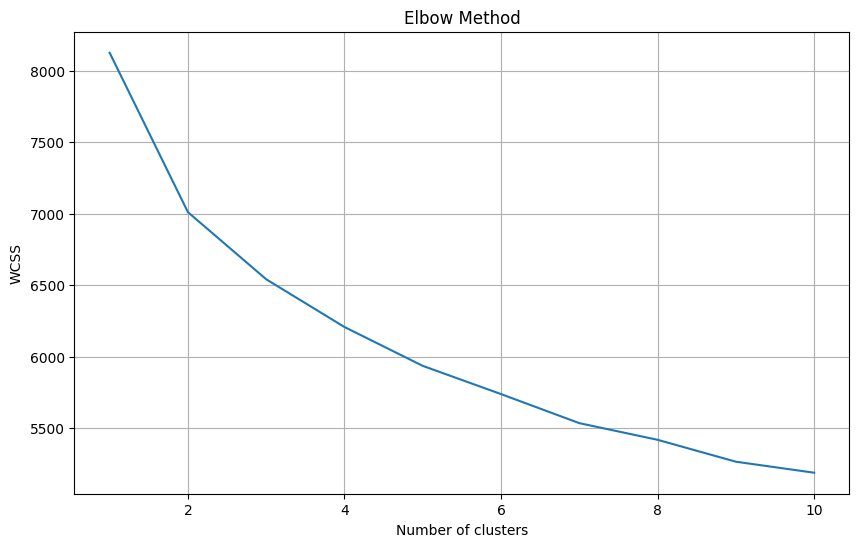

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(imputed_data)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid(True)
plt.show()


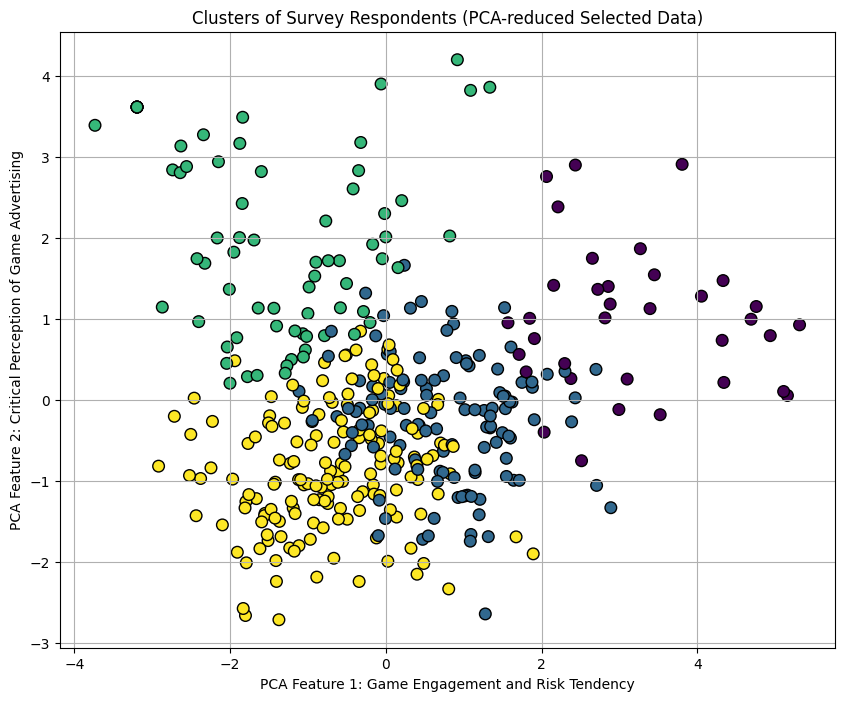

In [ ]:
from sklearn.decomposition import PCA


# Selecting the specific columns as mentioned
selected_columns = [
    "v_12",
    "v_13",
    "v_15",
    "v_17",
    "v_18",
    "v_16",
    "v_25",
    "v_26",
    "v_23",
    "v_24",
    "v_14",
]
selected_data = data[selected_columns]

# Scaling the selected data
scaler = StandardScaler()
scaled_selected_data = scaler.fit_transform(selected_data)

# Imputing any missing values in the selected columns
imputer = SimpleImputer(strategy='mean')
imputed_selected_data = imputer.fit_transform(scaled_selected_data)

# Performing k-means clustering on the selected data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels_selected = kmeans.fit_predict(imputed_selected_data)

# Reducing the selected data to two dimensions using PCA for visualization
pca_selected = PCA(n_components=2)
reduced_selected_data = pca_selected.fit_transform(imputed_selected_data)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(reduced_selected_data[:, 0], reduced_selected_data[:, 1], c=cluster_labels_selected, cmap='viridis', marker='o', edgecolor='k', s=70)
plt.title('Clusters of Survey Respondents (PCA-reduced Selected Data)')
plt.xlabel('PCA Feature 1: Game Engagement and Risk Tendency')
plt.ylabel('PCA Feature 2: Critical Perception of Game Advertising')
plt.grid(True)
plt.show()


Named cluster counts:
 Disengaged and Noncritical Gamers    121
Disengaged but Critical Gamers       162
Engaged and Uncritical Gamers         35
Engaged but Skeptical Gamers          69
dtype: int64
Named cluster percentages:
 Disengaged and Noncritical Gamers    31.266150
Disengaged but Critical Gamers       41.860465
Engaged and Uncritical Gamers         9.043928
Engaged but Skeptical Gamers         17.829457
dtype: float64


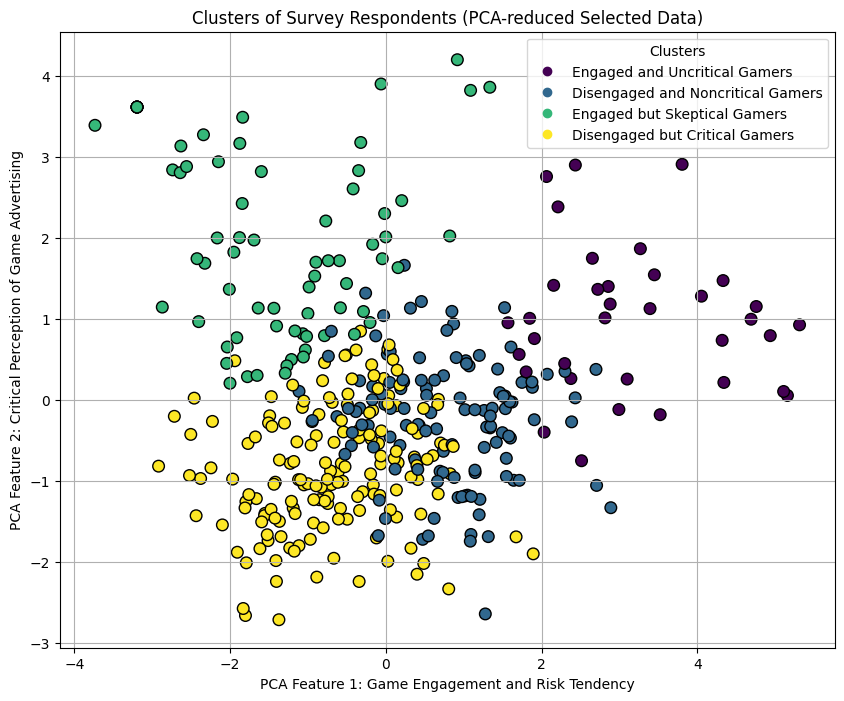

In [ ]:
# Selecting the specific columns as mentioned
selected_columns = [
    "v_12", "v_13", "v_15", "v_17", "v_18", "v_16", "v_25", "v_26", "v_23", "v_24", "v_14",
    # Add any other columns you need here
]
selected_data = data[selected_columns]

# Scaling the selected data
scaler = StandardScaler()
scaled_selected_data = scaler.fit_transform(selected_data)

# Imputing any missing values in the selected columns
imputer = SimpleImputer(strategy='mean')
imputed_selected_data = imputer.fit_transform(scaled_selected_data)

# Performing k-means clustering on the selected data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels_selected = kmeans.fit_predict(imputed_selected_data)

# Cluster names based on their characteristics
cluster_names = {
    0: "Engaged and Uncritical Gamers",
    1: "Disengaged and Noncritical Gamers",
    2: "Engaged but Skeptical Gamers",
    3: "Disengaged but Critical Gamers"
}

# Mapping the cluster numbers to the names
cluster_labels_named = pd.Series(cluster_labels_selected).map(cluster_names)

# Calculating the counts and percentages for each named cluster
named_cluster_counts = cluster_labels_named.value_counts().sort_index()
named_cluster_percentages = named_cluster_counts / len(cluster_labels_named) * 100
print("Named cluster counts:\n", named_cluster_counts)
print("Named cluster percentages:\n", named_cluster_percentages)

# Reducing the selected data to two dimensions using PCA for visualization
pca_selected = PCA(n_components=2)
reduced_selected_data = pca_selected.fit_transform(imputed_selected_data)

# Plotting the results with named clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_selected_data[:, 0], reduced_selected_data[:, 1], c=cluster_labels_selected, cmap='viridis', marker='o', edgecolor='k', s=70)

# Create a legend with the named clusters
plt.legend(handles=scatter.legend_elements()[0], labels=list(cluster_names.values()), title="Clusters")
plt.title('Clusters of Survey Respondents (PCA-reduced Selected Data)')
plt.xlabel('PCA Feature 1: Game Engagement and Risk Tendency')
plt.ylabel('PCA Feature 2: Critical Perception of Game Advertising')
plt.grid(True)
plt.show()


In [ ]:
# Computing the PCA loadings (component weights) for the first two components
pca_loadings = pd.DataFrame(pca_selected.components_.T, index=selected_columns, columns=['PCA Feature 1', 'PCA Feature 2'])

# Display the loadings to understand the contribution of each original feature
pca_loadings


PCA Feature 1  PCA Feature 2
v_12       0.443425       0.029680
v_13       0.410724      -0.019613
v_15       0.420450       0.070295
v_17       0.159402      -0.506488
v_18       0.046364      -0.599362
v_16       0.104258      -0.508675
v_25       0.330160       0.048072
v_26       0.376219       0.219592
v_23       0.263471       0.032139
v_24      -0.055915      -0.259629
v_14       0.310457       0.017477


PCA Feature 1 Interpretation
High Loadings: The questions with the highest loadings on PCA Feature 1 are related to the respondents' engagement with games after clicking on advertisements, the fulfillment of game content as promised by headlines, beliefs about the reliability of game advertising with sensational headlines, frequency of gambling or betting in games, and overall risk-taking tendencies.
Low Loadings: Some questions, like those about gender or the reactions to financial loss, show lower or even negative loadings, suggesting less influence on this component.
Given these loadings, we can interpret PCA Feature 1 as representing a dimension related to the active engagement and interaction with games and game advertising. This component might capture aspects like:

High PCA Feature 1 Values: Indicating respondents who are more actively engaged with games, more likely to follow through on game ads, and potentially more open to or influenced by game advertising. This group might also exhibit higher tendencies towards risk-taking within gaming or betting contexts.
Low PCA Feature 1 Values: Suggesting respondents who are less engaged in these activities, perhaps more cautious or critical about following through on game advertisements, and possibly less inclined towards gambling or risk-taking in gaming.



PCA Feature 2
The highest loadings here are negative and come from questions about the importance of transparency and authenticity in game advertising, skepticism towards the quality of a game based on its headline, and the ability to differentiate clickbait headlines from general ones.
Thus, PCA Feature 2 appears to capture skepticism and critical attitudes towards game advertising and their headlines. High values in this component might represent respondents who place great importance on authenticity and are more discerning or skeptical about advertising claims.
Interpretation
High PCA Feature 2 Values: Likely represent respondents who are critical, skeptical, and value transparency in game advertising. They might be less susceptible to clickbait and more discerning about the quality and authenticity of what's advertised.
Low PCA Feature 2 Values: Might indicate respondents who are less concerned with these aspects or perhaps more accepting of or influenced by game advertising and its sensational headlines.


**CLUSTERS NAMES**

Cluster 1: "Engaged and Uncritical Gamers"

This cluster might consist of respondents who score high in "Game Engagement and Risk Tendency" but lower in "Critical Perception of Game Advertising". These are likely individuals who are actively engaged with gaming and susceptible to game advertising, without being overly critical or skeptical of the advertising content.
Cluster 2: "Disengaged and Noncritical Gamers"

Respondents in this cluster could be characterized by low scores in both "Game Engagement and Risk Tendency" and "Critical Perception of Game Advertising". These individuals might not be particularly engaged with gaming or influenced by game advertising, and they are also less critical or discerning about the authenticity and claims of such advertising.
Cluster 3: "Engaged but Skeptical Gamers"

These respondents could be high in both "Game Engagement and Risk Tendency" and "Critical Perception of Game Advertising". They are likely engaged and responsive to gaming and its advertising but maintain a critical, discerning view towards the advertising content, seeking authenticity and transparency.
Cluster 4: "Disengaged but Critical Gamers"

This group might show low engagement and risk-taking tendencies (low in "Game Engagement and Risk Tendency") but high critical and discerning attitudes towards game advertising (high in "Critical Perception of Game Advertising"). They are less likely to be influenced by game advertising due to their skepticism and demand for authenticity.


# **Kaggle Data Analysis**


All clikcbaits and not clikcbaits

In [ ]:
# Read the CSV file
data_kaggle = pd.read_csv('Clickbait Data Thesis - Cleaned Data.csv')
data_kaggle.head()

Video Title     Views    Likes  Dislikes  \
0        10 People You Don't Want To Mess With    484411     3881       191   
1                      I Got Hunted By The FBI  42724724  2005151     24646   
2  10 Real Life Giants You Won't Believe Exist   3674544    12116      1570   
3  10 Real Life Giants You Won't Believe Exist   6890718    15222      2858   
4  10 Mythical CREATURES That Actually Existed   2089601    46750      1954   

   Clickbait 1/ Not-Clickbait 0  
0                             1  
1                             1  
2                             1  
3                             1  
4                             1

              Views       Likes   Dislikes  Clickbait 1/ Not-Clickbait 0
count       201.000     201.000    201.000                       201.000
mean    9596956.557  211219.493  13786.338                         0.502
std    26209805.126  493767.993  39255.944                         0.501
min        3150.000      57.000     15.000                         0.000
25%      389431.000   15702.000    425.000                         0.000
50%     1427958.000   56814.000   1570.000                         1.000
75%     7586094.000  134932.000   9096.000                         1.000
max   282758915.000 3438692.000 321574.000                         1.000


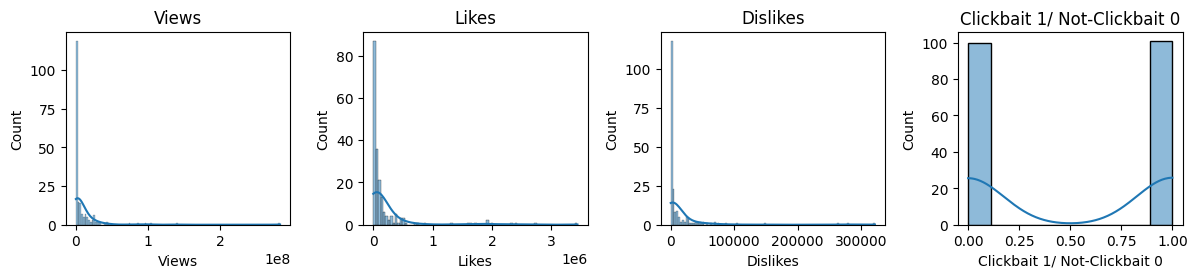

In [ ]:
# Read the CSV file
data_kaggle = pd.read_csv('Clickbait Data Thesis - Cleaned Data.csv')

# Set display format to non-scientific for floats
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Print descriptive statistics
print(data_kaggle.describe())  # Get descriptive statistics

# Visualizing the distribution of each numerical column
num_columns = data_kaggle.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data_kaggle[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()


In [ ]:
# Get descriptive statistics
desc_stats = data_kaggle.describe()


# Print the title for the table
print("Descriptive Statistics")
# Print the first part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(desc_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))

Descriptive Statistics
+-------+---------------+-------------+------------+--------------------------------+
|       |         Views |       Likes |   Dislikes |   Clickbait 1/ Not-Clickbait 0 |
+=======+===============+=============+============+================================+
| count |       201.000 |     201.000 |    201.000 |                        201.000 |
+-------+---------------+-------------+------------+--------------------------------+
| mean  |   9596956.557 |  211219.493 |  13786.338 |                          0.502 |
+-------+---------------+-------------+------------+--------------------------------+
| std   |  26209805.126 |  493767.993 |  39255.944 |                          0.501 |
+-------+---------------+-------------+------------+--------------------------------+
| min   |      3150.000 |      57.000 |     15.000 |                          0.000 |
+-------+---------------+-------------+------------+--------------------------------+
| 25%   |    389431.000 |   157

             Views      Likes  Dislikes  Clickbait 1/ Not-Clickbait 0
count       201.00     201.00    201.00                        201.00
mean    9596956.56  211219.49  13786.34                          0.50
std    26209805.13  493767.99  39255.94                          0.50
min        3150.00      57.00     15.00                          0.00
25%      389431.00   15702.00    425.00                          0.00
50%     1427958.00   56814.00   1570.00                          1.00
75%     7586094.00  134932.00   9096.00                          1.00
max   282758915.00 3438692.00 321574.00                          1.00


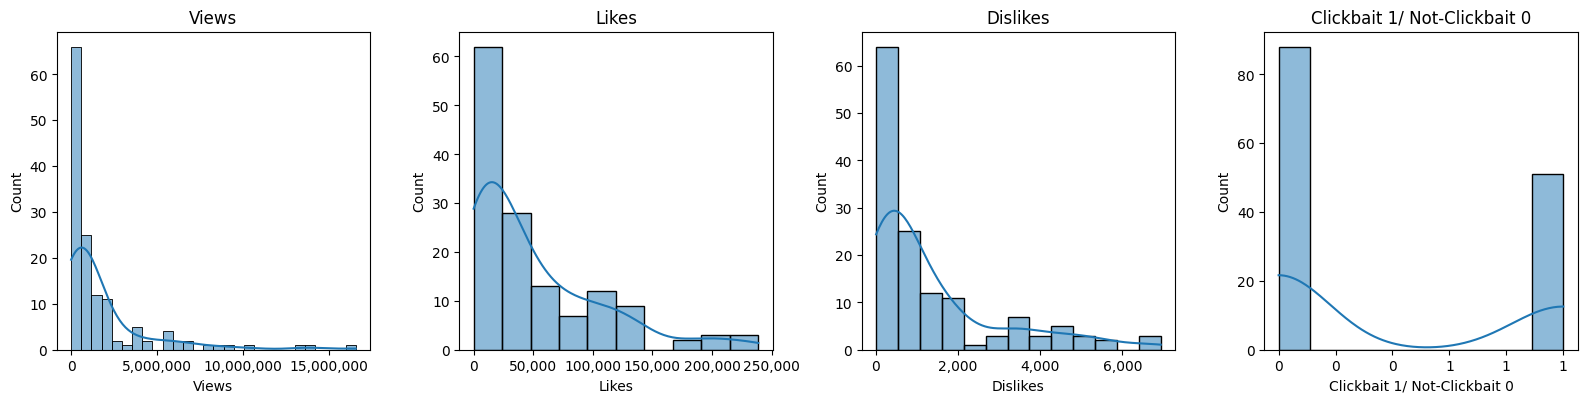

In [ ]:
# Set display format to non-scientific for floats
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Select numerical columns
num_columns = data_kaggle.select_dtypes(include=['int64', 'float64']).columns

print(data_kaggle.describe())

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Filter out outliers from each numerical column
filtered_data = data_kaggle.copy()
for col in num_columns:
    filtered_data = remove_outliers(filtered_data, col)

# Visualizing the distribution of each numerical column after removing outliers
# Increase the figsize here
plt.figure(figsize=(20, 15))  # Adjusted size
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.gca().get_xaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.tight_layout()

plt.show()


Just clickbaits

             Views      Likes  Dislikes  Clickbait 1/ Not-Clickbait 0
count       101.00     101.00    101.00                        101.00
mean   16411747.66  282742.94  25478.43                          1.00
std    35337516.95  610755.81  52826.98                          0.00
min        3150.00      57.00     15.00                          1.00
25%      297823.00   12034.00    546.00                          1.00
50%     5843805.00   64582.00   6932.00                          1.00
75%    17677110.00  190940.00  27456.00                          1.00
max   282758915.00 3438692.00 321574.00                          1.00


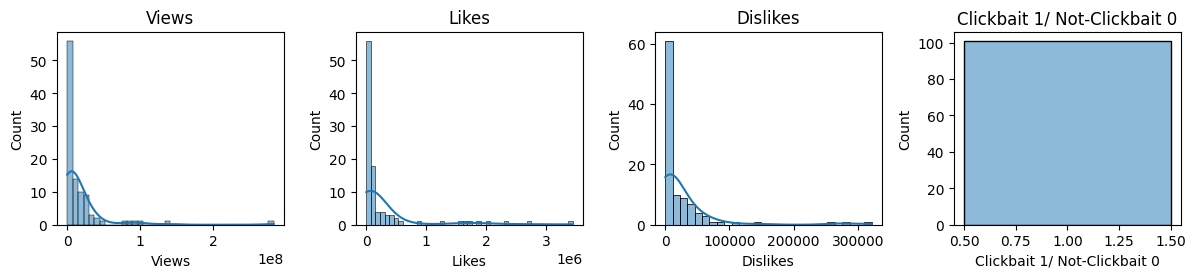

In [ ]:
# Load data

filtered_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]

print(filtered_data.describe())  # get descriptive statistics

# Visualizing the distribution of each numerical column in the filtered data
num_columns = filtered_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
# Get descriptive statistics
filtered_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]
desc_stats = filtered_data.describe()

# Print the title for the table
print("Clickbait Descriptive Statistics")
# Print the first part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(desc_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))

# Get descriptive statistics
filtered_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 0]
desc_stats = filtered_data.describe()

# Print the title for the table
print("Not Clickbait Descriptive Statistics")
# Print the first part of descriptive statistics with numbers formatted to three decimal places
print(tabulate(desc_stats, headers='keys', tablefmt='grid', floatfmt=".3f"))


Clickbait Descriptive Statistics
+-------+---------------+-------------+------------+--------------------------------+
|       |         Views |       Likes |   Dislikes |   Clickbait 1/ Not-Clickbait 0 |
+=======+===============+=============+============+================================+
| count |       101.000 |     101.000 |    101.000 |                        101.000 |
+-------+---------------+-------------+------------+--------------------------------+
| mean  |  16411747.663 |  282742.941 |  25478.426 |                          1.000 |
+-------+---------------+-------------+------------+--------------------------------+
| std   |  35337516.947 |  610755.812 |  52826.979 |                          0.000 |
+-------+---------------+-------------+------------+--------------------------------+
| min   |      3150.000 |      57.000 |     15.000 |                          1.000 |
+-------+---------------+-------------+------------+--------------------------------+
| 25%   |    297823.0

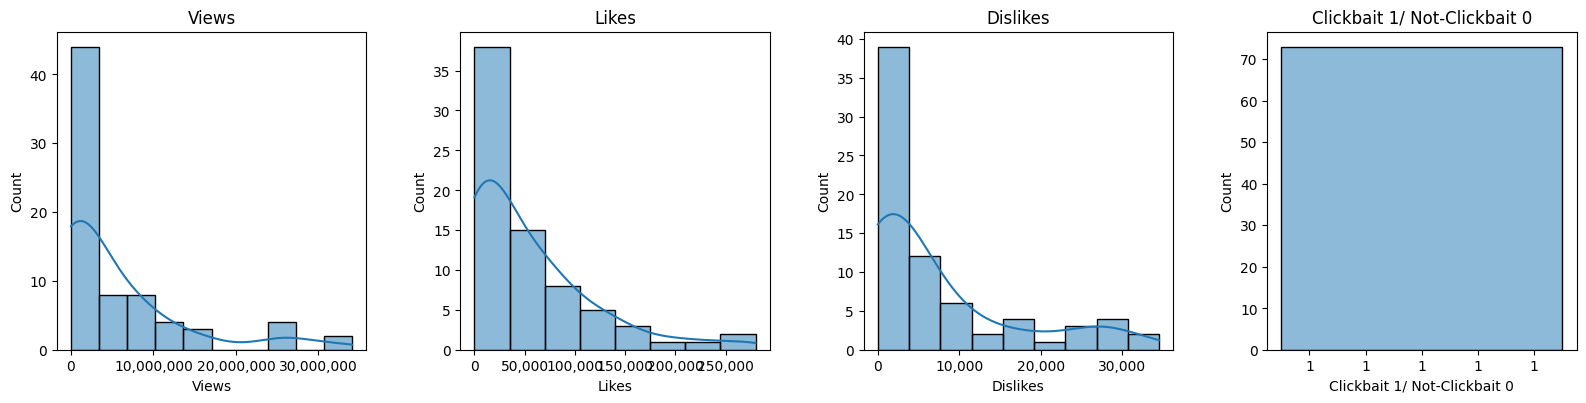

In [ ]:
# Filter to keep only rows where 'Clickbait 1/ Not-Clickbait 0' equals 1
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]

# Set display format to non-scientific for floats
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Select numerical columns
num_columns = clickbait_data.select_dtypes(include=['int64', 'float64']).columns

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Filter out outliers from each numerical column
filtered_data = clickbait_data.copy()
for col in num_columns:
    filtered_data = remove_outliers(filtered_data, col)

# Visualizing the distribution of each numerical column after removing outliers
plt.figure(figsize=(20, 15))  # Adjusted size
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.gca().get_xaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.tight_layout()

plt.show()


Not Clickbaits

            Views      Likes  Dislikes  Clickbait 1/ Not-Clickbait 0
count      100.00     100.00    100.00                        100.00
mean   2714017.54  138980.81   1977.33                          0.00
std    5585607.80  324435.51   3739.49                          0.00
min     139105.00    1084.00     56.00                          0.00
25%     389679.25   18484.25    285.25                          0.00
50%    1005948.50   42128.00    791.00                          0.00
75%    2079156.75  109052.75   1805.50                          0.00
max   40712459.00 2390269.00  24583.00                          0.00


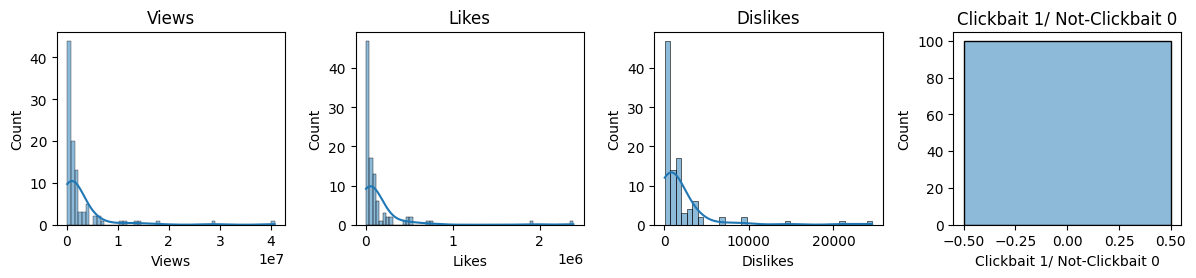

In [ ]:
# Load data

filtered_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 0]

print(filtered_data.describe())  # get descriptive statistics

# Visualizing the distribution of each numerical column in the filtered data
num_columns = filtered_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

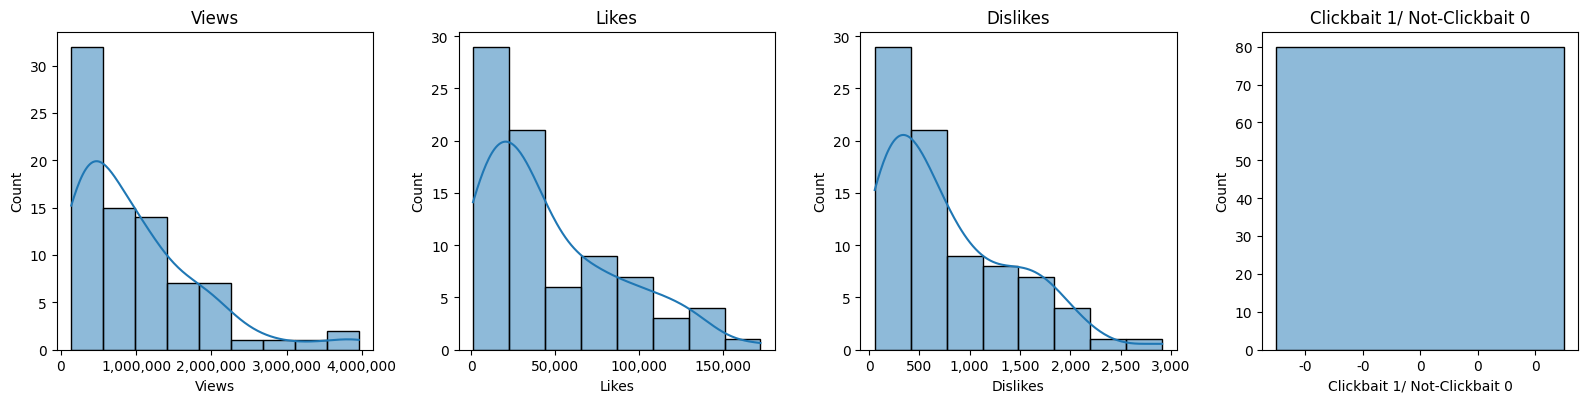

In [ ]:
# Filter to keep only rows where 'Clickbait 1/ Not-Clickbait 0' equals 0
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 0]

# Set display format to non-scientific for floats
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Select numerical columns
num_columns = clickbait_data.select_dtypes(include=['int64', 'float64']).columns

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Filter out outliers from each numerical column
filtered_data = clickbait_data.copy()
for col in num_columns:
    filtered_data = remove_outliers(filtered_data, col)

# Visualizing the distribution of each numerical column after removing outliers
plt.figure(figsize=(20, 15))  # Adjusted size
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
    plt.gca().get_xaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.tight_layout()

plt.show()


all data

<ipython-input-9-bc755e3d4260>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_kaggle.corr()


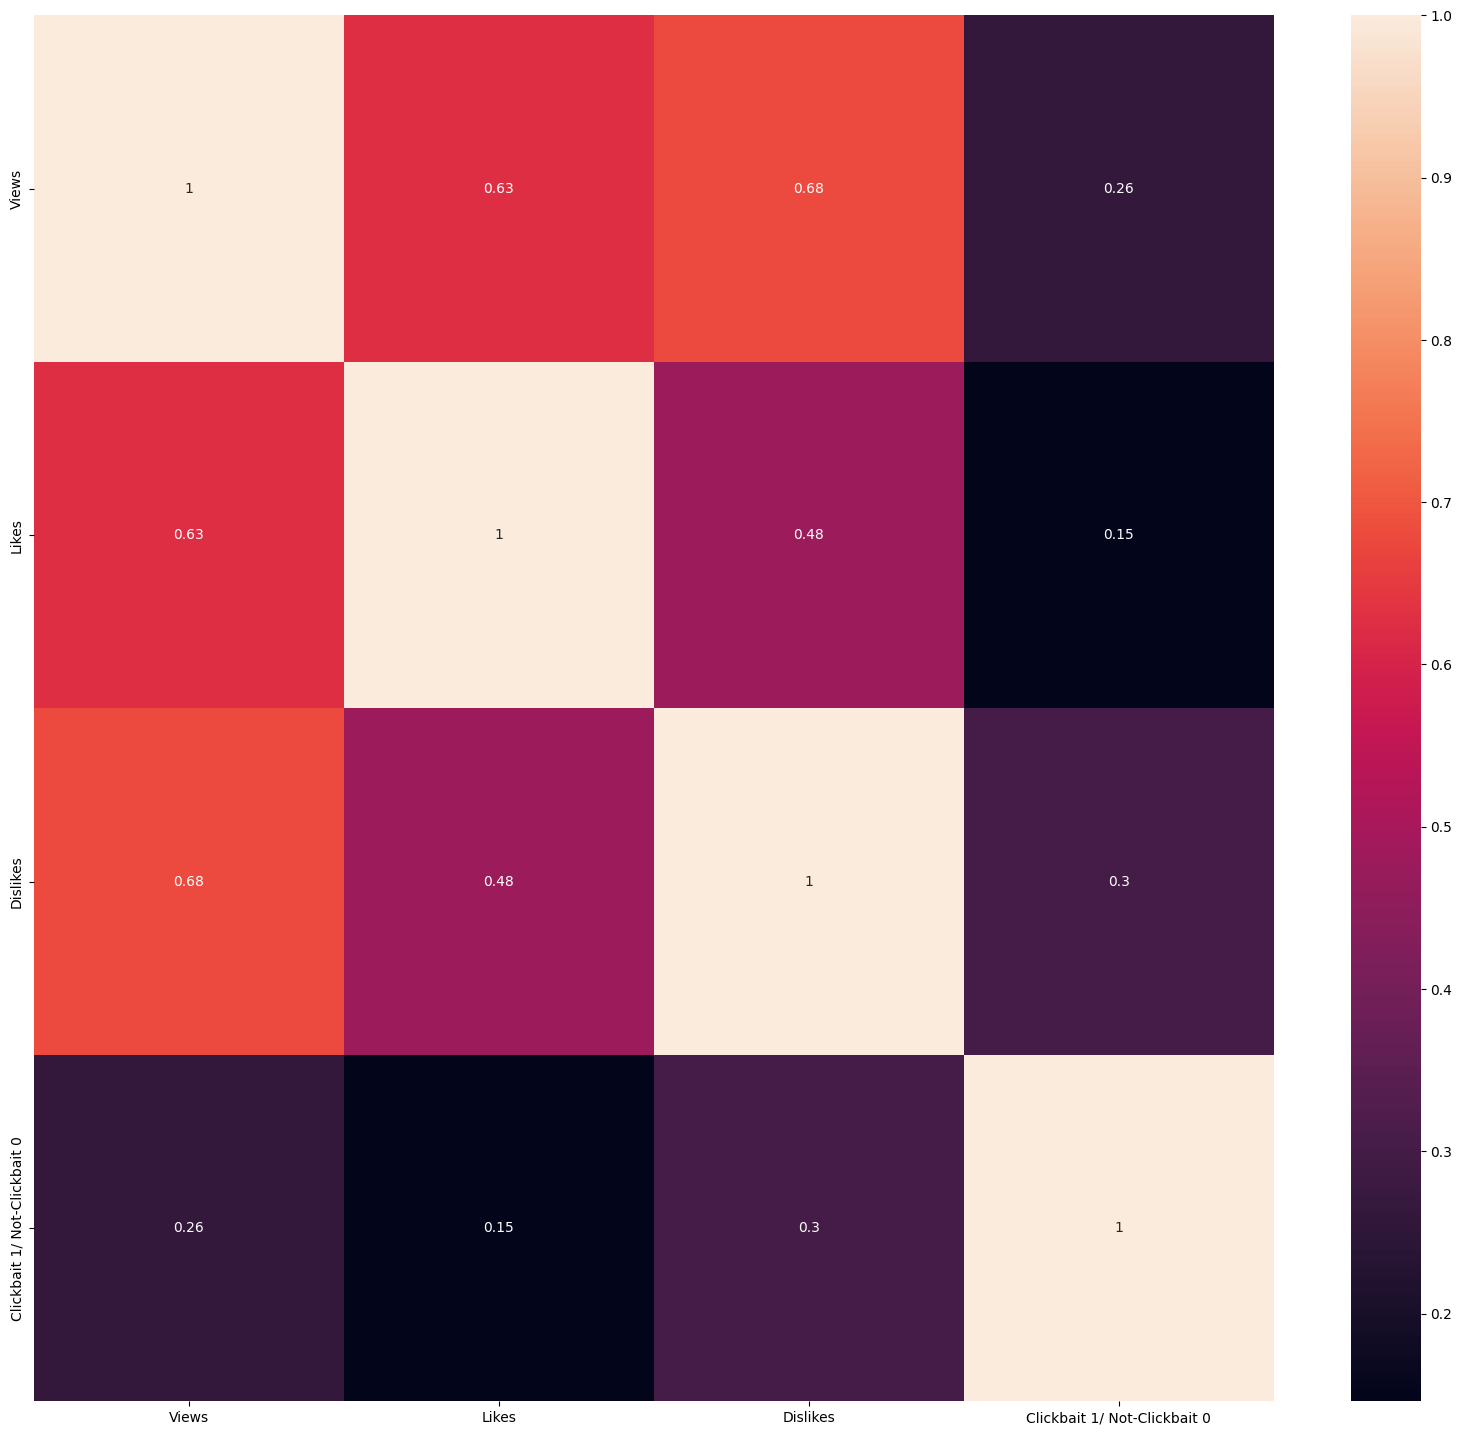

In [ ]:
correlation_matrix = data_kaggle.corr()

# Create a larger figure before generating the heatmap
plt.figure(figsize=(20, 18))

sns.heatmap(data = correlation_matrix, annot = True)
plt.show()


**DISLIKES COMPARED TO LIKES IN PERCENTAGE (Clickbaits)**

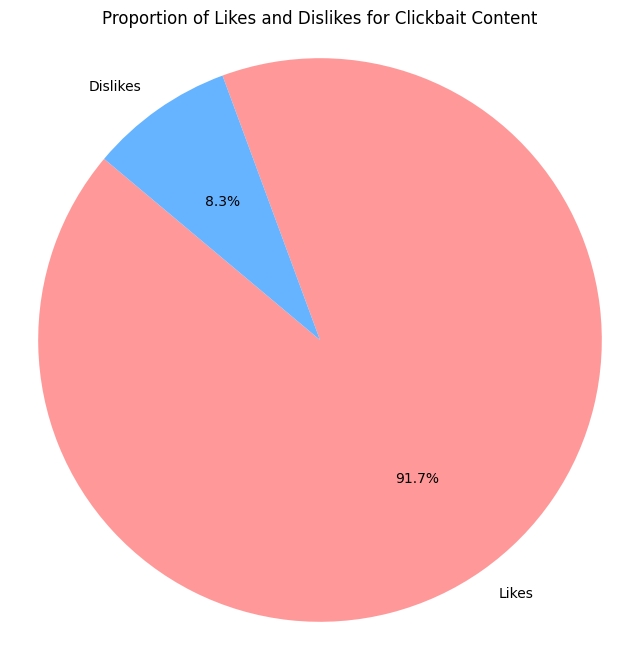

In [ ]:
# Filter to keep only rows where 'Clickbait 1/ Not-Clickbait 0' equals 1
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]

# Calculate total likes and dislikes
total_likes = clickbait_data['Likes'].sum()
total_dislikes = clickbait_data['Dislikes'].sum()

# Calculate proportions
total = total_likes + total_dislikes
proportion_likes = total_likes / total
proportion_dislikes = total_dislikes / total

# Plotting
labels = ['Likes', 'Dislikes']
sizes = [proportion_likes, proportion_dislikes]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Likes and Dislikes for Clickbait Content')
plt.show()

In [ ]:
# Filter to keep only clickbait titles
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]

# Calculate dislikes-to-likes ratio for each clickbait headline (in percentage)
clickbait_data['Dislikes_to_Likes_Percentage'] = (clickbait_data['Dislikes'] / clickbait_data['Likes']) * 100

# Calculate the average percentage
average_percentage = clickbait_data['Dislikes_to_Likes_Percentage'].mean()

# Display the average dislikes-to-likes percentage
print("Average Dislikes-to-Likes Percentage for Clickbait Headlines:", average_percentage)


Average Dislikes-to-Likes Percentage for Clickbait Headlines: 19.048778571255497


<ipython-input-45-af64f2254f9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_data['Dislikes_to_Likes_Percentage'] = (clickbait_data['Dislikes'] / clickbait_data['Likes']) * 100


**DISLIKES COMPARED TO LIKES IN PERCENTAGE (NOT Clickbaits)**


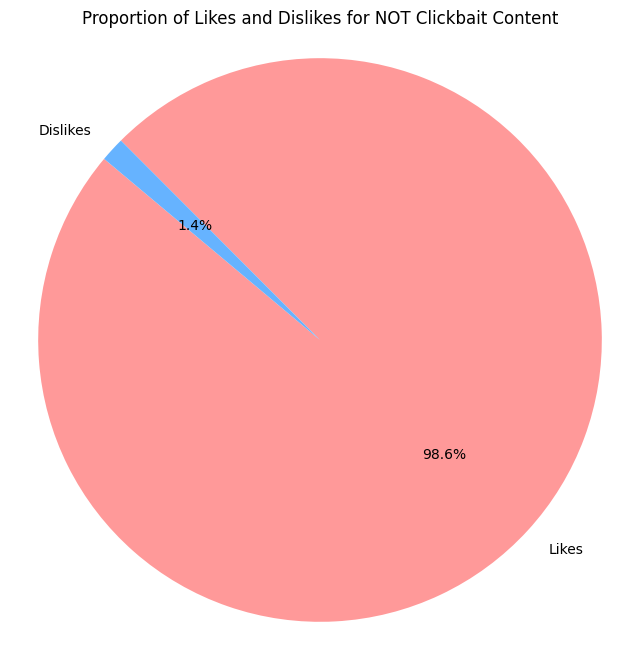

In [ ]:
# Filter to keep only rows where 'Clickbait 1/ Not-Clickbait 0' equals 0
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 0]

# Calculate total likes and dislikes
total_likes = clickbait_data['Likes'].sum()
total_dislikes = clickbait_data['Dislikes'].sum()

# Calculate proportions
total = total_likes + total_dislikes
proportion_likes = total_likes / total
proportion_dislikes = total_dislikes / total

# Plotting
labels = ['Likes', 'Dislikes']
sizes = [proportion_likes, proportion_dislikes]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Likes and Dislikes for NOT Clickbait Content')
plt.show()

In [ ]:
# Filter to keep only clickbait titles
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 0]

# Calculate dislikes-to-likes ratio for each clickbait headline (in percentage)
clickbait_data['Dislikes_to_Likes_Percentage'] = (clickbait_data['Dislikes'] / clickbait_data['Likes']) * 100

# Calculate the average percentage
average_percentage = clickbait_data['Dislikes_to_Likes_Percentage'].mean()

# Display the average dislikes-to-likes percentage
print("Average Dislikes-to-Likes Percentage for NOT Clickbait Headlines:", average_percentage)


Average Dislikes-to-Likes Percentage for NOT Clickbait Headlines: 2.4423264580004878


<ipython-input-47-bc34abeb33c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_data['Dislikes_to_Likes_Percentage'] = (clickbait_data['Dislikes'] / clickbait_data['Likes']) * 100


**LIKES COMPARED TO VIEWS IN PERCENTAGE (Clickbaits)**

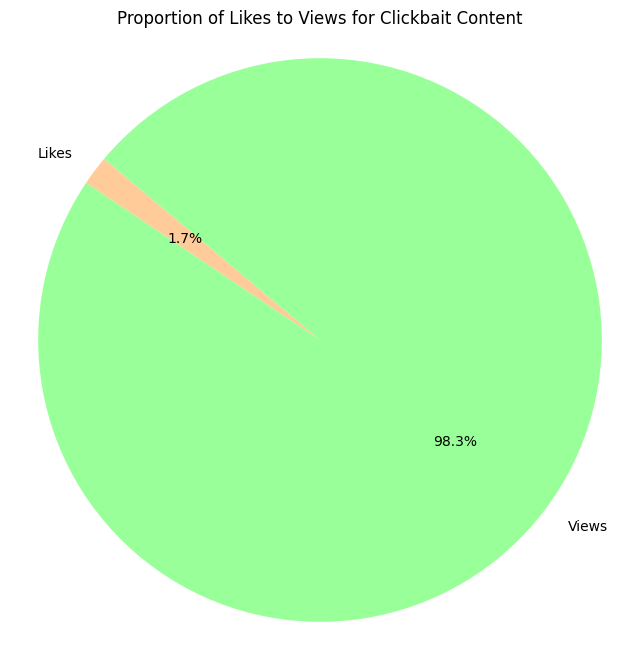

In [ ]:
# Filter to keep only rows where 'Clickbait 1/ Not-Clickbait 0' equals 1
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]

# Calculate total likes and total views
total_likes = clickbait_data['Likes'].sum()
total_views = clickbait_data['Views'].sum()

# Calculate proportions
total = total_likes + total_views
proportion_likes = total_likes / total
proportion_views = total_views / total

# Plotting
labels = ['Likes', 'Views']
sizes = [proportion_likes, proportion_views]
colors = ['#ffcc99', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Likes to Views for Clickbait Content')
plt.show()


In [ ]:

# Filter to keep only clickbait titles
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]

# Calculate likes-to-views ratio for each clickbait headline
clickbait_data['Likes_to_Views_Ratio'] = clickbait_data['Likes'] / clickbait_data['Views']

# Calculate the average ratio
average_ratio = clickbait_data['Likes_to_Views_Ratio'].mean()

# Display the average likes-to-views ratio
print("Average Likes-to-Views Ratio for Clickbait Headlines:", average_ratio)


Average Likes-to-Views Ratio for Clickbait Headlines: 0.0331320481749415


<ipython-input-49-ac8394755c0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_data['Likes_to_Views_Ratio'] = clickbait_data['Likes'] / clickbait_data['Views']


**LIKES COMPARED TO VIEWS IN PERCENTAGE (NOT Clickbaits)**

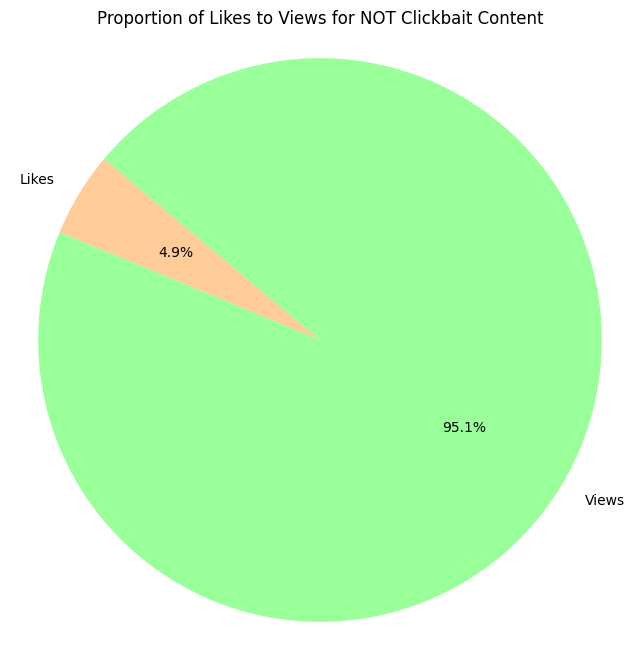

In [ ]:
# Filter to keep only rows where 'Clickbait 1/ Not-Clickbait 0' equals 0
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 0]

# Calculate total likes and total views
total_likes = clickbait_data['Likes'].sum()
total_views = clickbait_data['Views'].sum()

# Calculate proportions
total = total_likes + total_views
proportion_likes = total_likes / total
proportion_views = total_views / total

# Plotting
labels = ['Likes', 'Views']
sizes = [proportion_likes, proportion_views]
colors = ['#ffcc99', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Likes to Views for NOT Clickbait Content')
plt.show()


In [ ]:

# Filter to keep only clickbait titles
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 0]

# Calculate likes-to-views ratio for each clickbait headline
clickbait_data['Likes_to_Views_Ratio'] = clickbait_data['Likes'] / clickbait_data['Views']

# Calculate the average ratio
average_ratio = clickbait_data['Likes_to_Views_Ratio'].mean()

# Display the average likes-to-views ratio
print("Average Likes-to-Views Ratio for NOT Clickbait Headlines:", average_ratio)


Average Likes-to-Views Ratio for NOT Clickbait Headlines: 0.05205806785771596


<ipython-input-51-e3d26ae07521>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_data['Likes_to_Views_Ratio'] = clickbait_data['Likes'] / clickbait_data['Views']


**DISLIKES COMPARED TO VIEWS IN PERCENTAGE (Clickbaits)**

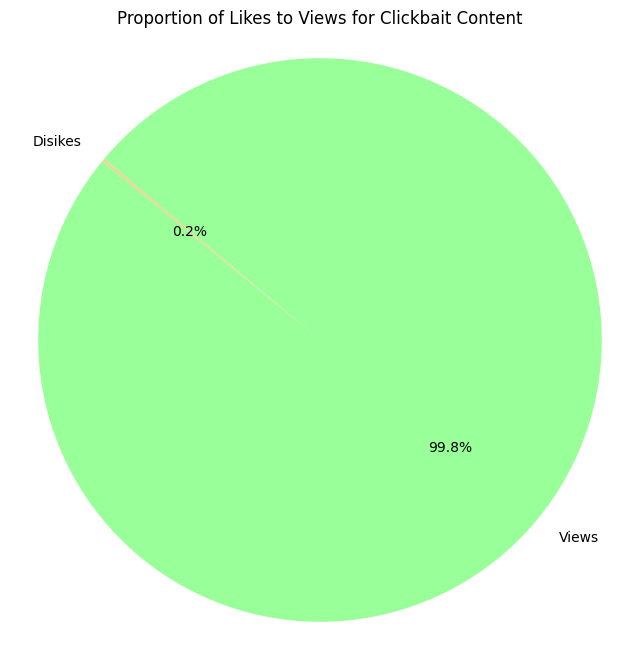

In [ ]:
# Filter to keep only rows where 'Clickbait 1/ Not-Clickbait 0' equals 1
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]

# Calculate total likes and total views
total_likes = clickbait_data['Dislikes'].sum()
total_views = clickbait_data['Views'].sum()

# Calculate proportions
total = total_likes + total_views
proportion_likes = total_likes / total
proportion_views = total_views / total

# Plotting
labels = ['Disikes', 'Views']
sizes = [proportion_likes, proportion_views]
colors = ['#ffcc99', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Likes to Views for Clickbait Content')
plt.show()


**DISLIKES COMPARED TO VIEWS IN PERCENTAGE (NOT Clickbaits)**

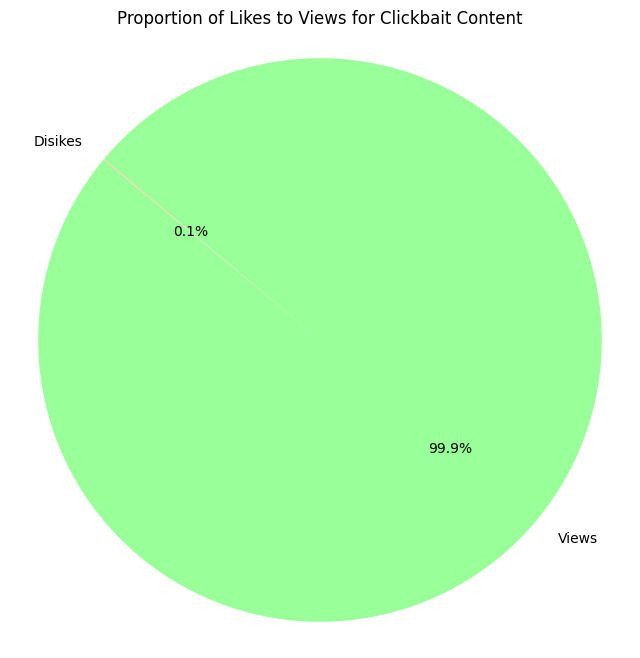

In [ ]:
# Filter to keep only rows where 'Clickbait 1/ Not-Clickbait 0' equals 0
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 0]

# Calculate total likes and total views
total_likes = clickbait_data['Dislikes'].sum()
total_views = clickbait_data['Views'].sum()

# Calculate proportions
total = total_likes + total_views
proportion_likes = total_likes / total
proportion_views = total_views / total

# Plotting
labels = ['Disikes', 'Views']
sizes = [proportion_likes, proportion_views]
colors = ['#ffcc99', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Likes to Views for Clickbait Content')
plt.show()


**STATISTICAL TEST**

In [ ]:
# Select the column for comparison, e.g., 'Clickbait 1/ Not-Clickbait 0'
target_column = 'Clickbait 1/ Not-Clickbait 0'

# Iterate through all other columns and test correlations
for col in data_kaggle.columns:
    if col != target_column and data_kaggle[col].dtype in ['float64', 'int64']:
        try:
            corr, p_value = pearsonr(data_kaggle[target_column], data_kaggle[col])

            # Check if absolute value of correlation is greater than 0.05
            if abs(corr) > 0.05:
                print(f"Correlation between {target_column} and {col}: Correlation coefficient = {corr}, P-value = {p_value}")
        except Exception as e:
            print(f"Could not calculate correlation for {col}: {e}")


Correlation between Clickbait 1/ Not-Clickbait 0 and Views: Correlation coefficient = 0.2619584872420319, P-value = 0.00017227010548591867
Correlation between Clickbait 1/ Not-Clickbait 0 and Likes: Correlation coefficient = 0.14593828082514623, P-value = 0.03871448683468418
Correlation between Clickbait 1/ Not-Clickbait 0 and Dislikes: Correlation coefficient = 0.30007536663591305, P-value = 1.5051826908531227e-05


SyntaxError: ignored

**ML SENTIMENT ANALYSIS**


based on likes to views proportion from headliens that are clickbait

In [ ]:
# Filter to keep only clickbait titles
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]

# Calculate likes-to-views ratio
clickbait_data['Likes_to_Views_Ratio'] = clickbait_data['Likes'] / clickbait_data['Views']

# Sort by likes-to-views ratio and select top 10
top_clickbaits = clickbait_data.sort_values(by='Likes_to_Views_Ratio', ascending=False).head(10)

# Set pandas display options to show full content
pd.set_option('display.max_colwidth', None)

# Display the top 10 clickbait titles
print("Top 10 Clickbait Titles Based on Likes-to-Views Ratio:")
print(top_clickbaits[['Video Title', 'Likes_to_Views_Ratio']])


Top 10 Clickbait Titles Based on Likes-to-Views Ratio:
                                                               Video Title  \
72                                UNIQUE THINGS You Have to SEE TO BELIEVE   
29                                       My plane is going down, goodbye..   
8   I Went Over Speed House And My Brothers Pulled up.... Didnt Go So Well   
28       Little Girl Goes To Heaven While Her Parents Watching (emotional)   
27                                                 he fell off then died..   
26                                                 he fell off then died..   
18                             this video will make you forget your name..   
20                  DMing 100 YouTubers Asking For A Dare! (i regret this)   
16                                      Last To Leave Circle Wins $500,000   
55                                  THESE GLASSES CURED MY COLORBLINDNESS!   

    Likes_to_Views_Ratio  
72                  0.12  
29                  0.11  
8    

<ipython-input-37-3eae42c865e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_data['Likes_to_Views_Ratio'] = clickbait_data['Likes'] / clickbait_data['Views']


In [ ]:

# Filter to keep only clickbait titles
clickbait_data = data_kaggle[data_kaggle['Clickbait 1/ Not-Clickbait 0'] == 1]

# Calculate likes-to-views ratio for each clickbait headline
clickbait_data['Likes_to_Views_Ratio'] = clickbait_data['Likes'] / clickbait_data['Views']

# Calculate the average ratio
average_ratio = clickbait_data['Likes_to_Views_Ratio'].mean()

# Display the average likes-to-views ratio
print("Average Likes-to-Views Ratio for Clickbait Headlines:", average_ratio)


Average Likes-to-Views Ratio for Clickbait Headlines: 0.0331320481749415


<ipython-input-38-ac8394755c0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickbait_data['Likes_to_Views_Ratio'] = clickbait_data['Likes'] / clickbait_data['Views']
